## Big Data and Data Mining Assignment

## Project Background Information

This assignment is based on real-world data: specifically, road traffic accidents in **2020**.

All road traffic accidents involving casualties are logged and reported in **Great Britain**, along with (probably) a majority of other non-fatal road traffic accidents. Every year, the government releases a large batch of data associated with these reports. 

In this assignment, we will be using the data from **2020**.


### IMPORT LIBRARIES

In [1]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

## Load the accident database file
Connect to sqlite3 server to run SQL commands and Instantiate a cursor connection

In [3]:
# Set the correct database path
db_path ="C:/Users/hp/Downloads/big data assignment/accident_data_v1.0.0_2023.db"

# Connect to the database
conn = sqlite3.connect(db_path)# Establish connection
cursor = conn.cursor()# Create a cursor object
print("Database connected successfully.")

Database connected successfully.


In [4]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('accident',), ('casualty',), ('vehicle',), ('lsoa',)]


In [5]:
def show_columns(table_name):
    query = f"PRAGMA table_info({table_name});"
    cursor.execute(query)
    columns = cursor.fetchall()
    print(f"\nColumns in {table_name}:")
    for col in columns:
        print(col)

# Check columns in main tables
table_names = ["accident", "vehicle", "casualty", "lsoa"]
for table in table_names:
    show_columns(table)



Columns in accident:
(0, 'accident_index', '', 0, None, 1)
(1, 'accident_year', '', 0, None, 0)
(2, 'accident_reference', '', 0, None, 0)
(3, 'location_easting_osgr', '', 0, None, 0)
(4, 'location_northing_osgr', '', 0, None, 0)
(5, 'longitude', '', 0, None, 0)
(6, 'latitude', '', 0, None, 0)
(7, 'police_force', '', 0, None, 0)
(8, 'accident_severity', '', 0, None, 0)
(9, 'number_of_vehicles', '', 0, None, 0)
(10, 'number_of_casualties', '', 0, None, 0)
(11, 'date', '', 0, None, 0)
(12, 'day_of_week', '', 0, None, 0)
(13, 'time', '', 0, None, 0)
(14, 'local_authority_district', '', 0, None, 0)
(15, 'local_authority_ons_district', '', 0, None, 0)
(16, 'local_authority_highway', '', 0, None, 0)
(17, 'first_road_class', '', 0, None, 0)
(18, 'first_road_number', '', 0, None, 0)
(19, 'road_type', '', 0, None, 0)
(20, 'speed_limit', '', 0, None, 0)
(21, 'junction_detail', '', 0, None, 0)
(22, 'junction_control', '', 0, None, 0)
(23, 'second_road_class', '', 0, None, 0)
(24, 'second_road_num

In [6]:
def preview_table(table_name, limit=5):
    query = f"SELECT * FROM {table_name} LIMIT {limit};"
    df = pd.read_sql_query(query, conn)
    print(f"\nSample records from {table_name}:")
    display(df)  

# Preview each table
for table in table_names:
    preview_table(table)



Sample records from accident:


accident_index  accident_year accident_reference  location_easting_osgr  \
0  2017010001708           2017          010001708               532920.0   
1  2017010009342           2017          010009342               526790.0   
2  2017010009344           2017          010009344               535200.0   
3  2017010009348           2017          010009348               534340.0   
4  2017010009350           2017          010009350               533680.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                181970.0  -0.173845  51.522425             1   
2                181260.0  -0.052969  51.514096             1   
3                193560.0  -0.060658  51.624832             1   
4                187820.0  -0.072372  51.573408             1   

   accident_severity  number_of_vehicles  ...  \
0                  1                   2  ...   
1                  3                   2  ...   
2                  3                   3  ...   
3                  3                   2  ...   
4                  2                   1  ...   

   pedestrian_crossing_physical_facilities light_conditions  \
0                                        0                4   
1                                        0                4   
2                                        0                4   
3                                        4                4   
4                                        5                4   

   weather_conditions road_surface_conditions  special_conditions_at_site  \
0                   1                       1                           0   
1                   1                       2                           0   
2                   1                       1                           0   
3                   2                       2                           0   
4                   1                       2                           0   

  carriageway_hazards urban_or_rural_area  \
0                   0                   1   
1                   0                   1   
2                   0                   1   
3                   0                   1   
4                   0                   1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                2   
1                                            1                2   
2                                            1                2   
3                                            1                2   
4                                            1                2   

   lsoa_of_accident_location  
0                  E01001450  
1                  E01004702  
2                  E01004298  
3                  E01001429  
4                  E01001808  

[5 rows x 36 columns]


Sample records from vehicle:


vehicle_index accident_index  accident_year accident_reference  \
0              0  2017010001708           2017          010001708   
1              1  2017010001708           2017          010001708   
2              2  2017010009342           2017          010009342   
3              3  2017010009342           2017          010009342   
4              4  2017010009344           2017          010009344   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        0   
1                  2             2                        0   
2                  1             9                        0   
3                  2             9                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                 18                       1                     5  ...   
1                 18                       1                     5  ...   
2                 18                       5                     1  ...   
3                 18                       5                     1  ...   
4                 18                       3                     7  ...   

   journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                          6              1             24   
1                          6              1             19   
2                          6              1             33   
3                          6              1             40   
4                          6              3             -1   

   age_band_of_driver  engine_capacity_cc  propulsion_code  age_of_vehicle  \
0                   5                1997                2               1   
1                   4                  -1               -1              -1   
2                   6                1797                8               8   
3                   7                2204                2              12   
4                  -1                  -1               -1              -1   

   generic_make_model  driver_imd_decile  driver_home_area_type  
0                  -1                 -1                     -1  
1                  -1                 -1                     -1  
2                  -1                  9                      1  
3                  -1                  2                      1  
4                  -1                 -1                     -1  

[5 rows x 28 columns]


Sample records from casualty:


casualty_index accident_index  accident_year accident_reference  \
0               0  2017010001708           2017          010001708   
1               1  2017010001708           2017          010001708   
2               2  2017010001708           2017          010001708   
3               3  2017010009342           2017          010009342   
4               4  2017010009344           2017          010009344   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               2                2   
1                  2                   2               1                1   
2                  2                   3               2                1   
3                  1                   1               2                2   
4                  3                   1               1                2   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               18                     4                  3   
1               19                     4                  2   
2               18                     4                  1   
3               33                     6                  3   
4               31                     6                  3   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    0                    0              1   
1                    0                    0              0   
2                    0                    0              0   
3                    0                    0              1   
4                    0                    0              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              9   
1                       0                                   0              2   
2                       0                                   0              2   
3                       0                                   0              9   
4                       0                                   0              9   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    2  
1                       -1                   -1  
2                       -1                   -1  
3                        1                    5  
4                        1                    5


Sample records from lsoa:


objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

### Summary of Table Functions:

- **accident**: General information about accidents (e.g., when and where they happened).
- **casualty**: Details about the individuals involved in the accident and their injuries.
- **vehicle**: Information about the vehicles involved in the accidents.
- **lsoa**: Geographical data on the location of the accidents, helping to analyze accidents in specific regions or aeas.


## check the primary and foreign keys

In [6]:
def check_primary_keys(table_name):
    query = f"PRAGMA table_info({table_name});"
    cursor.execute(query)
    columns = cursor.fetchall()
    print(f"\nPrimary Key(s) in {table_name}:")
    for col in columns:
        if col[5] == 1:  # col[5] indicates if it's a primary key
            print(f"- {col[1]} (Primary Key)")

# Check primary keys in main tables
for table in ["accident", "vehicle", "casualty", "lsoa"]:
    check_primary_keys(table)



Primary Key(s) in accident:
- accident_index (Primary Key)

Primary Key(s) in vehicle:
- vehicle_index (Primary Key)

Primary Key(s) in casualty:
- casualty_index (Primary Key)

Primary Key(s) in lsoa:
- objectid (Primary Key)


In [7]:
def check_foreign_keys(table_name):
    query = f"PRAGMA foreign_key_list({table_name});"
    cursor.execute(query)
    foreign_keys = cursor.fetchall()
    print(f"\nForeign Keys in {table_name}:")
    for fk in foreign_keys:
        print(f"- Column '{fk[3]}' references '{fk[2]}.{fk[4]}'")

# Check foreign keys in main tables
for table in ["accident", "vehicle", "casualty", "lsoa"]:
    check_foreign_keys(table)



Foreign Keys in accident:

Foreign Keys in vehicle:
- Column 'accident_index' references 'accident.accident_index'

Foreign Keys in casualty:
- Column 'accident_index' references 'accident.accident_index'

Foreign Keys in lsoa:


## EXTRACT ATTRIBUTES FROM EACH TABLE

### ACCIDENT TABLE

In [7]:
# Query table structure
cursor.execute("PRAGMA table_info(accident);")

# Fetch and display column names
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'accident_index', '', 0, None, 1)
(1, 'accident_year', '', 0, None, 0)
(2, 'accident_reference', '', 0, None, 0)
(3, 'location_easting_osgr', '', 0, None, 0)
(4, 'location_northing_osgr', '', 0, None, 0)
(5, 'longitude', '', 0, None, 0)
(6, 'latitude', '', 0, None, 0)
(7, 'police_force', '', 0, None, 0)
(8, 'accident_severity', '', 0, None, 0)
(9, 'number_of_vehicles', '', 0, None, 0)
(10, 'number_of_casualties', '', 0, None, 0)
(11, 'date', '', 0, None, 0)
(12, 'day_of_week', '', 0, None, 0)
(13, 'time', '', 0, None, 0)
(14, 'local_authority_district', '', 0, None, 0)
(15, 'local_authority_ons_district', '', 0, None, 0)
(16, 'local_authority_highway', '', 0, None, 0)
(17, 'first_road_class', '', 0, None, 0)
(18, 'first_road_number', '', 0, None, 0)
(19, 'road_type', '', 0, None, 0)
(20, 'speed_limit', '', 0, None, 0)
(21, 'junction_detail', '', 0, None, 0)
(22, 'junction_control', '', 0, None, 0)
(23, 'second_road_class', '', 0, None, 0)
(24, 'second_road_number', '', 0, None, 0)


### VEHICLE TABLE

In [8]:
# Query table structure
cursor.execute("PRAGMA table_info(vehicle);")

# Fetch and display column names
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'vehicle_index', '', 0, None, 1)
(1, 'accident_index', '', 0, None, 0)
(2, 'accident_year', '', 0, None, 0)
(3, 'accident_reference', '', 0, None, 0)
(4, 'vehicle_reference', '', 0, None, 0)
(5, 'vehicle_type', '', 0, None, 0)
(6, 'towing_and_articulation', '', 0, None, 0)
(7, 'vehicle_manoeuvre', '', 0, None, 0)
(8, 'vehicle_direction_from', '', 0, None, 0)
(9, 'vehicle_direction_to', '', 0, None, 0)
(10, 'vehicle_location_restricted_lane', '', 0, None, 0)
(11, 'junction_location', '', 0, None, 0)
(12, 'skidding_and_overturning', '', 0, None, 0)
(13, 'hit_object_in_carriageway', '', 0, None, 0)
(14, 'vehicle_leaving_carriageway', '', 0, None, 0)
(15, 'hit_object_off_carriageway', '', 0, None, 0)
(16, 'first_point_of_impact', '', 0, None, 0)
(17, 'vehicle_left_hand_drive', '', 0, None, 0)
(18, 'journey_purpose_of_driver', '', 0, None, 0)
(19, 'sex_of_driver', '', 0, None, 0)
(20, 'age_of_driver', '', 0, None, 0)
(21, 'age_band_of_driver', '', 0, None, 0)
(22, 'engine_capacity_cc', 

## CASUALTY TABLE

In [9]:
# Query table structure
cursor.execute("PRAGMA table_info(casualty);")

# Fetch and display column names
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'casualty_index', '', 0, None, 1)
(1, 'accident_index', '', 0, None, 0)
(2, 'accident_year', '', 0, None, 0)
(3, 'accident_reference', '', 0, None, 0)
(4, 'vehicle_reference', '', 0, None, 0)
(5, 'casualty_reference', '', 0, None, 0)
(6, 'casualty_class', '', 0, None, 0)
(7, 'sex_of_casualty', '', 0, None, 0)
(8, 'age_of_casualty', '', 0, None, 0)
(9, 'age_band_of_casualty', '', 0, None, 0)
(10, 'casualty_severity', '', 0, None, 0)
(11, 'pedestrian_location', '', 0, None, 0)
(12, 'pedestrian_movement', '', 0, None, 0)
(13, 'car_passenger', '', 0, None, 0)
(14, 'bus_or_coach_passenger', '', 0, None, 0)
(15, 'pedestrian_road_maintenance_worker', '', 0, None, 0)
(16, 'casualty_type', '', 0, None, 0)
(17, 'casualty_home_area_type', '', 0, None, 0)
(18, 'casualty_imd_decile', '', 0, None, 0)


###  LSOA REGION TABLE

In [10]:
# Query table structure
cursor.execute("PRAGMA table_info(lsoa);")

# Fetch and display column names
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'objectid', '', 0, None, 1)
(1, 'lsoa01cd', '', 0, None, 0)
(2, 'lsoa01nm', '', 0, None, 0)
(3, 'lsoa01nmw', '', 0, None, 0)
(4, 'shape__area', '', 0, None, 0)
(5, 'shape__length', '', 0, None, 0)
(6, 'globalid', '', 0, None, 0)


## extract data from 2020 from this database

In [11]:
# Function to get data for the year 2020
def get_data_for_2020(table_name):
    cursor.execute(f"SELECT * FROM {table_name} WHERE accident_year = 2020")
    data = cursor.fetchall()  # Retrieve all matching rows
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = [row[1] for row in cursor.fetchall()]
    df = pd.DataFrame(data, columns = columns)
    return df

# Get data for each table
accident_data = get_data_for_2020("accident")
vehicle_data = get_data_for_2020("vehicle")
casualty_data = get_data_for_2020("casualty")

# Print the number of rows extracted for 2020
print(f"Accident Data (2020): {accident_data.head()} ")
print(f"Vehicle Data (2020): {vehicle_data.head()} ")
print(f"Casualty Data (2020): {casualty_data.head()} ")

Accident Data (2020):   accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...  \
0                  3                   1  ...   
1                  3      

In [12]:
# extract information from the lsoa table

query = '''
SELECT l.*
FROM accident AS a
JOIN lsoa AS l
ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.accident_year = 2020
'''

cursor.execute(query)
data = cursor.fetchall()
cursor.execute('PRAGMA table_info(lsoa)')
lsoa_cols = [row[1] for row in cursor.fetchall()]
lsoa_data = pd.DataFrame(data, columns=lsoa_cols)
lsoa_data.head()


objectid   lsoa01cd          lsoa01nm         lsoa01nmw    shape__area  \
0      4576  E01004576   Wandsworth 013D   Wandsworth 013D  445625.061623   
1      3034  E01003034      Lambeth 012A      Lambeth 012A  114698.446686   
2      4726  E01004726  Westminster 003C  Westminster 003C  185726.854301   
3      3617  E01003617       Newham 012B       Newham 012B  232690.613373   
4      4763  E01004763  Westminster 013B  Westminster 013B  293663.772385   

   shape__length                              globalid  
0    4486.701130  c7ddebfb-d730-4be6-b67e-938adb21309e  
1    1719.140860  cb2e7f50-252f-469e-9b13-a56794f5d5d6  
2    2698.692831  e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18  
3    3013.438191  3e1979c9-8863-4982-afa5-7a6de00635d7  
4    4706.823542  94474f4a-0fea-4630-9173-e8fdbb834c34

In [13]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [15]:
accident_data.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [16]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [17]:
casualty_data.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

## merge vehicle, accident and casualty dataframes

In [14]:
merged_df = pd.merge(vehicle_data, accident_data, on='accident_index', how='inner')

merged_df

vehicle_index accident_index  accident_year_x accident_reference_x  \
0              681716  2020010219808             2020            010219808   
1              681717  2020010220496             2020            010220496   
2              681718  2020010228005             2020            010228005   
3              681719  2020010228006             2020            010228006   
4              681720  2020010228011             2020            010228011   
...               ...            ...              ...                  ...   
167370         849086  2020991030297             2020            991030297   
167371         849087  2020991030297             2020            991030297   
167372         849088  2020991030900             2020            991030900   
167373         849089  2020991030900             2020            991030900   
167374         849090  2020991032575             2020            991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        pedestrian_crossing_physical_facilities  light_conditions  \
0                                             9                 1   
1                                             4                 1   
2                                             0                 4   
3                                             4                 4   
4                                             0                 4   
...                                         ...               ...   
167370                                        0                 1   
167371                                        0                 1   
167372                                        0                 1   
167373                                        0                 1   
167374                                        0                 1   

        weather_conditions  road_surface_conditions  \
0                        9                        9   
1                        1                        1   
2                        1                        2   
3                        1                        1   
4                        1                        1   
...                    ...                      ...   
167370                   1                        1   
167371                  

In [15]:
merged_df = merged_df.drop(columns=['accident_year_y', 'accident_reference_y'])
merged_df = merged_df.rename(columns={
    'accident_year_x': 'accident_year',
    'accident_reference_x': 'accident_reference'
})

In [16]:
merged_df[merged_df.duplicated('accident_index', keep=False)].sort_values('accident_index').head(10)

vehicle_index accident_index  accident_year accident_reference  \
6          681722  2020010228014           2020          010228014   
7          681723  2020010228014           2020          010228014   
8          681724  2020010228017           2020          010228017   
9          681725  2020010228017           2020          010228017   
10         681726  2020010228018           2020          010228018   
11         681727  2020010228018           2020          010228018   
12         681728  2020010228020           2020          010228020   
13         681729  2020010228020           2020          010228020   
15         681731  2020010228024           2020          010228024   
16         681732  2020010228024           2020          010228024   

    vehicle_reference  vehicle_type  towing_and_articulation  \
6                   1             9                        0   
7                   2             9                        3   
8                   1             9                        0   
9                   2             9                        0   
10                  1             9                        0   
11                  2             9                        0   
12                  1             3                        0   
13                  2             9                        0   
15                  1             9                        0   
16                  2             9                        0   

    vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
6                  18                       5                     1  ...   
7                  18                       1                     5  ...   
8                  18                       3                     7  ...   
9                   3                       3                     7  ...   
10                 18                       1                     5  ...   
11                  2                       0                     0  ...   
12                  3                       7                     3  ...   
13                  4                       7                     3  ...   
15                 18                       1                     5  ...   
16                  3                       5                     1  ...   

    pedestrian_crossing_physical_facilities  light_conditions  \
6                                         0                 4   
7                                         0                 4   
8                                         0                 4   
9                                         0                 4   
10                                        0                 4   
11                                        0                 4   
12                                        5                 4   
13                                        5                 4   
15                                        5                 4   
16                                        5                 4   

    weather_conditions  road_surface_conditions  special_conditions_at_site  \
6                    1                        2                           0   
7                    1                        2                           0   
8                    8                        2                           0   
9                    8                        2                           0   
10                   1                        1                           0   
11                   1                        1                           0   
12                   1                        1                           0   
13                   1                        1                           0   
15                   1                        2                           0   
16                   1                        2                           0   

    carriageway_hazards  urban_or_rural_area  \
6                     0                    1   
7        

## QUESTION 1: Are there significant hours of the day, and days of the week, on which accidents occur?

In [21]:
#Accidents by Dates
display(pd.read_sql_query('''
    SELECT 
        date,
        COUNT(accident_index) AS accidents
    FROM accident
    WHERE substr(date, 7, 4) = '2020' 
    GROUP BY 1
    ORDER BY  2 DESC  
''', conn))

date  accidents
0    06/02/2020        426
1    04/11/2020        414
2    06/03/2020        411
3    21/01/2020        399
4    18/09/2020        397
..          ...        ...
361  05/04/2020         78
362  01/04/2020         78
363  30/03/2020         58
364  28/03/2020         55
365  29/03/2020         46

[366 rows x 2 columns]

In [22]:


# Execute the SQL query to get accident data by day of the week
df_day = pd.read_sql_query('''
    SELECT 
        CASE 
            WHEN day_of_week = 1 THEN 'Sunday'
            WHEN day_of_week = 2 THEN 'Monday'
            WHEN day_of_week = 3 THEN 'Tuesday'
            WHEN day_of_week = 4 THEN 'Wednesday'
            WHEN day_of_week = 5 THEN 'Thursday'
            WHEN day_of_week = 6 THEN 'Friday'
            WHEN day_of_week = 7 THEN 'Saturday'
        END AS day_name,
        COUNT(accident_index) AS accidents
    FROM accident
    WHERE substr(date, 7, 4) = '2020' 
    GROUP BY 1
    ORDER BY day_of_week
''', conn)

# Display the results in the desired format
print(df_day)


    day_name  accidents
0     Sunday      10315
1     Monday      12772
2    Tuesday      13267
3  Wednesday      13564
4   Thursday      14056
5     Friday      14889
6   Saturday      12336


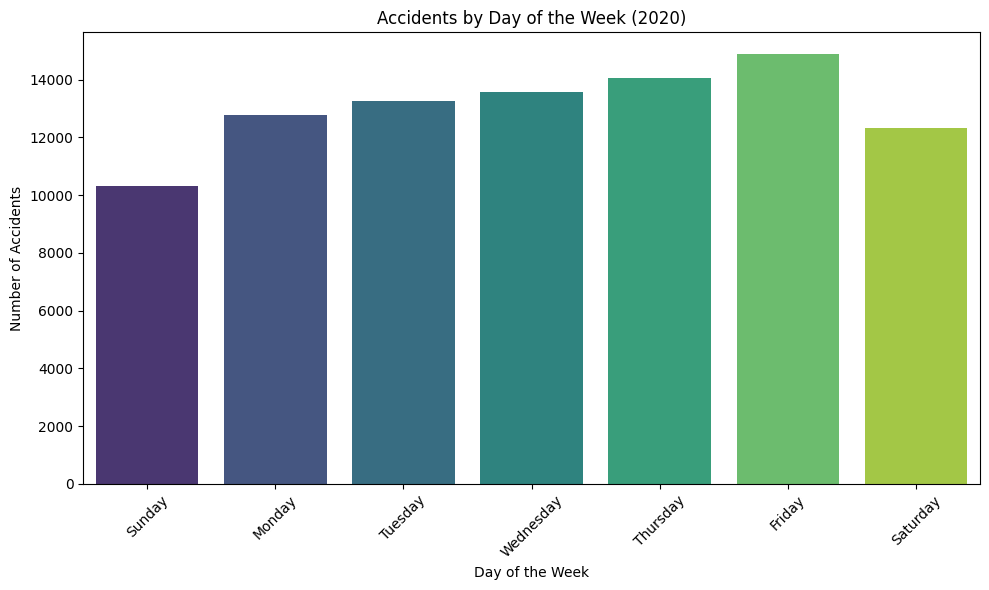

In [23]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_day, x='day_name', y='accidents', palette='viridis')
plt.title('Accidents by Day of the Week (2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


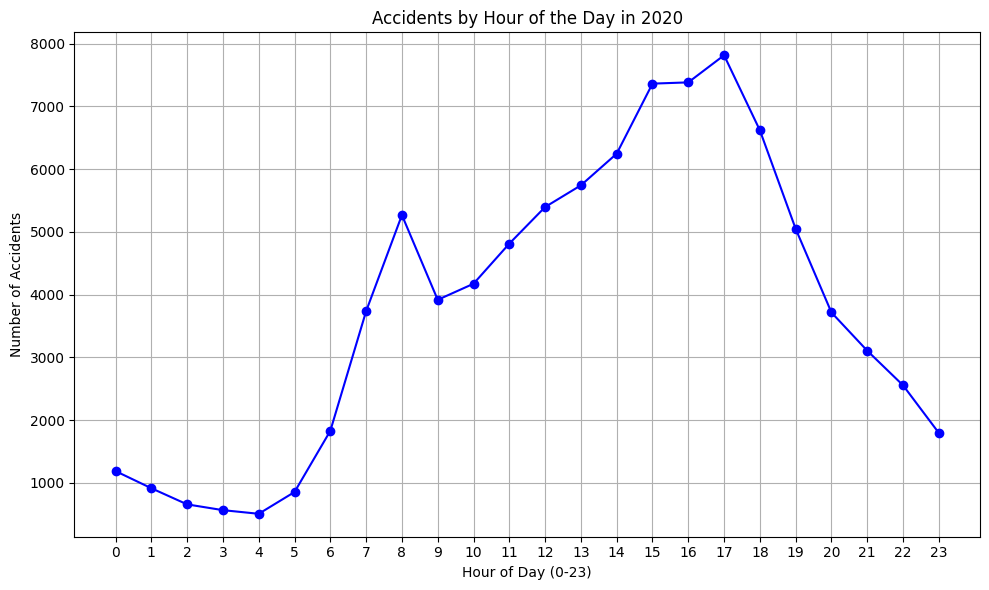

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Execute the SQL query to get accident data by time
query = '''
    SELECT 
        time,
        COUNT(accident_index) AS accidents
    FROM accident
    WHERE substr(date, 7, 4) = '2020' 
    GROUP BY 1
    ORDER BY  2 DESC  
'''

# Fetch the data
accidents_by_time = pd.read_sql_query(query, conn)

# Convert 'time' to datetime, keeping only the hour (HH)
accidents_by_time['time'] = pd.to_datetime(accidents_by_time['time'], format='%H:%M', errors='coerce')

# Extract the hour from 'time' and group by it
accidents_by_time['hour'] = accidents_by_time['time'].dt.hour

# Group by hour and sum accidents (since we only want total accidents per hour)
accidents_by_hour = accidents_by_time.groupby('hour')['accidents'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(accidents_by_hour['hour'], accidents_by_hour['accidents'], marker='o', linestyle='-', color='b')
plt.title('Accidents by Hour of the Day in 2020')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))  # Set x-axis to show hours from 0 to 23
plt.grid(True)
plt.tight_layout()
plt.show()


## QUESTION 2: For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

#### Codes for the 'Vehicle_type' column, as defined by the dataset guide, which explains the meaning of the numerical values in each column
- Motorcycle 125cc and under - 3
- Motorcycle over 125cc and up to 500cc - 4
- Motorcycle over 500cc - 5

In [25]:
#Motorbike Accidents by Day of the Week
df_bikes=pd.read_sql_query('''
    SELECT 
        vehicle_type,
        CASE 
            WHEN vehicle_type = 2 THEN 'Motorbike 50cc and under'
            WHEN vehicle_type = 3 THEN 'Motorbike over 50cc and up to 125cc'
            WHEN vehicle_type = 4 THEN 'Motorbike over 125cc and up to 500cc'
            WHEN vehicle_type = 5 THEN 'Motorbike over 500cc'
        END AS vehicle_type_name,
        CASE 
            WHEN day_of_week = 1 THEN 'Sunday'
            WHEN day_of_week = 2 THEN 'Monday'
            WHEN day_of_week = 3 THEN 'Tuesday'
            WHEN day_of_week = 4 THEN 'Wednesday'
            WHEN day_of_week = 5 THEN 'Thursday'
            WHEN day_of_week = 6 THEN 'Friday'
            WHEN day_of_week = 7 THEN 'Saturday'
        END AS day_of_week_name,
        --CAST(substr(time, 1, instr(time, ':') - 1) AS INTEGER) AS hour,
        COUNT(a.accident_index) AS accidents
    FROM vehicle v
    JOIN accident a
    ON a.accident_index = v.accident_index
    WHERE v.accident_year = 2020 AND vehicle_type IN (2,3,4,5)
    GROUP BY 1,2,3
    ORDER BY day_of_week, vehicle_type
''', conn)

df_bikes

vehicle_type                     vehicle_type_name day_of_week_name  \
0              2              Motorbike 50cc and under           Sunday   
1              3   Motorbike over 50cc and up to 125cc           Sunday   
2              4  Motorbike over 125cc and up to 500cc           Sunday   
3              5                  Motorbike over 500cc           Sunday   
4              2              Motorbike 50cc and under           Monday   
5              3   Motorbike over 50cc and up to 125cc           Monday   
6              4  Motorbike over 125cc and up to 500cc           Monday   
7              5                  Motorbike over 500cc           Monday   
8              2              Motorbike 50cc and under          Tuesday   
9              3   Motorbike over 50cc and up to 125cc          Tuesday   
10             4  Motorbike over 125cc and up to 500cc          Tuesday   
11             5                  Motorbike over 500cc          Tuesday   
12             2              Motorbike 50cc and under        Wednesday   
13             3   Motorbike over 50cc and up to 125cc        Wednesday   
14             4  Motorbike over 125cc and up to 500cc        Wednesday   
15             5                  Motorbike over 500cc        Wednesday   
16             2              Motorbike 50cc and under         Thursday   
17             3   Motorbike over 50cc and up to 125cc         Thursday   
18             4  Motorbike over 125cc and up to 500cc         Thursday   
19             5                  Motorbike over 500cc         Thursday   
20             2              Motorbike 50cc and under           Friday   
21             3   Motorbike over 50cc and up to 125cc           Friday   
22             4  Motorbike over 125cc and up to 500cc           Friday   
23             5                  Motorbike over 500cc           Friday   
24             2              Motorbike 50cc and under         Saturday   
25             3   Motorbike over 50cc and up to 125cc         Saturday   
26             4  Motorbike over 125cc and up to 500cc         Saturday   
27             5                  Motorbike over 500cc         Saturday   

    accidents  
0         103  
1         845  
2         218  
3         675  
4         165  
5        1008  
6         227  
7         468  
8         168  
9        1034  
10        234  
11        497  
12        160  
13       1089  
14        251  
15        501  
16        170  
17       1219  
18        257  
19        526  
20        189  
21       1285  
22        267  
23        567  
24        173  
25       1043  
26        237  
27        550

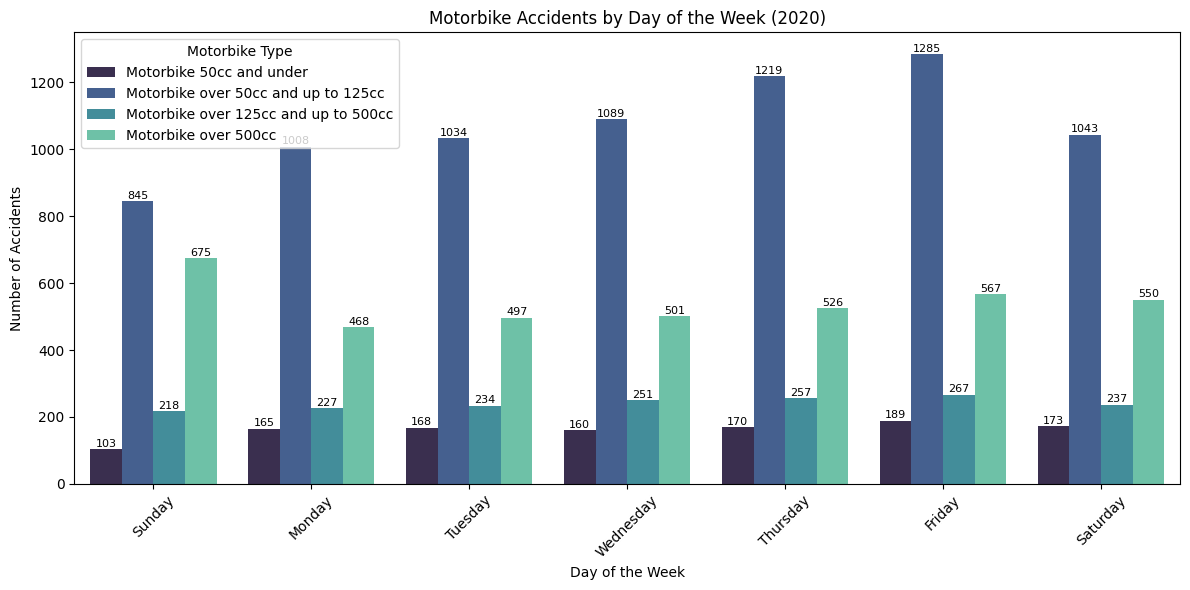

In [26]:
# Plot Motorbike Accidents by Day of the Week and Time (Hour)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_bikes, x='day_of_week_name', y='accidents', hue='vehicle_type_name', palette='mako', errorbar=None)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with height > 0
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 1,  # Slightly above the bar
            f'{int(height)}', 
            ha='center', va='bottom', fontsize=8
        )

plt.title('Motorbike Accidents by Day of the Week (2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Motorbike Type')
plt.tight_layout()
plt.show()

In [27]:
#Motorbike Accidents by Time (Hour)
df_bikes_time=pd.read_sql_query('''
    SELECT 
        vehicle_type,
        CASE 
            WHEN vehicle_type = 2 THEN 'Motorbike 50cc and under'
            WHEN vehicle_type = 3 THEN 'Motorbike over 50cc and up to 125cc'
            WHEN vehicle_type = 4 THEN 'Motorbike over 125cc and up to 500cc'
            WHEN vehicle_type = 5 THEN 'Motorbike over 500cc'
        END AS vehicle_type_name,
        CAST(substr(time, 1, instr(time, ':') - 1) AS INTEGER) AS hour,
        COUNT(a.accident_index) AS accidents
    FROM vehicle v
    JOIN accident a
    ON a.accident_index = v.accident_index
    WHERE v.accident_year = 2020 AND vehicle_type IN (2,3,4,5)
    GROUP BY 1,2,3
    ORDER BY vehicle_type_name, hour
''', conn)

df_bikes_time

vehicle_type                    vehicle_type_name  hour  accidents
0              2             Motorbike 50cc and under     0          5
1              2             Motorbike 50cc and under     1          5
2              2             Motorbike 50cc and under     2          6
3              2             Motorbike 50cc and under     3          5
4              2             Motorbike 50cc and under     4          2
..           ...                                  ...   ...        ...
91             3  Motorbike over 50cc and up to 125cc    19        580
92             3  Motorbike over 50cc and up to 125cc    20        475
93             3  Motorbike over 50cc and up to 125cc    21        365
94             3  Motorbike over 50cc and up to 125cc    22        254
95             3  Motorbike over 50cc and up to 125cc    23        154

[96 rows x 4 columns]

C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

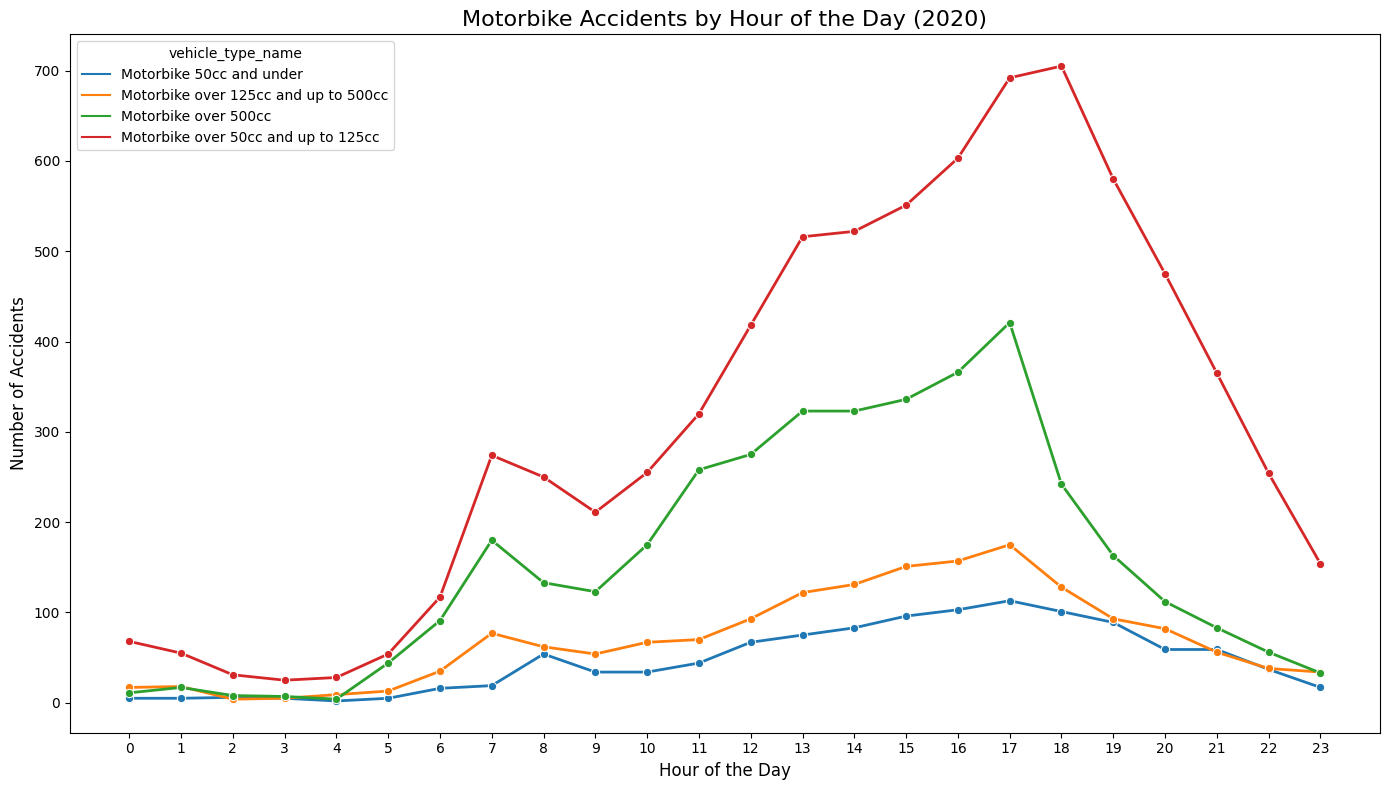

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size
plt.figure(figsize=(14, 8))

# Plot accidents by hour for each vehicle type
sns.lineplot(data=df_bikes_time, x='hour', y='accidents', hue='vehicle_type_name', marker='o', linewidth=2)

# Add title and labels
plt.title('Motorbike Accidents by Hour of the Day (2020)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Customize the x-axis to show hours from 0 to 23
plt.xticks(range(0, 24))

# Show the plot
plt.tight_layout()
plt.show()


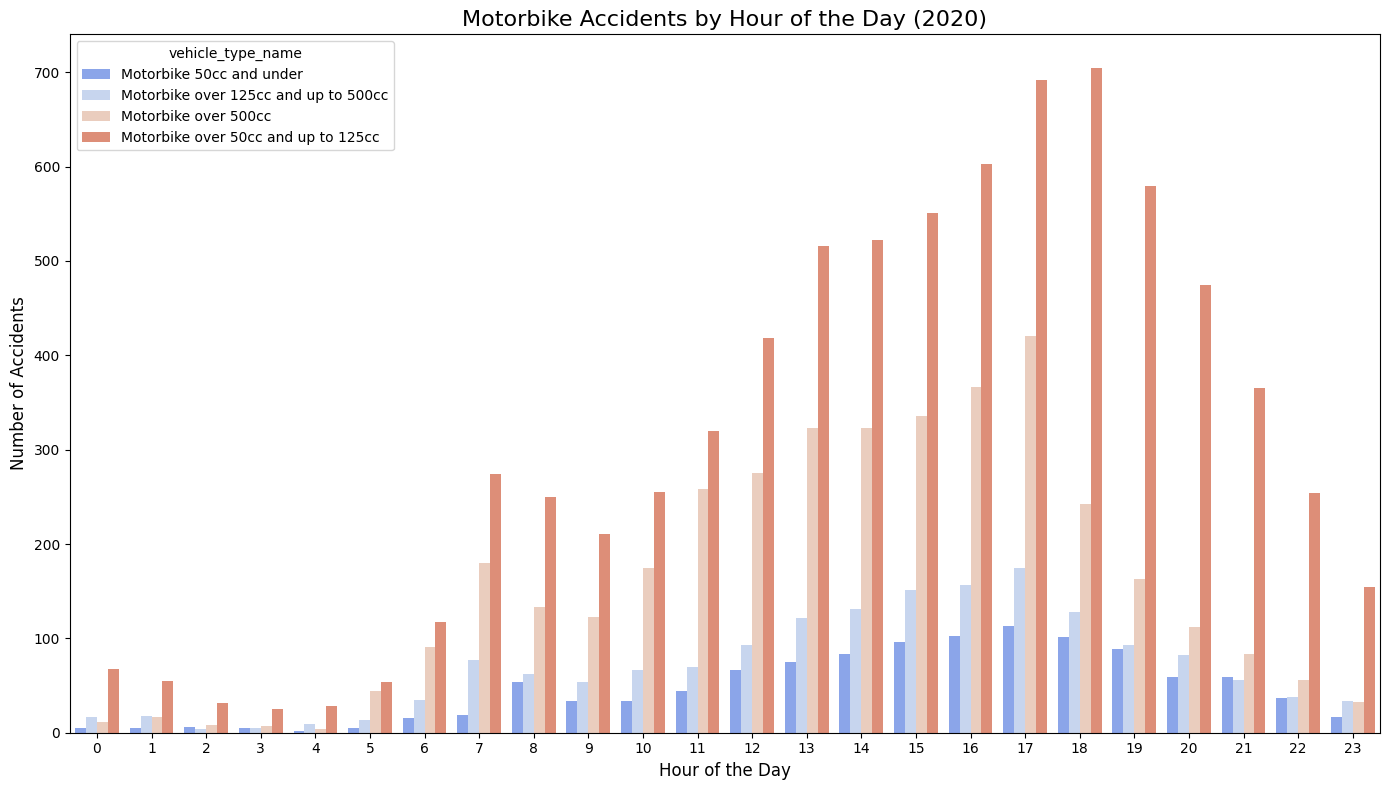

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size
plt.figure(figsize=(14, 8))

# Create the bar plot for motorbike accidents by hour and vehicle type
sns.barplot(data=df_bikes_time, x='hour', y='accidents', hue='vehicle_type_name', palette='coolwarm')

# Add title and labels
plt.title('Motorbike Accidents by Hour of the Day (2020)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Customize the x-axis to show hours from 0 to 23
plt.xticks(range(0, 24))

# Show the plot
plt.tight_layout()
plt.show()


## QUESTION 3:For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [30]:
#Padestrian Accidents by Day of the Week and Time
df_pedestrian = pd.read_sql_query('''
    SELECT 
        CASE 
            WHEN day_of_week = 1 THEN 'Sunday'
            WHEN day_of_week = 2 THEN 'Monday'
            WHEN day_of_week = 3 THEN 'Tuesday'
            WHEN day_of_week = 4 THEN 'Wednesday'
            WHEN day_of_week = 5 THEN 'Thursday'
            WHEN day_of_week = 6 THEN 'Friday'
            WHEN day_of_week = 7 THEN 'Saturday'
        END AS day_of_week_name,
        time,
        COUNT(a.accident_index) AS accidents
    FROM casualty c
    JOIN accident a
    ON a.accident_index = c.accident_index
    WHERE c.accident_year = 2020 AND casualty_class = 3
    GROUP BY 1,2
    ORDER BY 3 DESC  
    LIMIT 30
''', conn)

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\4222300035.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pedestrian_accidents['time'] = pd.to_datetime(pedestrian_accidents['time'], errors='coerce')


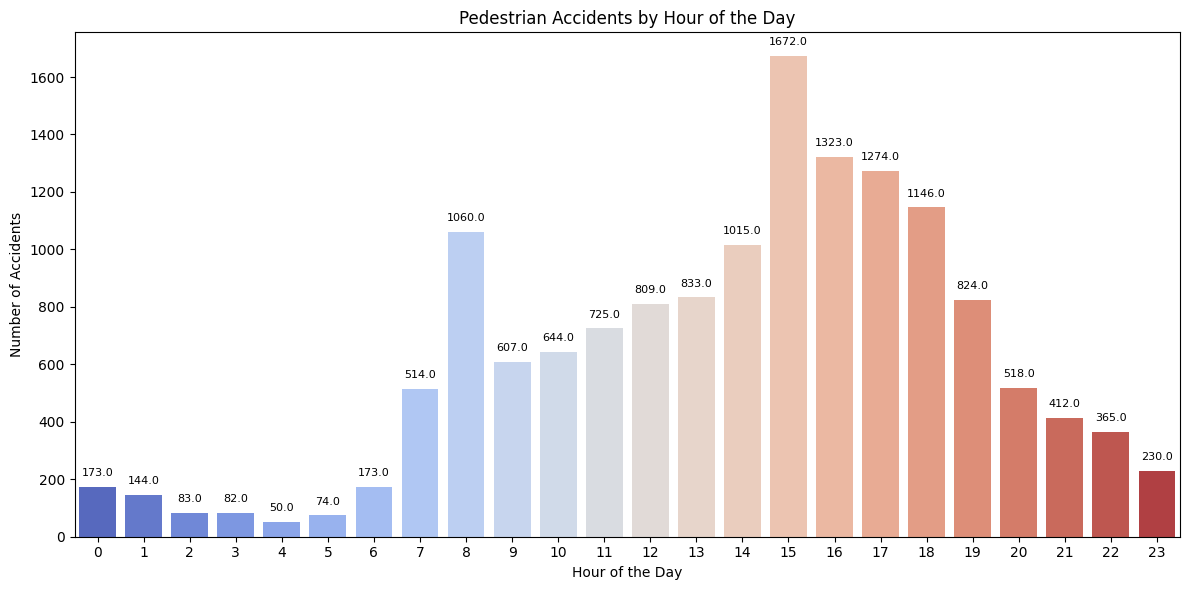

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly filter the DataFrame for pedestrian casualties
pedestrian_data = casualty_data[casualty_data['casualty_class'] == 3]

# Merge with the accident data on the foreign key
pedestrian_accidents = pd.merge(pedestrian_data, accident_data, on='accident_index', how='inner')

# Convert 'time' to datetime and extract the hour
pedestrian_accidents['time'] = pd.to_datetime(pedestrian_accidents['time'], errors='coerce')
pedestrian_accidents['hour'] = pedestrian_accidents['time'].dt.hour

# Plot accidents by Hour of the Day for Pedestrians
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=pedestrian_accidents, x='hour', palette='coolwarm')

# Add title and labels
plt.title('Pedestrian Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))  # Ensure all hours from 0 to 23 are shown

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=8, color='black',
                    xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


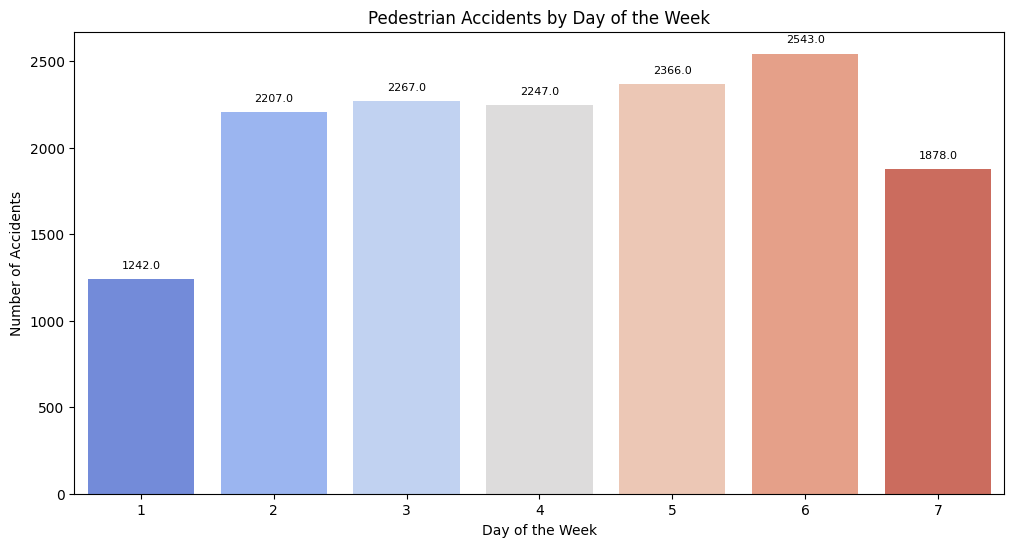

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=pedestrian_accidents, x='day_of_week', palette='coolwarm')

# Add title and labels
plt.title('Pedestrian Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=8, color='black',  # Smaller fontsize
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

## QUESTION 4:Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [33]:
# examine aacident severity value counts
accident_data['accident_severity'].value_counts()

accident_severity
3    71453
2    18355
1     1391
Name: count, dtype: int64

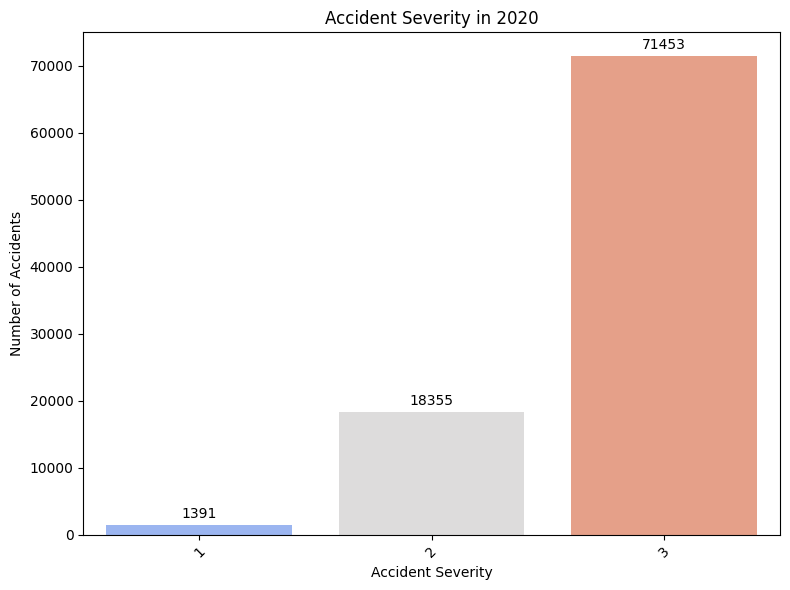

In [34]:
# Set up the plot size
plt.figure(figsize=(8, 6))

# Create the bar plot for accident severity
ax = sns.countplot(data=accident_data, x='accident_severity', palette='coolwarm')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Add title and labels
plt.title('Accident Severity in 2020')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### Step 1: Extract and Clean the Data

In [35]:
import pandas as pd
import sqlite3
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# Step 1: Connect and load full joined data
with sqlite3.connect('accident_data_v1.0.0_2023.db') as conn:
    query = """
    SELECT *
    FROM accident a
    JOIN vehicle v ON a.accident_index = v.accident_index
    JOIN casualty c ON a.accident_index = c.accident_index
    WHERE a.accident_year = 2020
    """
    df = pd.read_sql_query(query, conn)



In [36]:
col_names =  [
    'accident_severity',
    'weather_conditions',
    'light_conditions',
    'road_surface_conditions',
    'speed_limit',
]



In [37]:
apriori =df[col_names].copy()
apriori

accident_severity  weather_conditions  light_conditions  \
0                       3                   9                 1   
1                       3                   1                 1   
2                       3                   1                 1   
3                       3                   1                 4   
4                       2                   1                 4   
...                   ...                 ...               ...   
220430                  2                   1                 1   
220431                  2                   1                 1   
220432                  3                   1                 1   
220433                  3                   1                 1   
220434                  3                   1                 1   

        road_surface_conditions  speed_limit  
0                             9           20  
1                             1           20  
2                             1           20  
3                             2           30  
4                             1           30  
...                         ...          ...  
220430                        1           60  
220431                        1           60  
220432                        1           30  
220433                        1           30  
220434                        1           30  

[220435 rows x 5 columns]

In [38]:
apriori['light_conditions'].unique()

array([ 1,  4,  5,  7,  6, -1], dtype=int64)

In [39]:
apriori['road_surface_conditions'].unique()

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [40]:
apriori['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [41]:
# Count -1 values in each column
minus_one_counts = (apriori[col_names] == -1).sum()
minus_one_counts[minus_one_counts > 0]

weather_conditions           1
light_conditions             1
road_surface_conditions    666
speed_limit                 14
dtype: int64

In [42]:
# Replace -1 with NaN first
apriori[['weather_conditions', 'light_conditions', 'speed_limit']] = apriori[
    ['weather_conditions', 'light_conditions', 'speed_limit']
].replace(-1, pd.NA)

In [43]:
apriori['weather_conditions'] = apriori['weather_conditions'].fillna(apriori['weather_conditions'].mode()[0]).infer_objects()
apriori['light_conditions'] = apriori['light_conditions'].fillna(apriori['light_conditions'].mode()[0]).infer_objects()
apriori['speed_limit'] = apriori['speed_limit'].fillna(apriori['speed_limit'].median()).infer_objects()


C:\Users\882834\AppData\Local\Temp\ipykernel_18336\113343501.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  apriori['weather_conditions'] = apriori['weather_conditions'].fillna(apriori['weather_conditions'].mode()[0]).infer_objects()
C:\Users\882834\AppData\Local\Temp\ipykernel_18336\113343501.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  apriori['light_conditions'] = apriori['light_conditions'].fillna(apriori['light_conditions'].mode()[0]).infer_objects()
C:\Users\882834\AppData\Local\Temp\ipykernel_18336\113343501.py:3: FutureWarning: Downca

In [44]:
# Replace -1 with NaN for processing
apriori['road_surface_conditions'] = apriori['road_surface_conditions'].replace(-1, pd.NA)

# STEP 1: Find most common road surface condition for each weather condition
most_common_surface = (
    apriori[apriori['road_surface_conditions'].notna()]
    .groupby('weather_conditions')['road_surface_conditions']
    .agg(lambda x: x.value_counts().idxmax())
)

# STEP 2: Define a function to apply this mapping
def infer_surface(row):
    if pd.isna(row['road_surface_conditions']):
        return most_common_surface.get(row['weather_conditions'], pd.NA)
    return row['road_surface_conditions']

# STEP 3: Apply the inference
apriori['road_surface_conditions'] = apriori.apply(infer_surface, axis=1)

In [45]:
# Count -1 values in each column
minus_one_counts = (apriori[col_names] == -1).sum()
minus_one_counts[minus_one_counts > 0]

Series([], dtype: int64)

### step 2 onehot encoding

In [46]:
# One-hot encode each column with a prefix
a_severity = pd.get_dummies(apriori['accident_severity'], prefix='severity').astype(int)
weather = pd.get_dummies(apriori['weather_conditions'], prefix='weather').astype(int)
light = pd.get_dummies(apriori['light_conditions'], prefix='light').astype(int)
surface = pd.get_dummies(apriori['road_surface_conditions'], prefix='surface').astype(int)
speed = pd.get_dummies(apriori['speed_limit'], prefix='speed').astype(int)

# Combine all into a new DataFrame
df_encoded = pd.concat([a_severity, weather, light, surface, speed], axis=1)

# View the result
df_encoded.head()


severity_1  severity_2  severity_3  weather_1  weather_2  weather_3  \
0           0           0           1          0          0          0   
1           0           0           1          1          0          0   
2           0           0           1          1          0          0   
3           0           0           1          1          0          0   
4           0           1           0          1          0          0   

   weather_4  weather_5  weather_6  weather_7  ...  surface_3  surface_4  \
0          0          0          0          0  ...          0          0   
1          0          0          0          0  ...          0          0   
2          0          0          0          0  ...          0          0   
3          0          0          0          0  ...          0          0   
4          0          0          0          0  ...          0          0   

   surface_5  surface_9  speed_20.0  speed_30.0  speed_40.0  speed_50.0  \
0          0          1           1           0           0           0   
1          0          0           1           0           0           0   
2          0          0           1           0           0           0   
3          0          0           0           1           0           0   
4          0          0           0           1           0           0   

   speed_60.0  speed_70.0  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0  

[5 rows x 29 columns]

### step3 run apriori algorithm

In [47]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
frequent_itemsets

C:\Users\882834\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0   0.203362                                       (severity_2)
1   0.777445                                       (severity_3)
2   0.780892                                        (weather_1)
3   0.710604                                          (light_1)
4   0.206905                                          (light_4)
5   0.688216                                        (surface_1)
6   0.293560                                        (surface_2)
7   0.542663                                       (speed_30.0)
8   0.604246                            (severity_3, weather_1)
9   0.558282                              (severity_3, light_1)
10  0.536122                            (severity_3, surface_1)
11  0.226107                            (surface_2, severity_3)
12  0.439218                           (severity_3, speed_30.0)
13  0.584240                               (weather_1, light_1)
14  0.646912                             (weather_1, surface_1)
15  0.428376                            (weather_1, speed_30.0)
16  0.536598                               (surface_1, light_1)
17  0.384930                              (light_1, speed_30.0)
18  0.386522                            (surface_1, speed_30.0)
19  0.456497                   (severity_3, light_1, weather_1)
20  0.502534                 (severity_3, surface_1, weather_1)
21  0.345013                (severity_3, weather_1, speed_30.0)
22  0.420773                   (severity_3, surface_1, light_1)
23  0.315630                  (severity_3, light_1, speed_30.0)
24  0.312491                (severity_3, surface_1, speed_30.0)
25  0.507515                    (weather_1, surface_1, light_1)
26  0.320081                   (weather_1, light_1, speed_30.0)
27  0.362919                 (weather_1, surface_1, speed_30.0)
28  0.300420                   (surface_1, light_1, speed_30.0)
29  0.396874        (severity_3, surface_1, light_1, weather_1)
30  0.260780       (severity_3, light_1, weather_1, speed_30.0)
31  0.292844     (severity_3, surface_1, weather_1, speed_30.0)
32  0.245233       (severity_3, surface_1, light_1, speed_30.0)
33  0.283580        (weather_1, surface_1, light_1, speed_30.0)
34  0.231061  (severity_3, weather_1, light_1, surface_1, sp...

In [48]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

support                                           itemsets  length
0   0.203362                                       (severity_2)       1
1   0.777445                                       (severity_3)       1
2   0.780892                                        (weather_1)       1
3   0.710604                                          (light_1)       1
4   0.206905                                          (light_4)       1
5   0.688216                                        (surface_1)       1
6   0.293560                                        (surface_2)       1
7   0.542663                                       (speed_30.0)       1
8   0.604246                            (severity_3, weather_1)       2
9   0.558282                              (severity_3, light_1)       2
10  0.536122                            (severity_3, surface_1)       2
11  0.226107                            (surface_2, severity_3)       2
12  0.439218                           (severity_3, speed_30.0)       2
13  0.584240                               (weather_1, light_1)       2
14  0.646912                             (weather_1, surface_1)       2
15  0.428376                            (weather_1, speed_30.0)       2
16  0.536598                               (surface_1, light_1)       2
17  0.384930                              (light_1, speed_30.0)       2
18  0.386522                            (surface_1, speed_30.0)       2
19  0.456497                   (severity_3, light_1, weather_1)       3
20  0.502534                 (severity_3, surface_1, weather_1)       3
21  0.345013                (severity_3, weather_1, speed_30.0)       3
22  0.420773                   (severity_3, surface_1, light_1)       3
23  0.315630                  (severity_3, light_1, speed_30.0)       3
24  0.312491                (severity_3, surface_1, speed_30.0)       3
25  0.507515                    (weather_1, surface_1, light_1)       3
26  0.320081                   (weather_1, light_1, speed_30.0)       3
27  0.362919                 (weather_1, surface_1, speed_30.0)       3
28  0.300420                   (surface_1, light_1, speed_30.0)       3
29  0.396874        (severity_3, surface_1, light_1, weather_1)       4
30  0.260780       (severity_3, light_1, weather_1, speed_30.0)       4
31  0.292844     (severity_3, surface_1, weather_1, speed_30.0)       4
32  0.245233       (severity_3, surface_1, light_1, speed_30.0)       4
33  0.283580        (weather_1, surface_1, light_1, speed_30.0)       4
34  0.231061  (severity_3, weather_1, light_1, surface_1, sp...       5

In [49]:
temp = frequent_itemsets[(frequent_itemsets['length'] > 1) & (frequent_itemsets['support'] >=0.2)]
temp

support                                           itemsets  length
8   0.604246                            (severity_3, weather_1)       2
9   0.558282                              (severity_3, light_1)       2
10  0.536122                            (severity_3, surface_1)       2
11  0.226107                            (surface_2, severity_3)       2
12  0.439218                           (severity_3, speed_30.0)       2
13  0.584240                               (weather_1, light_1)       2
14  0.646912                             (weather_1, surface_1)       2
15  0.428376                            (weather_1, speed_30.0)       2
16  0.536598                               (surface_1, light_1)       2
17  0.384930                              (light_1, speed_30.0)       2
18  0.386522                            (surface_1, speed_30.0)       2
19  0.456497                   (severity_3, light_1, weather_1)       3
20  0.502534                 (severity_3, surface_1, weather_1)       3
21  0.345013                (severity_3, weather_1, speed_30.0)       3
22  0.420773                   (severity_3, surface_1, light_1)       3
23  0.315630                  (severity_3, light_1, speed_30.0)       3
24  0.312491                (severity_3, surface_1, speed_30.0)       3
25  0.507515                    (weather_1, surface_1, light_1)       3
26  0.320081                   (weather_1, light_1, speed_30.0)       3
27  0.362919                 (weather_1, surface_1, speed_30.0)       3
28  0.300420                   (surface_1, light_1, speed_30.0)       3
29  0.396874        (severity_3, surface_1, light_1, weather_1)       4
30  0.260780       (severity_3, light_1, weather_1, speed_30.0)       4
31  0.292844     (severity_3, surface_1, weather_1, speed_30.0)       4
32  0.245233       (severity_3, surface_1, light_1, speed_30.0)       4
33  0.283580        (weather_1, surface_1, light_1, speed_30.0)       4
34  0.231061  (severity_3, weather_1, light_1, surface_1, sp...       5

## calculate confidence, lift, support

In [50]:
def get_association_rules(metric, min_threshold, itemsets):
    rules = association_rules(itemsets, metric = metric, min_threshold=min_threshold)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    rules = rules[(rules['antecedent_len']>=2)]
    return rules

In [51]:
def get_rules_only_with_accident_severity_in_consequents(rules):
    severity_rules = rules[
        (rules['consequents'].apply(lambda x: any('severity_' in str(item) for item in x)))
    ]
    return severity_rules

In [52]:
def prettify_output(severity_rules):
    for _, row in severity_rules.iterrows():
        antecedents = ' AND '.join(sorted([str(item) for item in row['antecedents']]))
        consequents = ' AND '.join(sorted([str(item) for item in row['consequents']]))
        
        print(f"IF {antecedents} THEN {consequents} "
              f"(Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})")


In [53]:
lift = get_association_rules("lift", 1.05, frequent_itemsets)
lift

antecedents                          consequents  \
6    (severity_3, weather_1)                            (light_1)   
8    (severity_3, surface_1)                          (weather_1)   
9    (severity_3, weather_1)                          (surface_1)   
12   (severity_3, weather_1)                         (speed_30.0)   
14   (severity_3, surface_1)                            (light_1)   
..                       ...                                  ...   
111   (weather_1, surface_1)    (severity_3, light_1, speed_30.0)   
112  (weather_1, speed_30.0)     (severity_3, surface_1, light_1)   
113     (surface_1, light_1)  (severity_3, weather_1, speed_30.0)   
114    (light_1, speed_30.0)   (severity_3, surface_1, weather_1)   
115  (surface_1, speed_30.0)     (severity_3, light_1, weather_1)   

     antecedent support  consequent support   support  confidence      lift  \
6              0.604246            0.710604  0.456497    0.755482  1.063155   
8              0.536122            0.780892  0.502534    0.937350  1.200357   
9              0.604246            0.688216  0.502534    0.831670  1.208443   
12             0.604246            0.542663  0.345013    0.570981  1.052183   
14             0.536122            0.710604  0.420773    0.784845  1.104476   
..                  ...                 ...       ...         ...       ...   
111            0.646912            0.315630  0.231061    0.357176  1.131627   
112            0.428376            0.420773  0.231061    0.539389  1.281902   
113            0.536598            0.345013  0.231061    0.430604  1.248080   
114            0.384930            0.502534  0.231061    0.600269  1.194485   
115            0.386522            0.456497  0.231061    0.597796  1.309527   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
6                 1.0  0.027118    1.183539       0.150103  0.531830   
8                 1.0  0.083880    3.497318       0.359824  0.616999   
9                 1.0  0.086681    1.852220       0.435849  0.636176   
12                1.0  0.017111    1.066006       0.125318  0.430247   
14                1.0  0.039802    1.345059       0.203918  0.509439   
..                ...       ...         ...            ...       ...   
111               1.0  0.026876    1.064630       0.329426  0.315882   
112               1.0  0.050813    1.257521       0.384710  0.373833   
113               1.0  0.045928    1.150319       0.428935  0.355178   
114               1.0  0.037621    1.244502       0.264716  0.352012   
115               1.0  0.054615    1.351310       0.385288  0.377577   

     certainty  kulczynski  antecedent_len  
6     0.155076    0.698945               2  
8     0.714067    0.790444               2  
9     0.460107    0.780934               2  
12    0.061919    0.603380               2  
14    0.256538    0.688489               2  
..         ...         ...             ...  
111   0.060706    0.544619               2  
112   0.204785    0.544263               2  
113   0.130676    0.550161               2  
114   0.196466    0.530031               2  
115   0.259978    0.551979               2  

[78 rows x 15 columns]

In [54]:
severity_rules = get_rules_only_with_accident_severity_in_consequents(lift)
severity_rules

antecedents                          consequents  \
18                (light_1, speed_30.0)                         (severity_3)   
46                 (surface_1, light_1)              (severity_3, weather_1)   
47               (weather_1, surface_1)                (severity_3, light_1)   
48                 (weather_1, light_1)              (severity_3, surface_1)   
57                (light_1, speed_30.0)              (severity_3, weather_1)   
58              (weather_1, speed_30.0)                (severity_3, light_1)   
67              (surface_1, speed_30.0)              (severity_3, weather_1)   
68              (weather_1, speed_30.0)              (severity_3, surface_1)   
77              (surface_1, speed_30.0)                (severity_3, light_1)   
78                (light_1, speed_30.0)              (severity_3, surface_1)   
104    (weather_1, light_1, speed_30.0)              (severity_3, surface_1)   
105  (weather_1, surface_1, speed_30.0)                (severity_3, light_1)   
106    (surface_1, light_1, speed_30.0)              (severity_3, weather_1)   
110                (weather_1, light_1)  (severity_3, surface_1, speed_30.0)   
111              (weather_1, surface_1)    (severity_3, light_1, speed_30.0)   
112             (weather_1, speed_30.0)     (severity_3, surface_1, light_1)   
113                (surface_1, light_1)  (severity_3, weather_1, speed_30.0)   
114               (light_1, speed_30.0)   (severity_3, surface_1, weather_1)   
115             (surface_1, speed_30.0)     (severity_3, light_1, weather_1)   

     antecedent support  consequent support   support  confidence      lift  \
18             0.384930            0.777445  0.315630    0.819969  1.054698   
46             0.536598            0.604246  0.396874    0.739612  1.224024   
47             0.646912            0.558282  0.396874    0.613491  1.098889   
48             0.584240            0.536122  0.396874    0.679300  1.267063   
57             0.384930            0.604246  0.260780    0.677474  1.121188   
58             0.428376            0.558282  0.260780    0.608764  1.090423   
67             0.386522            0.604246  0.292844    0.757638  1.253856   
68             0.428376            0.536122  0.292844    0.683614  1.275110   
77             0.386522            0.558282  0.245233    0.634461  1.136452   
78             0.384930            0.536122  0.245233    0.637086  1.188323   
104            0.320081            0.536122  0.231061    0.721884  1.346493   
105            0.362919            0.558282  0.231061    0.636675  1.140417   
106            0.300420            0.604246  0.231061    0.769129  1.272873   
110            0.584240            0.312491  0.231061    0.395490  1.265604   
111            0.646912            0.315630  0.231061    0.357176  1.131627   
112            0.428376            0.420773  0.231061    0.539389  1.281902   
113            0.536598            0.345013  0.231061    0.430604  1.248080   
114            0.384930            0.502534  0.231061    0.600269  1.194485   
115            0.386522            0.456497  0.231061    0.597796  1.309527   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
18                1.0  0.016369    1.236205       0.084317  0.372758   
46                1.0  0.072637    1.519862       0.394955  0.533455   
47                1.0  0.035715    1.142838       0.254866  0.490987   
48                1.0  0.083650    1.446455       0.506959  0.548557   
57                1.0  0.028187    1.227044       0.175735  0.358019   
58                1.0  0.021625    1.129032       0.145069  0.359261   
67                1.0  0.059289    1.632901       0.330020  0.419592   
68                1.0  0.063182    1.466179       0.377440  0.436004   
77                1.0  0.029445    1.208401       0.195718  0.350548   
78                1.0  0.038864    1.278203       0.257658  0.362869   
104               1.0  0.059459    1.667933       0.37

In [55]:
print("OUTPUT FOR LIFT METRIC")
prettify_output(severity_rules)

OUTPUT FOR LIFT METRIC
IF light_1 AND speed_30.0 THEN severity_3 (Support: 0.32, Confidence: 0.82, Lift: 1.05)
IF light_1 AND surface_1 THEN severity_3 AND weather_1 (Support: 0.40, Confidence: 0.74, Lift: 1.22)
IF surface_1 AND weather_1 THEN light_1 AND severity_3 (Support: 0.40, Confidence: 0.61, Lift: 1.10)
IF light_1 AND weather_1 THEN severity_3 AND surface_1 (Support: 0.40, Confidence: 0.68, Lift: 1.27)
IF light_1 AND speed_30.0 THEN severity_3 AND weather_1 (Support: 0.26, Confidence: 0.68, Lift: 1.12)
IF speed_30.0 AND weather_1 THEN light_1 AND severity_3 (Support: 0.26, Confidence: 0.61, Lift: 1.09)
IF speed_30.0 AND surface_1 THEN severity_3 AND weather_1 (Support: 0.29, Confidence: 0.76, Lift: 1.25)
IF speed_30.0 AND weather_1 THEN severity_3 AND surface_1 (Support: 0.29, Confidence: 0.68, Lift: 1.28)
IF speed_30.0 AND surface_1 THEN light_1 AND severity_3 (Support: 0.25, Confidence: 0.63, Lift: 1.14)
IF light_1 AND speed_30.0 THEN severity_3 AND surface_1 (Support: 0.25, 

In [56]:
support = get_association_rules("support", 0.3, frequent_itemsets)
support

antecedents              consequents  \
20               (severity_3, light_1)              (weather_1)   
21             (severity_3, weather_1)                (light_1)   
22                (weather_1, light_1)             (severity_3)   
26             (severity_3, surface_1)              (weather_1)   
27             (severity_3, weather_1)              (surface_1)   
28              (weather_1, surface_1)             (severity_3)   
32             (severity_3, weather_1)             (speed_30.0)   
33            (severity_3, speed_30.0)              (weather_1)   
34             (weather_1, speed_30.0)             (severity_3)   
38             (severity_3, surface_1)                (light_1)   
39               (severity_3, light_1)              (surface_1)   
40                (surface_1, light_1)             (severity_3)   
44               (severity_3, light_1)             (speed_30.0)   
45            (severity_3, speed_30.0)                (light_1)   
46               (light_1, speed_30.0)             (severity_3)   
50             (severity_3, surface_1)             (speed_30.0)   
51            (severity_3, speed_30.0)              (surface_1)   
52             (surface_1, speed_30.0)             (severity_3)   
56              (weather_1, surface_1)                (light_1)   
57                (weather_1, light_1)              (surface_1)   
58                (surface_1, light_1)              (weather_1)   
62                (weather_1, light_1)             (speed_30.0)   
63             (weather_1, speed_30.0)                (light_1)   
64               (light_1, speed_30.0)              (weather_1)   
68              (weather_1, surface_1)             (speed_30.0)   
69             (weather_1, speed_30.0)              (surface_1)   
70             (surface_1, speed_30.0)              (weather_1)   
74                (surface_1, light_1)             (speed_30.0)   
75             (surface_1, speed_30.0)                (light_1)   
76               (light_1, speed_30.0)              (surface_1)   
80    (severity_3, surface_1, light_1)              (weather_1)   
81  (severity_3, surface_1, weather_1)                (light_1)   
82    (severity_3, light_1, weather_1)              (surface_1)   
83     (weather_1, surface_1, light_1)             (severity_3)   
84             (severity_3, surface_1)     (weather_1, light_1)   
85               (severity_3, light_1)   (weather_1, surface_1)   
86             (severity_3, weather_1)     (surface_1, light_1)   
87                (surface_1, light_1)  (severity_3, weather_1)   
88              (weather_1, surface_1)    (severity_3, light_1)   
89                (weather_1, light_1)  (severity_3, surface_1)   

    antecedent support  consequent support   support  confidence      lift  \
20            0.558282            0.780892  0.456497    0.817682  1.047112   
21            0.604246            0.710604  0.456497    0.755482  1.063155   
22            0.584240            0.777445  0.456497    0.781352  1.005026   
26            0.536122            0.780892  0.502534    0.937350  1.200357   
27            0.604246            0.688216  0.502534    0.831670  1.208443   
28            0.646912            0.777445  0.502534    0.776819  0.999196   
32            0.604246            0.542663  0.345013    0.570981  1.052183   
33            0.439218            0.780892  0.345013    0.785517  1.005923   
34            0.428376            0.777445  0.345013    0.805399  1.035956   
38            0.536122            0.710604  0.420773    0.784845  1.104476   
39            0.558282            0.688216  0.420773    0.753691  1.095137   
40            0.536598            0.777445  0.420773    0.784148  1.008623   
44            0.558282            0.542663  0.315630    0.565360  1.041824   
45            0.439218            0.710604  0.315630    0.718619  1.011279   
46            0.384930            0.777445  0.315630    0.819969  1.054698   
50            0.536122         

In [57]:
severity_rules = get_rules_only_with_accident_severity_in_consequents(support)
severity_rules

antecedents              consequents  \
22             (weather_1, light_1)             (severity_3)   
28           (weather_1, surface_1)             (severity_3)   
34          (weather_1, speed_30.0)             (severity_3)   
40             (surface_1, light_1)             (severity_3)   
46            (light_1, speed_30.0)             (severity_3)   
52          (surface_1, speed_30.0)             (severity_3)   
83  (weather_1, surface_1, light_1)             (severity_3)   
87             (surface_1, light_1)  (severity_3, weather_1)   
88           (weather_1, surface_1)    (severity_3, light_1)   
89             (weather_1, light_1)  (severity_3, surface_1)   

    antecedent support  consequent support   support  confidence      lift  \
22            0.584240            0.777445  0.456497    0.781352  1.005026   
28            0.646912            0.777445  0.502534    0.776819  0.999196   
34            0.428376            0.777445  0.345013    0.805399  1.035956   
40            0.536598            0.777445  0.420773    0.784148  1.008623   
46            0.384930            0.777445  0.315630    0.819969  1.054698   
52            0.386522            0.777445  0.312491    0.808469  1.039906   
83            0.507515            0.777445  0.396874    0.781996  1.005854   
87            0.536598            0.604246  0.396874    0.739612  1.224024   
88            0.646912            0.558282  0.396874    0.613491  1.098889   
89            0.584240            0.536122  0.396874    0.679300  1.267063   

    representativity  leverage  conviction  zhangs_metric   jaccard  \
22               1.0  0.002283    1.017871       0.012029  0.504313   
28               1.0 -0.000404    0.997199      -0.002274  0.545152   
34               1.0  0.011975    1.143648       0.060719  0.400802   
40               1.0  0.003597    1.031058       0.018449  0.471047   
46               1.0  0.016369    1.236205       0.084317  0.372758   
52               1.0  0.011992    1.161982       0.062552  0.367000   
83               1.0  0.002310    1.020877       0.011818  0.446888   
87               1.0  0.072637    1.519862       0.394955  0.533455   
88               1.0  0.035715    1.142838       0.254866  0.490987   
89               1.0  0.083650    1.446455       0.506959  0.548557   

    certainty  kulczynski  antecedent_len  
22   0.017558    0.684264               2  
28  -0.002809    0.711605               2  
34   0.125605    0.624589               2  
40   0.030122    0.662687               2  
46   0.191073    0.612977               2  
52   0.139402    0.605208               2  
83   0.020450    0.646241               3  
87   0.342045    0.698211               2  
88   0.124985    0.662188               2  
89   0.308655    0.709785               2

In [58]:
print("OUTPUT FOR SUPPORT METRIC")
prettify_output(severity_rules)

OUTPUT FOR SUPPORT METRIC
IF light_1 AND weather_1 THEN severity_3 (Support: 0.46, Confidence: 0.78, Lift: 1.01)
IF surface_1 AND weather_1 THEN severity_3 (Support: 0.50, Confidence: 0.78, Lift: 1.00)
IF speed_30.0 AND weather_1 THEN severity_3 (Support: 0.35, Confidence: 0.81, Lift: 1.04)
IF light_1 AND surface_1 THEN severity_3 (Support: 0.42, Confidence: 0.78, Lift: 1.01)
IF light_1 AND speed_30.0 THEN severity_3 (Support: 0.32, Confidence: 0.82, Lift: 1.05)
IF speed_30.0 AND surface_1 THEN severity_3 (Support: 0.31, Confidence: 0.81, Lift: 1.04)
IF light_1 AND surface_1 AND weather_1 THEN severity_3 (Support: 0.40, Confidence: 0.78, Lift: 1.01)
IF light_1 AND surface_1 THEN severity_3 AND weather_1 (Support: 0.40, Confidence: 0.74, Lift: 1.22)
IF surface_1 AND weather_1 THEN light_1 AND severity_3 (Support: 0.40, Confidence: 0.61, Lift: 1.10)
IF light_1 AND weather_1 THEN severity_3 AND surface_1 (Support: 0.40, Confidence: 0.68, Lift: 1.27)


In [59]:
confidence = get_association_rules("confidence", 0.7, frequent_itemsets)
confidence

antecedents              consequents  \
16                           (severity_3, light_1)              (weather_1)   
17                         (severity_3, weather_1)                (light_1)   
18                            (weather_1, light_1)             (severity_3)   
19                         (severity_3, surface_1)              (weather_1)   
20                         (severity_3, weather_1)              (surface_1)   
21                          (weather_1, surface_1)             (severity_3)   
23                        (severity_3, speed_30.0)              (weather_1)   
24                         (weather_1, speed_30.0)             (severity_3)   
25                         (severity_3, surface_1)                (light_1)   
26                           (severity_3, light_1)              (surface_1)   
27                            (surface_1, light_1)             (severity_3)   
28                        (severity_3, speed_30.0)                (light_1)   
29                           (light_1, speed_30.0)             (severity_3)   
30                        (severity_3, speed_30.0)              (surface_1)   
31                         (surface_1, speed_30.0)             (severity_3)   
32                          (weather_1, surface_1)                (light_1)   
33                            (weather_1, light_1)              (surface_1)   
34                            (surface_1, light_1)              (weather_1)   
37                         (weather_1, speed_30.0)                (light_1)   
38                           (light_1, speed_30.0)              (weather_1)   
39                         (weather_1, speed_30.0)              (surface_1)   
40                         (surface_1, speed_30.0)              (weather_1)   
41                         (surface_1, speed_30.0)                (light_1)   
42                           (light_1, speed_30.0)              (surface_1)   
43                (severity_3, surface_1, light_1)              (weather_1)   
44              (severity_3, surface_1, weather_1)                (light_1)   
45                (severity_3, light_1, weather_1)              (surface_1)   
46                 (weather_1, surface_1, light_1)             (severity_3)   
47                         (severity_3, surface_1)     (weather_1, light_1)   
48                           (severity_3, light_1)   (weather_1, surface_1)   
49                            (surface_1, light_1)  (severity_3, weather_1)   
50               (severity_3, light_1, speed_30.0)              (weather_1)   
51             (severity_3, weather_1, speed_30.0)                (light_1)   
52                (weather_1, light_1, speed_30.0)             (severity_3)   
53             (severity_3, surface_1, speed_30.0)              (weather_1)   
54             (severity_3, weather_1, speed_30.0)              (surface_1)   
55              (weather_1, surface_1, speed_30.0)             (severity_3)   
56                         (surface_1, speed_30.0)  (severity_3, weather_1)   
57             (severity_3, surface_1, speed_30.0)                (light_1)   
58               (severity_3, light_1, speed_30.0)              (surface_1)   
59                (surface_1, light_1, speed_30.0)             (severity_3)   
60              (weather_1, surface_1, speed_30.0)                (light_1)   
61                (weather_1, light_1, speed_30.0)              (surface_1)   
62                (surface_1, light_1, speed_30.0)              (weather_1)   
63                         (surface_1, speed_30.0)     (weather_1, light_1)   
64                           (light_1, speed_30.0)   (weather_1, surface_1)   
65    (severity_3, light_1, weather_1, speed_30.0)              (surface_1)   
66  (severity_3, surface_1, weather_1, speed_30.0)                (light_1)   
67    (severity_3, surface_1, light_1, speed_30.0)              (weather_1)   
68     (weather_1, surface_1, light_1, speed_30.0)             (severity_3)   
69        

In [60]:
severity_rules = get_rules_only_with_accident_severity_in_consequents(confidence)
severity_rules

antecedents              consequents  \
18                         (weather_1, light_1)             (severity_3)   
21                       (weather_1, surface_1)             (severity_3)   
24                      (weather_1, speed_30.0)             (severity_3)   
27                         (surface_1, light_1)             (severity_3)   
29                        (light_1, speed_30.0)             (severity_3)   
31                      (surface_1, speed_30.0)             (severity_3)   
46              (weather_1, surface_1, light_1)             (severity_3)   
49                         (surface_1, light_1)  (severity_3, weather_1)   
52             (weather_1, light_1, speed_30.0)             (severity_3)   
55           (weather_1, surface_1, speed_30.0)             (severity_3)   
56                      (surface_1, speed_30.0)  (severity_3, weather_1)   
59             (surface_1, light_1, speed_30.0)             (severity_3)   
68  (weather_1, surface_1, light_1, speed_30.0)             (severity_3)   
71             (weather_1, light_1, speed_30.0)  (severity_3, surface_1)   
72             (surface_1, light_1, speed_30.0)  (severity_3, weather_1)   

    antecedent support  consequent support   support  confidence      lift  \
18            0.584240            0.777445  0.456497    0.781352  1.005026   
21            0.646912            0.777445  0.502534    0.776819  0.999196   
24            0.428376            0.777445  0.345013    0.805399  1.035956   
27            0.536598            0.777445  0.420773    0.784148  1.008623   
29            0.384930            0.777445  0.315630    0.819969  1.054698   
31            0.386522            0.777445  0.312491    0.808469  1.039906   
46            0.507515            0.777445  0.396874    0.781996  1.005854   
49            0.536598            0.604246  0.396874    0.739612  1.224024   
52            0.320081            0.777445  0.260780    0.814731  1.047961   
55            0.362919            0.777445  0.292844    0.806913  1.037904   
56            0.386522            0.604246  0.292844    0.757638  1.253856   
59            0.300420            0.777445  0.245233    0.816302  1.049982   
68            0.283580            0.777445  0.231061    0.814801  1.048050   
71            0.320081            0.536122  0.231061    0.721884  1.346493   
72            0.300420            0.604246  0.231061    0.769129  1.272873   

    representativity  leverage  conviction  zhangs_metric   jaccard  \
18               1.0  0.002283    1.017871       0.012029  0.504313   
21               1.0 -0.000404    0.997199      -0.002274  0.545152   
24               1.0  0.011975    1.143648       0.060719  0.400802   
27               1.0  0.003597    1.031058       0.018449  0.471047   
29               1.0  0.016369    1.236205       0.084317  0.372758   
31               1.0  0.011992    1.161982       0.062552  0.367000   
46               1.0  0.002310    1.020877       0.011818  0.446888   
49               1.0  0.072637    1.519862       0.394955  0.533455   
52               1.0  0.011935    1.201258       0.067310  0.311660   
55               1.0  0.010694    1.152614       0.057323  0.345530   
56               1.0  0.059289    1.632901       0.330020  0.419592   
59               1.0  0.011674    1.211532       0.068044  0.294528   
68               1.0  0.010593    1.201707       0.063994  0.278399   
71               1.0  0.059459    1.667933       0.378472  0.369615   
72               1.0  0.049534    1.714174       0.306435  0.343022   

    certainty  kulczynski  antecedent_len  
18   0.017558    0.684264               2  
21  -0.002809    0.711605               2  
24   0.125605    0.624589               2  
27   0.030122    0.662687               2  
29   0.191073    0.612977               2  
31   0.139402    0.605208               2  
46   0.020450    0.646241               3  
49   0.342045    0.698211               2  
52   0.167539    0.575082            

In [61]:
print("OUTPUT FOR CONFIDENCE METRIC")
prettify_output(severity_rules)

OUTPUT FOR CONFIDENCE METRIC
IF light_1 AND weather_1 THEN severity_3 (Support: 0.46, Confidence: 0.78, Lift: 1.01)
IF surface_1 AND weather_1 THEN severity_3 (Support: 0.50, Confidence: 0.78, Lift: 1.00)
IF speed_30.0 AND weather_1 THEN severity_3 (Support: 0.35, Confidence: 0.81, Lift: 1.04)
IF light_1 AND surface_1 THEN severity_3 (Support: 0.42, Confidence: 0.78, Lift: 1.01)
IF light_1 AND speed_30.0 THEN severity_3 (Support: 0.32, Confidence: 0.82, Lift: 1.05)
IF speed_30.0 AND surface_1 THEN severity_3 (Support: 0.31, Confidence: 0.81, Lift: 1.04)
IF light_1 AND surface_1 AND weather_1 THEN severity_3 (Support: 0.40, Confidence: 0.78, Lift: 1.01)
IF light_1 AND surface_1 THEN severity_3 AND weather_1 (Support: 0.40, Confidence: 0.74, Lift: 1.22)
IF light_1 AND speed_30.0 AND weather_1 THEN severity_3 (Support: 0.26, Confidence: 0.81, Lift: 1.05)
IF speed_30.0 AND surface_1 AND weather_1 THEN severity_3 (Support: 0.29, Confidence: 0.81, Lift: 1.04)
IF speed_30.0 AND surface_1 THEN

### Question 5: Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

In [62]:
# examine lsoa data
lsoa_data

objectid   lsoa01cd          lsoa01nm         lsoa01nmw   shape__area  \
0          4576  E01004576   Wandsworth 013D   Wandsworth 013D  4.456251e+05   
1          3034  E01003034      Lambeth 012A      Lambeth 012A  1.146984e+05   
2          4726  E01004726  Westminster 003C  Westminster 003C  1.857269e+05   
3          3617  E01003617       Newham 012B       Newham 012B  2.326906e+05   
4          4763  E01004763  Westminster 013B  Westminster 013B  2.936638e+05   
...         ...        ...               ...               ...           ...   
83149     32956  W01000474        Powys 016B        Powys 016B  2.544296e+08   
83150     32923  W01000441        Powys 005B        Powys 005B  3.483058e+07   
83151     32940  W01000458        Powys 002C        Powys 002C  1.887534e+07   
83152     32925  W01000443        Powys 015B        Powys 015B  1.269792e+08   
83153     32966  W01000484        Powys 011E        Powys 011E  1.535530e+08   

       shape__length                              globalid  
0        4486.701130  c7ddebfb-d730-4be6-b67e-938adb21309e  
1        1719.140860  cb2e7f50-252f-469e-9b13-a56794f5d5d6  
2        2698.692831  e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18  
3        3013.438191  3e1979c9-8863-4982-afa5-7a6de00635d7  
4        4706.823542  94474f4a-0fea-4630-9173-e8fdbb834c34  
...              ...                                   ...  
83149   95127.783188  9d313ac2-f536-48e1-8597-5ff882ac38be  
83150   36571.181514  361cbb2a-d0c3-43c9-9b73-6209e4768081  
83151   35904.222345  18ab5974-f662-4438-b8a0-6033a999270d  
83152   57119.118422  c89dadcc-9752-4881-894b-4d63f25251c5  
83153   81092.977857  629864d0-e8b8-41a9-aa65-d8ea28fc6eef  

[83154 rows x 7 columns]

In [17]:
# SQL Command Query would filter the accident data based on the LSOA names for the regions of interest
# Define the query
query = """
SELECT a.accident_index, a.longitude, a.latitude, a.accident_year, l.lsoa01nm
FROM accident a
JOIN lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE (
    l.lsoa01nm LIKE '%Kingston Upon Hull%'
    OR l.lsoa01nm LIKE '%East Riding of Yorkshire%'
    OR l.lsoa01nm LIKE '%North East Lincolnshire%'
    OR l.lsoa01nm LIKE '%North Lincolnshire%'
)
AND a.longitude IS NOT NULL
AND a.latitude IS NOT NULL
AND a.accident_year = 2020;
"""

# Execute the query and store the result in a DataFrame
region_data = pd.read_sql_query(query, conn)

# Show the first few rows
region_data.head()

accident_index  longitude   latitude  accident_year  \
0  2020160914930  -0.393424  53.744936           2020   
1  2020160915008  -0.528743  53.512895           2020   
2  2020160915028  -0.324858  53.791630           2020   
3  2020160915041  -0.095008  53.574501           2020   
4  2020160915047  -0.327733  53.767805           2020   

                       lsoa01nm  
0       Kingston upon Hull 028E  
1       North Lincolnshire 022C  
2       Kingston upon Hull 002E  
3  North East Lincolnshire 003C  
4       Kingston upon Hull 016D

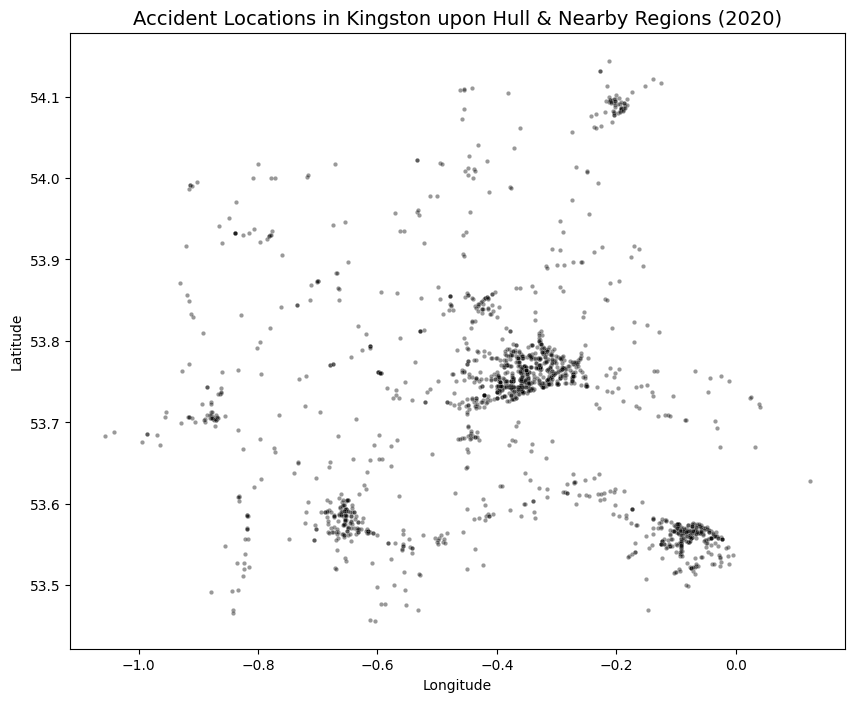

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(10, 8))

# Scatter plot of accident locations
sns.scatterplot(data=region_data, x='longitude', y='latitude', color='black', alpha=0.4, s=10)

plt.title("Accident Locations in Kingston upon Hull & Nearby Regions (2020)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



### Step-by-step for K-Means Clustering

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select and scale the coordinates
coords = region_data[['longitude', 'latitude']].dropna()
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(coords)
scaled_coords

array([[-0.04961134,  0.19077661],
       [-0.65924685, -1.49961163],
       [ 0.25929036,  0.53093627],
       ...,
       [ 0.33127401,  0.46624664],
       [-1.44512022, -1.08505889],
       [ 0.18177886,  0.17382472]], shape=(1663, 2))

In [20]:
# Fit K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_coords)

# Add cluster labels to original DataFrame
region_data = region_data.loc[coords.index]  # Align indices after dropna
region_data['cluster'] = cluster_labels


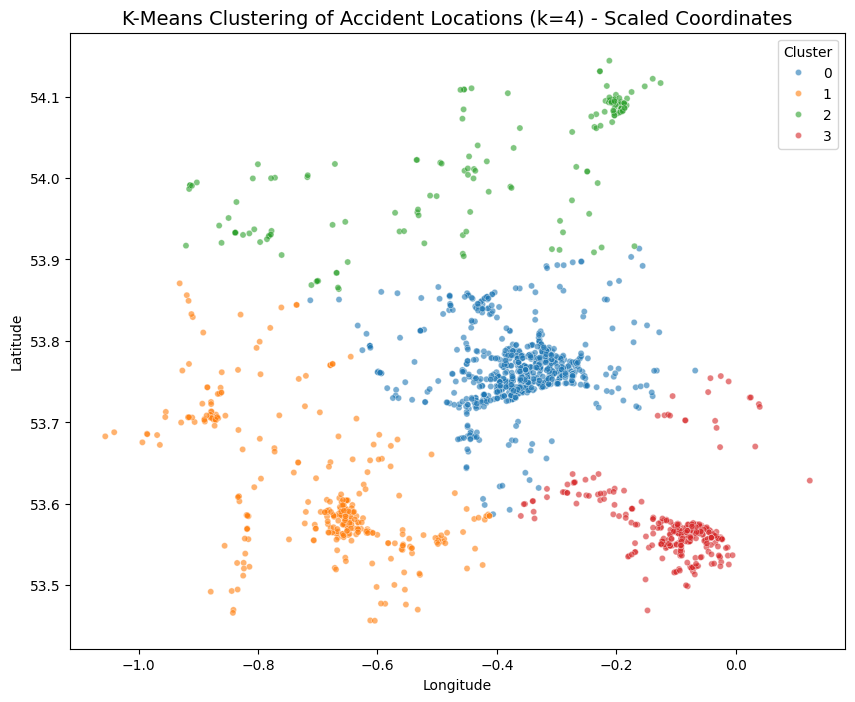

In [21]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=region_data, 
    x='longitude', y='latitude', 
    hue='cluster', palette='tab10', 
    s=20, alpha=0.6
)

plt.title(f"K-Means Clustering of Accident Locations (k={k}) - Scaled Coordinates", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

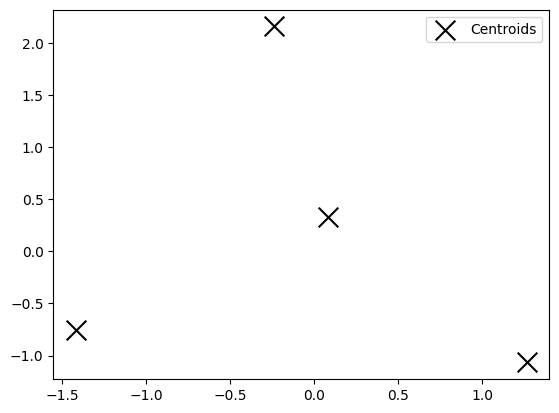

In [22]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.legend()


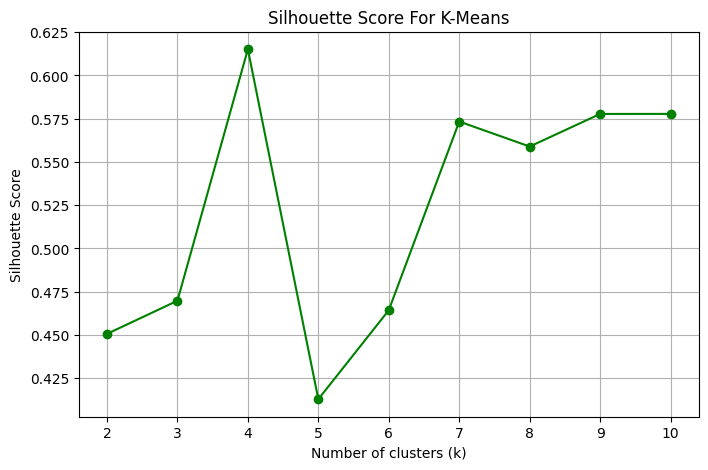

Best k according to silhouette score: 4


In [23]:
from sklearn.metrics import silhouette_score
# Define the range of k values you want to try
k_range = range(2, 11)  # Trying k from 2 to 10
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_coords)
    score = silhouette_score(scaled_coords, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score For K-Means')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Print best k according to silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k according to silhouette score: {best_k}")


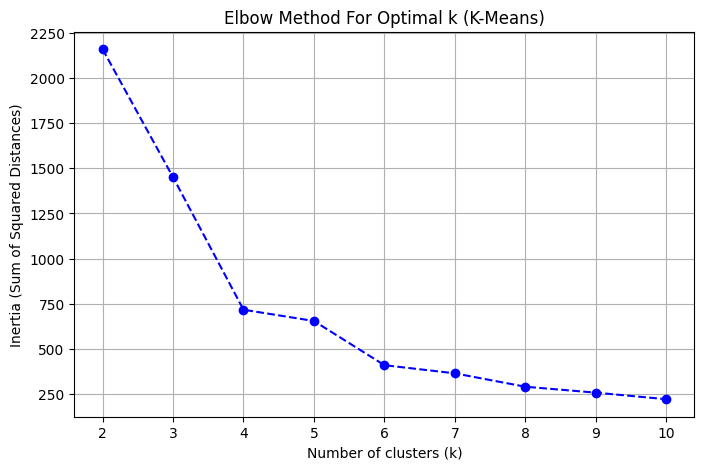

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of k values to try (for example, from 2 to 10 clusters)
k_range = range(2, 11)

# List to hold the inertia (sum of squared distances to the closest cluster center) for each k
inertias = []

# Loop over the range of k values and compute inertia for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_coords)  # scaled_coords should be your standardized coordinates (e.g., from StandardScaler)
    inertias.append(kmeans.inertia_)

# Plot the inertia values to use the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), inertias, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k (K-Means)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(list(k_range))
plt.grid(True)
plt.show()


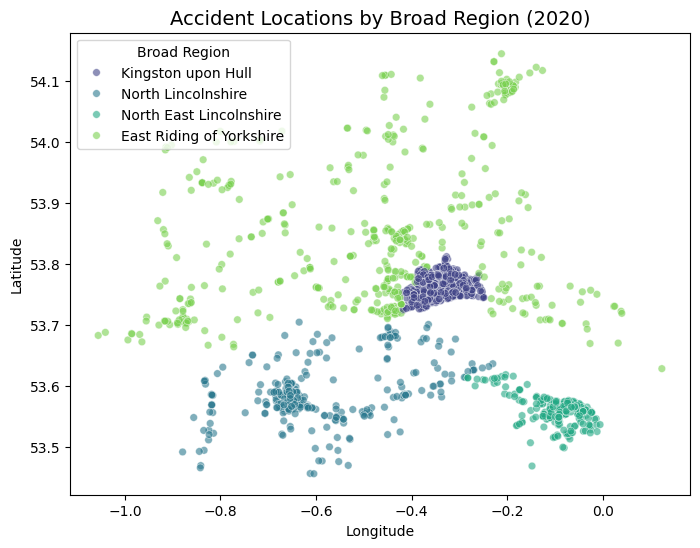

The broad region with the highest number of accidents is 'Kingston upon Hull' with 569 accidents.

Accident counts per broad region:
broad_region
East Riding of Yorkshire    488
Kingston upon Hull          569
North East Lincolnshire     302
North Lincolnshire          304
dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'filtered_region_data' loaded from your SQL query,
# which contains columns: 'longitude', 'latitude', and 'lsoa01nm'

# Define the mapping function
def map_to_broad_region(lsoa):
    """
    Maps a given LSOA name to a broader region.
    """
    if "Kingston upon Hull" in lsoa:
        return "Kingston upon Hull"
    elif "East Riding of Yorkshire" in lsoa:
        return "East Riding of Yorkshire"
    elif "North East Lincolnshire" in lsoa:
        return "North East Lincolnshire"
    elif "North Lincolnshire" in lsoa:
        return "North Lincolnshire"
    else:
        return "Other"  # Catch-all for any other LSOA names

# Apply the function to create a new column 'broad_region'
region_data['broad_region'] = region_data['lsoa01nm'].apply(map_to_broad_region)

# Visualize the accident locations colored by broad region
plt.figure(figsize=(8, 6))
sns.scatterplot(data=region_data, 
                x='longitude', y='latitude', 
                hue='broad_region', 
                palette='viridis', 
                s=30, alpha=0.6)
plt.title("Accident Locations by Broad Region (2020)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Broad Region')
plt.show()

# Group by 'broad_region' to count accidents per region
accidents_per_region = region_data.groupby('broad_region').size()

# Find the region with the highest number of accidents
region_with_highest_accidents = accidents_per_region.idxmax()
number_of_accidents = accidents_per_region.max()

print(f"The broad region with the highest number of accidents is '{region_with_highest_accidents}' with {number_of_accidents} accidents.\n")
print("Accident counts per broad region:")
print(accidents_per_region)


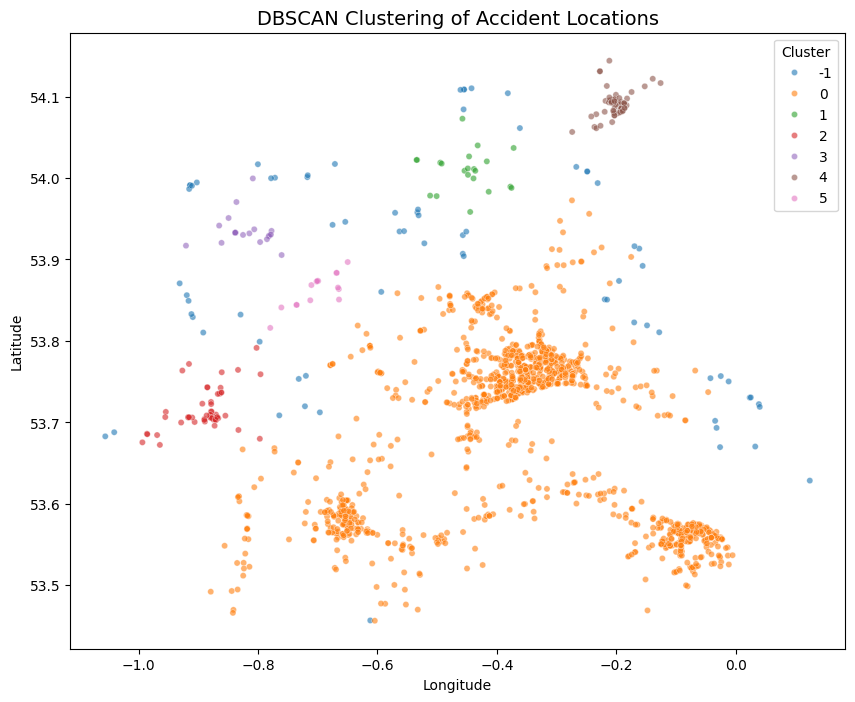

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Select and drop rows with missing coordinates
coords = region_data[['longitude', 'latitude']].dropna()

# Standardize the coordinates
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(coords)

# Apply DBSCAN
# You can adjust eps and min_samples depending on the density of your data
dbscan = DBSCAN(eps=0.3, min_samples=10)
db_labels = dbscan.fit_predict(scaled_coords)

# Align indices after dropna and add cluster labels
region_data_db = region_data.loc[coords.index].copy()
region_data_db['db_cluster'] = db_labels

# Plot the clusters from DBSCAN
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=region_data_db,
    x='longitude', y='latitude',
    hue='db_cluster', palette='tab10',
    s=20, alpha=0.6
)
plt.title("DBSCAN Clustering of Accident Locations", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


### Question 6: Choose three policing areas by filtering the data using the "police_force" column, then create time series models to predict weekly accident counts for the upcoming year based on historical data from 2017 to 2019.

In [73]:
selected_forces = [13,16, 14]
placeholders = ', '.join(['?'] * len(selected_forces))

cursor.execute(f"""
    SELECT police_force, date
    FROM accident
    WHERE police_force IN ({placeholders})
    AND accident_year >= 2017 AND accident_year <= 2020
""", selected_forces)

rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=columns)
df

police_force        date
0                13  19/05/2017
1                13  13/03/2017
2                13  17/03/2017
3                13  14/01/2017
4                13  01/01/2017
...             ...         ...
33195            16  25/12/2020
33196            16  31/12/2020
33197            16  24/12/2020
33198            16  08/12/2020
33199            16  29/12/2020

[33200 rows x 2 columns]

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [75]:
def preprocess_data(df_region):
    # Step 1: Preprocess
    df_region['date'] = pd.to_datetime(df_region['date'], format='%d/%m/%Y', errors='coerce')
    df_region.set_index('date', inplace=True)
    weekly_accidents = df_region.resample('W').size().reset_index(name='accident_count')
    weekly_accidents.set_index('date', inplace=True)
    weekly_accidents
    return weekly_accidents

In [76]:
# STL decomposition
def plot_stl_decomposition(weekly_accidents, label):
    STL(weekly_accidents['accident_count']).fit().plot()
    plt.suptitle(f'STL Decomposition - {label}')
    plt.tight_layout()
    plt.show()

In [77]:
# ADF Test
def conduct_adf_test(weekly_accidents):
    adf_stat, p_val = adfuller(weekly_accidents['accident_count'])[:2]
    print(f"ADF Statistic: {adf_stat:.3f}; p-value: {p_val:.3f}")

In [78]:
def run_Ljungbox_test(model):
    # Evaluation using Ljung-Box test
    ljungbox = acorr_ljungbox(model.resid) #returns test score for first 10 lags.
    return ljungbox

In [79]:
def fit_arima_model(train,test, order):
    arima_model = SARIMAX(train['accident_count'], order=order).fit()
    # forecast the weekly accident counts for the next 52 weeks
    forecast = arima_model.get_forecast(steps=52)
    mean = forecast.predicted_mean
    conf_int = forecast.conf_int()

    print(arima_model.summary())
    # Ljung-Box test
    print("Ljung-Box test for arima model", acorr_ljungbox(arima_model.resid, lags=[10]))
    
    # Plot diagnostics
    arima_model.plot_diagnostics(figsize=(10, 8))
    plt.suptitle("ARIMA Diagnostics", fontsize=14)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))

    # Plot Train Data
    plt.plot(train.index, train['accident_count'], label='Train', color='blue')
    
    # Plot Actual Test Data
    plt.plot(test.index, test['accident_count'], label='Actual', color='red')
    
    # Plot Forecasted Values
    plt.plot(test.index, mean, label='Forecast', color='green')
    
    # Plot Confidence Interval
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], 
                     color='lightgreen', alpha=0.4, label='95% Confidence Interval')
    plt.title('ARIMA(1,1,1) - Weekly Accident Counts Forecast vs Actual', fontsize=14)
    plt.xlabel('Week')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return forecast, mean, conf_int

In [80]:
def find_best_order(train):
    # Grid Search ARIMA(p,1,q)
    ps = range(0, 5)
    qs = range(0, 5)
    p_q_combinations = list(product(ps, qs))
    d = 1
    best_aic = np.inf
    best_order = None
    aic_list = []
    for p, q in p_q_combinations:
        try:
            model = SARIMAX(train['accident_count'], order=(p, d, q))
            results = model.fit(disp=False)
            aic_list.append(((p, d, q), results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
        except:
            continue
    # Assuming aic_list is already created like this
    # Each item: ((p,d,q), AIC_value)
    
    aic_df = pd.DataFrame(aic_list, columns=["Order", "AIC"])
    aic_df['p'] = aic_df['Order'].apply(lambda x: x[0])
    aic_df['q'] = aic_df['Order'].apply(lambda x: x[2])
    
    plt.figure(figsize=(10,6))
    
    # Correct pivot syntax
    pivot_table = aic_df.pivot(index='p', columns='q', values='AIC')
    

    return best_order

In [81]:
def print_metrics(name, rmse, mae, mape, r2):
    print(f"\n{name} Model:")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"R²   : {r2:.2f}")

    

In [82]:
def calculate_metrics_for_models(test):
    # Actuals
    actual = test['accident_count']
    
    # ARIMA
    arima_pred = test['arima_pred']
    arima_rmse = mean_squared_error(actual, arima_pred, squared=False)
    arima_mae = mean_absolute_error(actual, arima_pred)
    arima_mape = np.mean(np.abs((actual - arima_pred) / actual)) * 100
    arima_r2 = r2_score(actual, arima_pred)
    
    # SARIMA
    sarima_pred = test['sarima_pred']
    sarima_rmse = mean_squared_error(actual, sarima_pred, squared=False)
    sarima_mae = mean_absolute_error(actual, sarima_pred)
    sarima_mape = np.mean(np.abs((actual - sarima_pred) / actual)) * 100
    sarima_r2 = r2_score(actual, sarima_pred)
    
    # Naive
    naive_pred = test['naive_pred']
    naive_rmse = mean_squared_error(actual, naive_pred, squared=False)
    naive_mae = mean_absolute_error(actual, naive_pred)
    naive_mape = np.mean(np.abs((actual - naive_pred) / actual)) * 100
    naive_r2 = r2_score(actual, naive_pred)
    
    print_metrics("ARIMA", arima_rmse, arima_mae, arima_mape, arima_r2)
    print_metrics("SARIMA", sarima_rmse, sarima_mae, sarima_mape, sarima_r2)
    print_metrics("Naive", naive_rmse, naive_mae, naive_mape, naive_r2)


In [83]:
def fit_sarima_model(train, best_order,test):
    # SARIMA
    sarima_model = SARIMAX(train['accident_count'],
                           order=best_order, seasonal_order=(1,0,1,52)).fit()
    sarima_forecast = sarima_model.get_forecast(steps=52)
    sarima_mean = sarima_forecast.predicted_mean
    sarima_conf_int = sarima_forecast.conf_int()

    print(sarima_model.summary())
    # Ljung-Box test
    print("Ljung-Box test for arima model", acorr_ljungbox(sarima_model.resid, lags=[10]))

    # Plot diagnostics
    sarima_model.plot_diagnostics(figsize=(10, 8))
    plt.suptitle("SARIMA Diagnostics", fontsize=14)
    plt.tight_layout()
    plt.show()

    
     # Forecast plot
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['accident_count'], label='Train')
    plt.plot(test.index, test['accident_count'], label='Actual', color='red')
    plt.plot(sarima_mean.index, sarima_mean, label='SARIMA Forecast', color='green')
    plt.fill_between(sarima_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)
    plt.title('SARIMA Forecast vs Actual')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return sarima_forecast,sarima_mean,sarima_conf_int

### Humberside Weekly Accidents Time Series Forecast Using SARIMA, Arima and Naive (baseline model) and Xgboost

In [84]:
df_humberside = df[df['police_force']==16].copy()
df_humberside

police_force        date
7164             16  06/01/2017
7165             16  02/01/2017
7166             16  01/01/2017
7167             16  02/01/2017
7168             16  01/01/2017
...             ...         ...
33195            16  25/12/2020
33196            16  31/12/2020
33197            16  24/12/2020
33198            16  08/12/2020
33199            16  29/12/2020

[8653 rows x 2 columns]

In [85]:
weekly_accidents=preprocess_data(df_humberside)
weekly_accidents


accident_count
date                      
2017-01-01               2
2017-01-08              47
2017-01-15              46
2017-01-22              44
2017-01-29              56
...                    ...
2020-12-06              44
2020-12-13              42
2020-12-20              40
2020-12-27              28
2021-01-03              15

[210 rows x 1 columns]

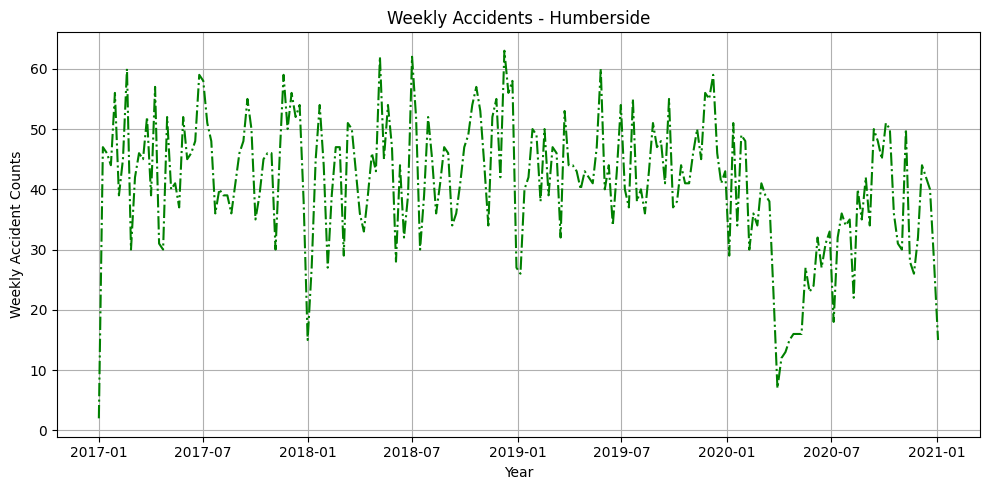

In [86]:
# plot the weekly accident counts 
plt.figure(figsize=(10, 5))
plt.plot(weekly_accidents, 'g-.')
plt.title(f"Weekly Accidents - Humberside")
plt.xlabel("Year")
plt.ylabel(f"Weekly Accident Counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# ADF Test
conduct_adf_test(weekly_accidents)

ADF Statistic: -2.302; p-value: 0.171


Strong negative value, indicating stationarity.
The p-value is not less than 0.05. Hence, we cannot reject the null hypothesis of non-stationarity.

In [88]:
# Applying differencing to for stationarity
diff_1 = weekly_accidents[['accident_count']].diff(1).dropna()
diff_1 

accident_count
date                      
2017-01-08            45.0
2017-01-15            -1.0
2017-01-22            -2.0
2017-01-29            12.0
2017-02-05           -17.0
...                    ...
2020-12-06            12.0
2020-12-13            -2.0
2020-12-20            -2.0
2020-12-27           -12.0
2021-01-03           -13.0

[209 rows x 1 columns]

In [89]:
# Testing the differenced series for stationarity
ADF_test = adfuller(diff_1)[:2]

print(f"ADF Statistic: {ADF_test[0]}; p-value {ADF_test[1]}")

ADF Statistic: -9.738017135382906; p-value 8.645134750436051e-17


The p-value is less than 0.05. Hence, we reject the null hypothesis of non-stationarity.

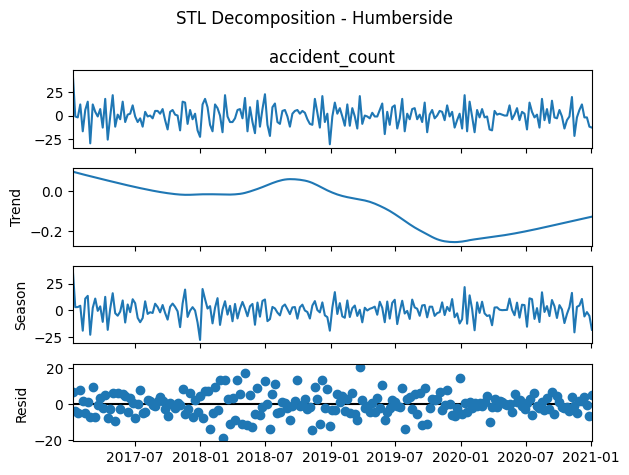

In [90]:
# Decomposition of the differenced series
plot_stl_decomposition(diff_1,'Humberside')

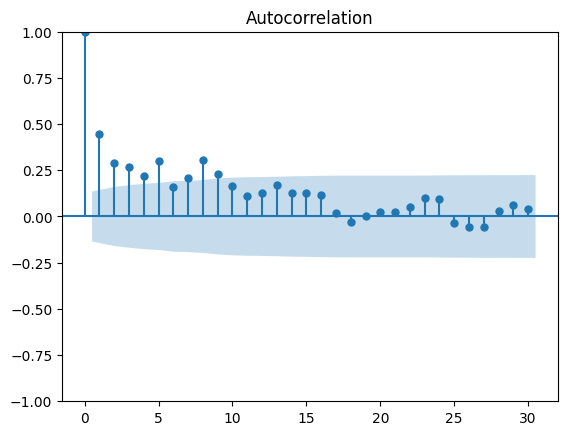

In [91]:

# Plot of ACF to understand the series 
# ACF/PACF
plot_acf(weekly_accidents['accident_count'], lags=30)
plt.show()
plot_pacf(weekly_accidents['accident_count'], lags=30)
plt.show()

#### The ACF plot shows an oscillating or wave-like pattern with high correlation (peaks) as seasonal lags. This shows that the data is periodic. The ACF values are also gradually decaying, this is a sign of non-stationarity. So, this timeseries is non-stationary and periodic.

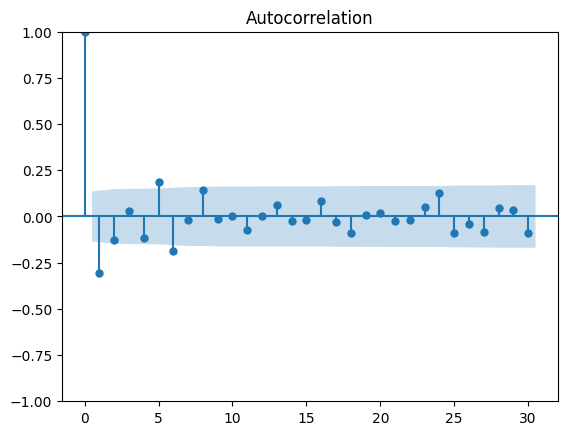

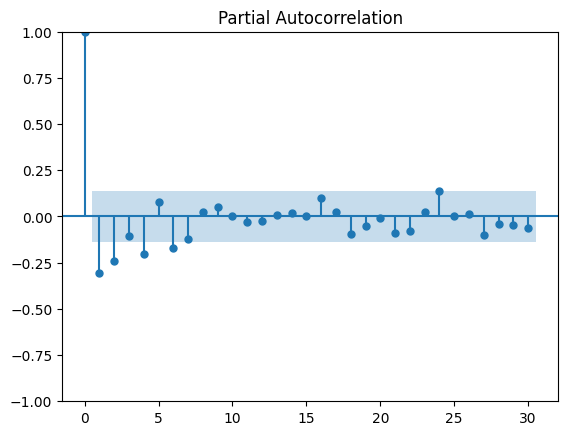

In [92]:
plot_acf(diff_1, lags=30)
plot_pacf(diff_1, lags=30)
plt.show()

###### The ACF plot for the differenced data shows a significant spike at lag 1 and then quickly falls within the confidence interval, indicating that there is no long-term autocorrelation after lag 1. This suggests that a low-order Moving Average (MA) term (q=1) may be appropriate.The PACF plot for the differenced data shows a strong spike at lag 1 followed by a rapid decline, with no significant spikes at higher lags. This indicates that a low-order Autoregressive (AR) term (p=1) is suitable. There is no strong evidence of seasonality present after differencing, as no repeated patterns or significant spikes are visible at seasonal lags in either ACF or PACF plots. Based on these observations, an ARIMA(1,1,1) model would be appropriate for modeling the series after first differencing.

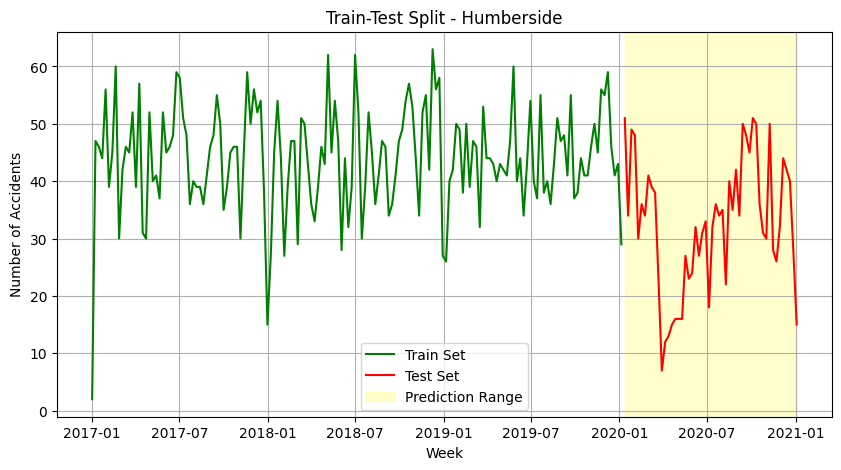

In [93]:
# Split train/test
train = weekly_accidents[:-52]
test = weekly_accidents[-52:]

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['accident_count'], 'g-', label='Train Set')
plt.plot(test.index, test['accident_count'], 'r-', label='Test Set')
plt.axvspan(test.index[0], test.index[-1], color='yellow', alpha=0.2, label='Prediction Range')
plt.title(f'Train-Test Split - Humberside')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

### MODEL BUILDING AND EVALUATION

### ARIMA MODEL

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         accident_count   No. Observations:                  158
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -571.069
Date:                Mon, 28 Apr 2025   AIC                           1148.139
Time:                        14:35:17   BIC                           1157.307
Sample:                    01-01-2017   HQIC                          1151.862
                         - 01-05-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1810      0.084      2.166      0.030       0.017       0.345
ma.L1         -0.9995      1.013     -0.987      0.324      -2.985       0.986
sigma2        82.0522     83.264      0.985      0.3

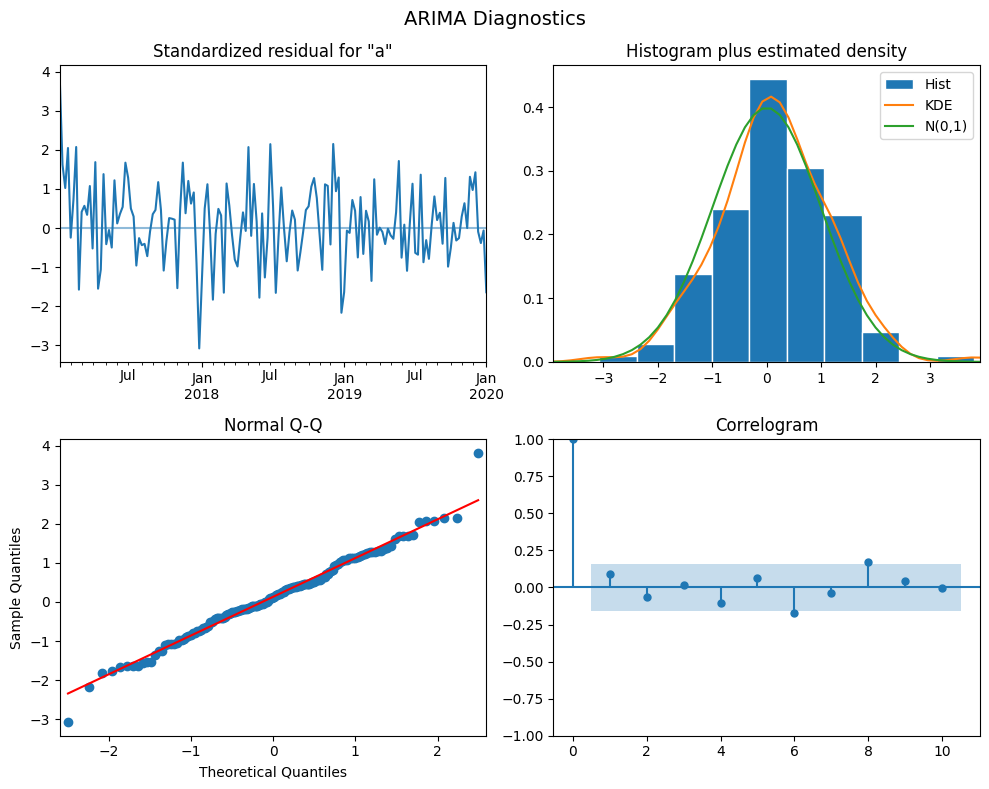

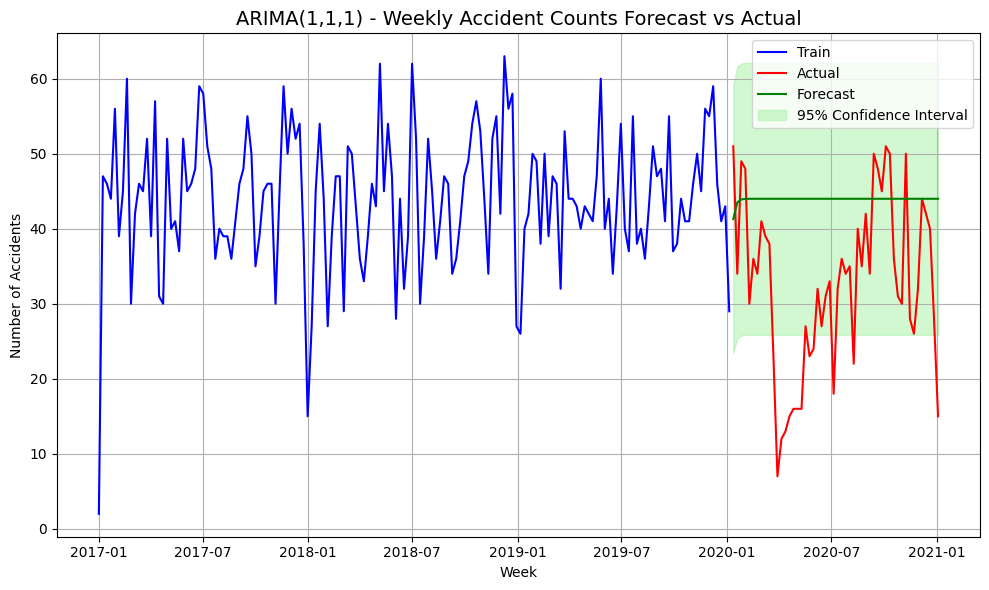

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\1190927651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arima_pred'] = arima_pred


In [94]:

# Fit ARIMA
# From both the PACF and ACF plots, an ARIMA(1, 1, 1) model is suggested.
# Fitting the ARIMA model based on the order (1,1,1)
forecast, mean, conf_int = fit_arima_model(train,test,order=(1,1,1))
arima_pred = mean.values
test['arima_pred'] = arima_pred

In [95]:
arima_pred

array([41.28279934, 43.50554192, 43.90777796, 43.98056814, 43.99374053,
       43.99612426, 43.99655563, 43.99663369, 43.99664781, 43.99665037,
       43.99665083, 43.99665092, 43.99665093, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094, 43.99665094, 43.99665094, 43.99665094,
       43.99665094, 43.99665094])

In [96]:
naive_pred = train['accident_count'][len(train)-52:len(train)].values

test['naive_pred'] = naive_pred

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\4141499593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_pred'] = naive_pred


In [97]:
naive_pred

array([40, 42, 50, 49, 38, 50, 39, 47, 46, 32, 53, 44, 44, 43, 40, 43, 42,
       41, 47, 60, 40, 44, 34, 43, 54, 40, 37, 55, 38, 40, 36, 43, 51, 47,
       48, 41, 55, 37, 38, 44, 41, 41, 46, 50, 45, 56, 55, 59, 46, 41, 43,
       29], dtype=int64)

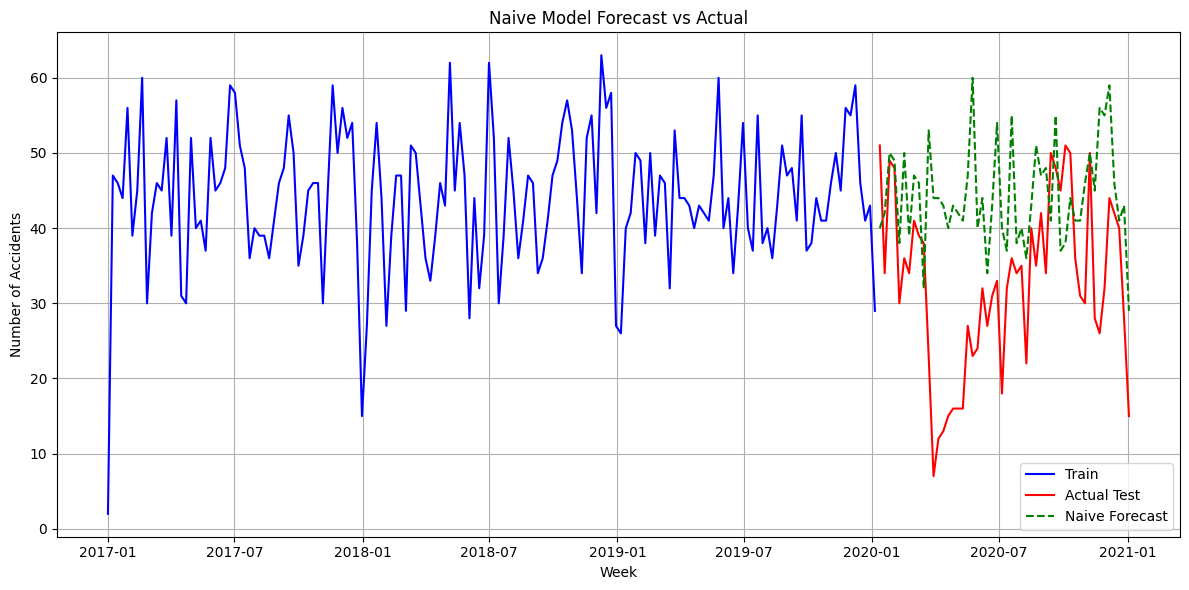

In [98]:
plt.figure(figsize=(12,6))

plt.plot(train.index, train['accident_count'], label='Train', color='blue')
plt.plot(test.index, test['accident_count'], label='Actual Test', color='red')
plt.plot(test.index, test['naive_pred'], label='Naive Forecast', color='green', linestyle='--')

plt.title('Naive Model Forecast vs Actual')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#### Fit a SARIMA Model

In [99]:
from itertools import product

# find the best order p,q,d
best_order = find_best_order(train)


C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequen

<Figure size 1000x600 with 0 Axes>

In [100]:
best_order

(4, 1, 4)

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                       accident_count   No. Observations:                  158
Model:             SARIMAX(4, 1, 4)x(1, 0, [1], 52)   Log Likelihood                -557.449
Date:                              Mon, 28 Apr 2025   AIC                           1136.898
Time:                                      14:35:25   BIC                           1170.516
Sample:                                  01-01-2017   HQIC                          1150.551
                                       - 01-05-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3453      0.376     -3.576      0.000      -2.083      -0.608
ar.L2         -1.03

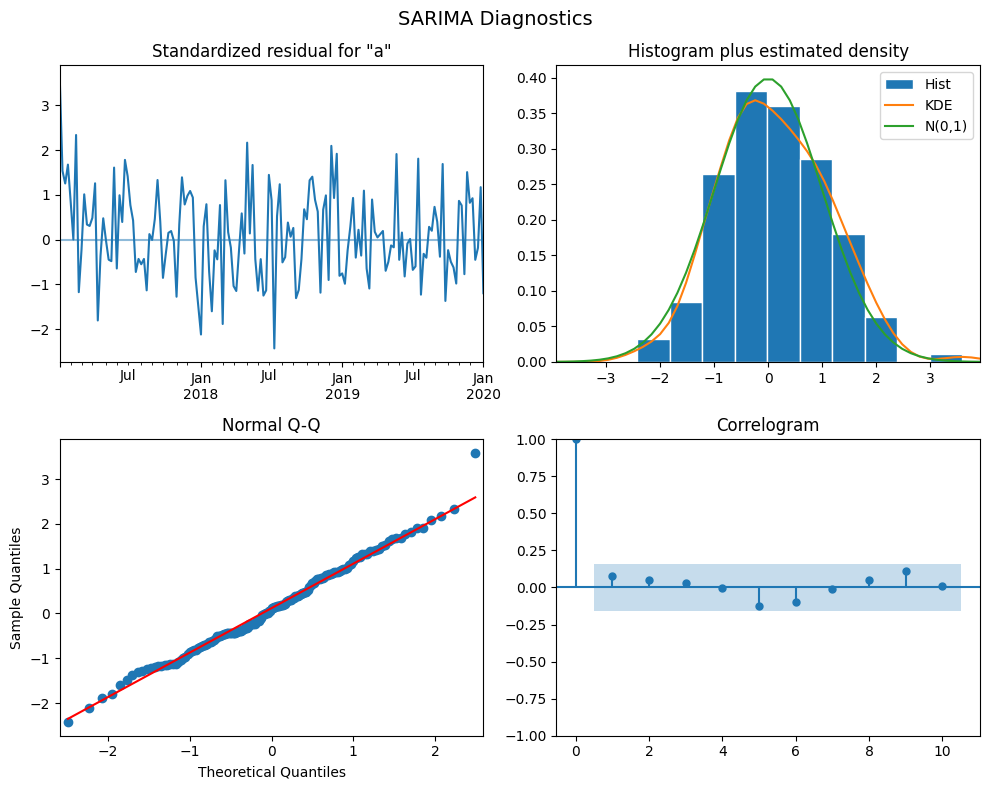

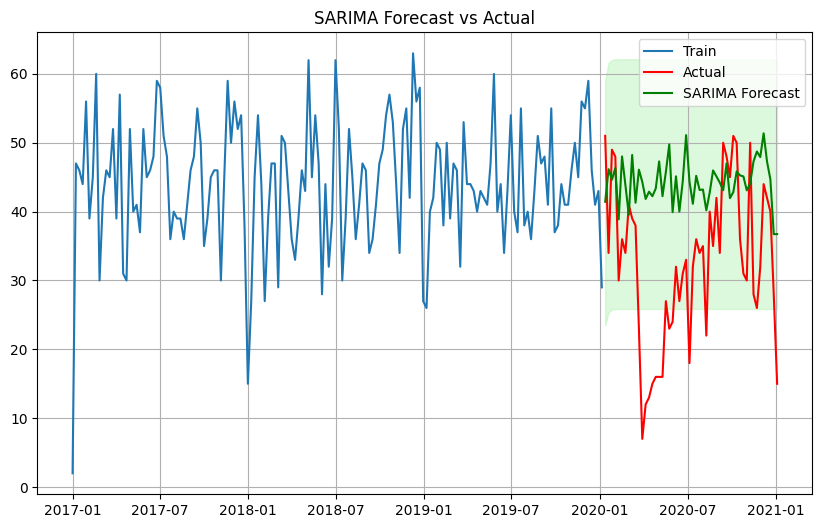

In [101]:
sarima_forecast,sarima_mean,sarima_conf_int = fit_sarima_model(train,best_order,test)

In [102]:

test['sarima_pred'] = sarima_mean
sarima_mean

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\3132475591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sarima_pred'] = sarima_mean


2020-01-12    41.431642
2020-01-19    46.164298
2020-01-26    44.629580
2020-02-02    46.339797
2020-02-09    38.874719
2020-02-16    48.020442
2020-02-23    43.844343
2020-03-01    39.535110
2020-03-08    48.230597
2020-03-15    41.291276
2020-03-22    46.095674
2020-03-29    44.325730
2020-04-05    41.842941
2020-04-12    42.895572
2020-04-19    42.238341
2020-04-26    43.365873
2020-05-03    47.289545
2020-05-10    42.243163
2020-05-17    45.771385
2020-05-24    49.760966
2020-05-31    39.925617
2020-06-07    45.129944
2020-06-14    40.001244
2020-06-21    44.380470
2020-06-28    51.114325
2020-07-05    44.383974
2020-07-12    41.138866
2020-07-19    45.205282
2020-07-26    43.152944
2020-08-02    43.206244
2020-08-09    40.185412
2020-08-16    42.771802
2020-08-23    45.985692
2020-08-30    45.117894
2020-09-06    44.215441
2020-09-13    43.103039
2020-09-20    46.997345
2020-09-27    41.963673
2020-10-04    42.823376
2020-10-11    45.842001
2020-10-18    45.263160
2020-10-25    45

In [103]:
def plot_forecast_comparison(train, test, arima_forecast, sarima_forecast, naive_forecast):
    plt.figure(figsize=(12, 6))
    
    # Plot training data
    plt.plot(train.index, train['accident_count'], label='Train', color='blue')
    
    # Plot actual test data
    plt.plot(test.index, test['accident_count'], label='Actual Test', color='black')
    
    # Plot ARIMA forecast
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
    
    # Plot SARIMA forecast
    plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
    
    # Plot Naive forecast
    plt.plot(test.index, naive_forecast, label='Naive Forecast', color='red', linestyle='--')
    
    plt.title('Forecast Comparison for humberside: ARIMA vs SARIMA vs Naive', fontsize=14)
    plt.xlabel('Week')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


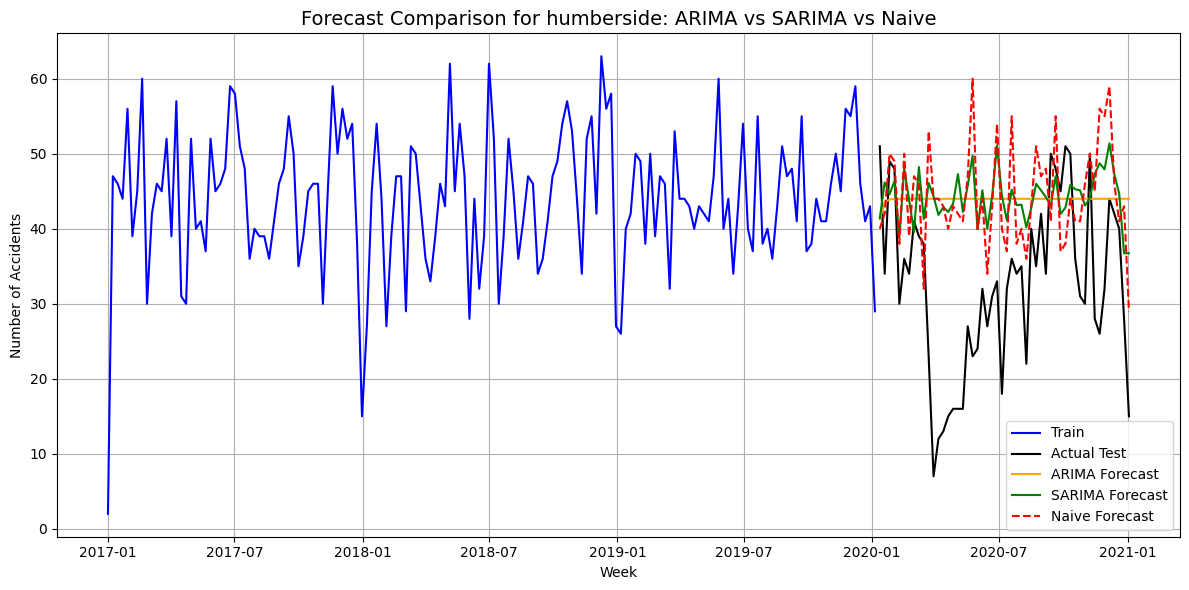

In [104]:
plot_forecast_comparison(
    train, 
    test, 
    test['arima_pred'], 
    sarima_mean, 
    test['naive_pred']
)


### MODEL COMPARISON


ARIMA Model:
RMSE : 16.22
MAE  : 13.33
MAPE : 67.03%
R²   : -1.03

SARIMA Model:
RMSE : 16.25
MAE  : 13.51
MAPE : 66.64%
R²   : -1.03

Naive Model:
RMSE : 16.98
MAE  : 13.92
MAPE : 66.75%
R²   : -1.22


C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

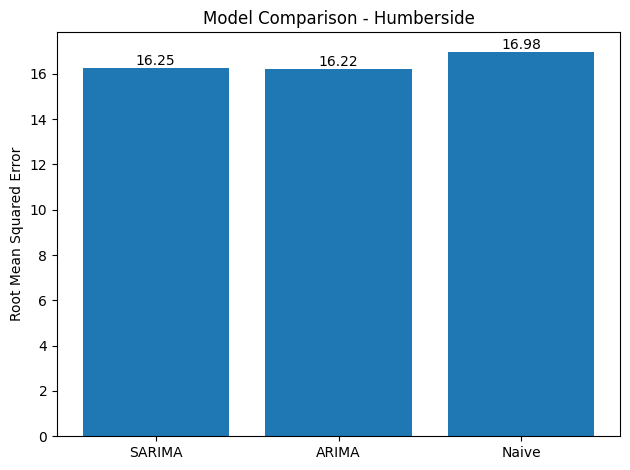

In [105]:

# Compare RMSE
sarima_mse = mean_squared_error(test['accident_count'], test['sarima_pred'], squared=False)
arima_mse = mean_squared_error(test['accident_count'], test['arima_pred'], squared=False)
naive_mse = mean_squared_error(test['accident_count'], test['naive_pred'], squared=False)

calculate_metrics_for_models(test)
# RMSE Plot
list_mse = [sarima_mse, arima_mse, naive_mse]
models = ['SARIMA', 'ARIMA', 'Naive']
plt.bar(models, list_mse)
plt.ylabel('Root Mean Squared Error')
plt.title(f'Model Comparison - Humberside')
for i, val in enumerate(list_mse):
    plt.text(i, val, f"{val:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

### South Yorkshire Weekly Accident Time Series Forecast Modeling using Sarima, Arima and Naive (baseline model)

In [106]:

df_s_yorkshire = df[df['police_force']==14].copy()
df_s_yorkshire

police_force        date
4370             14  02/01/2017
4371             14  06/01/2017
4372             14  08/01/2017
4373             14  07/01/2017
4374             14  11/01/2017
...             ...         ...
31486            14  23/09/2020
31487            14  30/01/2020
31488            14  19/10/2020
31489            14  22/08/2020
31490            14  25/08/2020

[9661 rows x 2 columns]

In [107]:
weekly_accidents=preprocess_data(df_s_yorkshire)
weekly_accidents


accident_count
date                      
2017-01-01               4
2017-01-08              49
2017-01-15              80
2017-01-22              47
2017-01-29              72
...                    ...
2020-12-06              52
2020-12-13              48
2020-12-20              47
2020-12-27              45
2021-01-03              16

[210 rows x 1 columns]

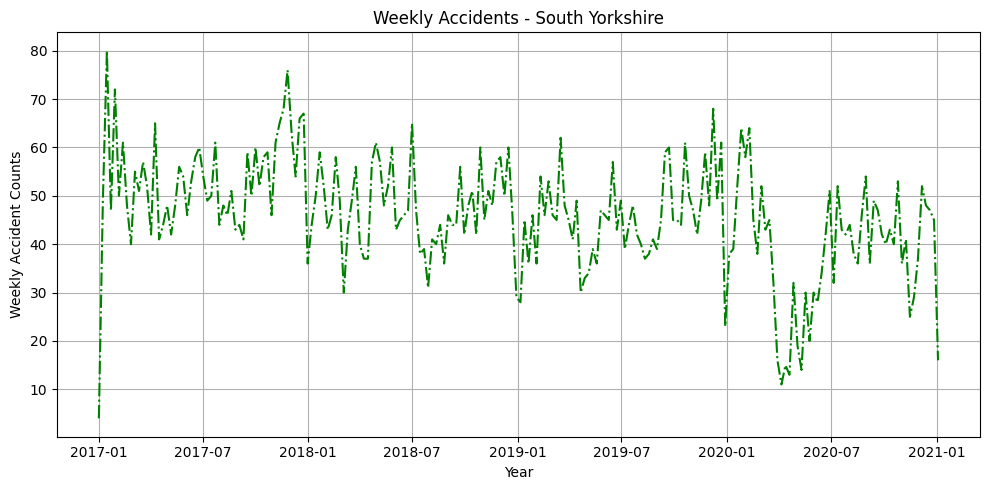

In [108]:

# plot the weekly accident counts 
plt.figure(figsize=(10, 5))
plt.plot(weekly_accidents, 'g-.')
plt.title(f"Weekly Accidents - South Yorkshire")
plt.xlabel("Year")
plt.ylabel(f"Weekly Accident Counts")
plt.grid(True)
plt.tight_layout()
plt.show()

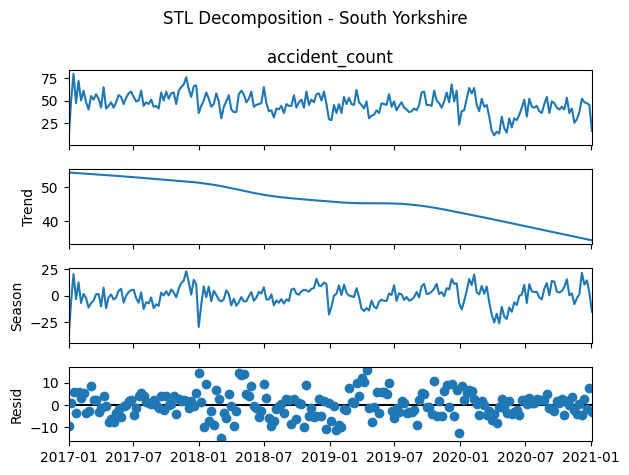

In [109]:
# 6. Seasonal Decomposition using STL
# STL decomposition
plot_stl_decomposition(weekly_accidents,'South Yorkshire')


In [110]:
# ADF Test
conduct_adf_test(weekly_accidents)

ADF Statistic: -3.377; p-value: 0.012


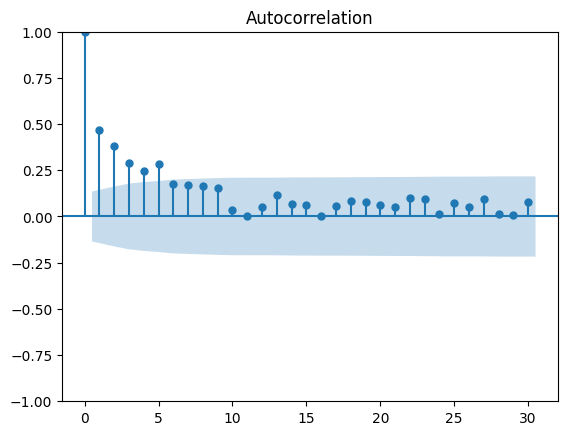

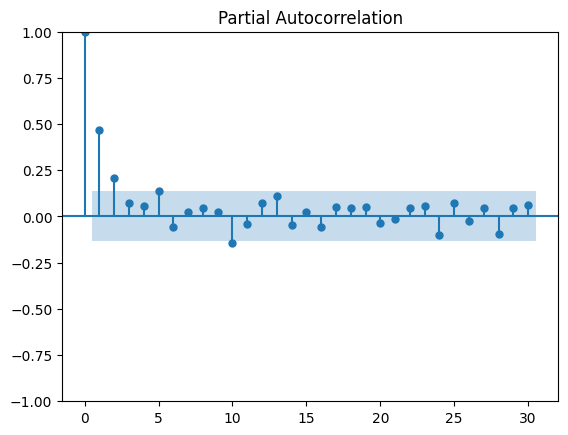

In [111]:
# ACF/PACF
plot_acf(weekly_accidents['accident_count'], lags=30)
plt.show()
plot_pacf(weekly_accidents['accident_count'], lags=30)
plt.show()

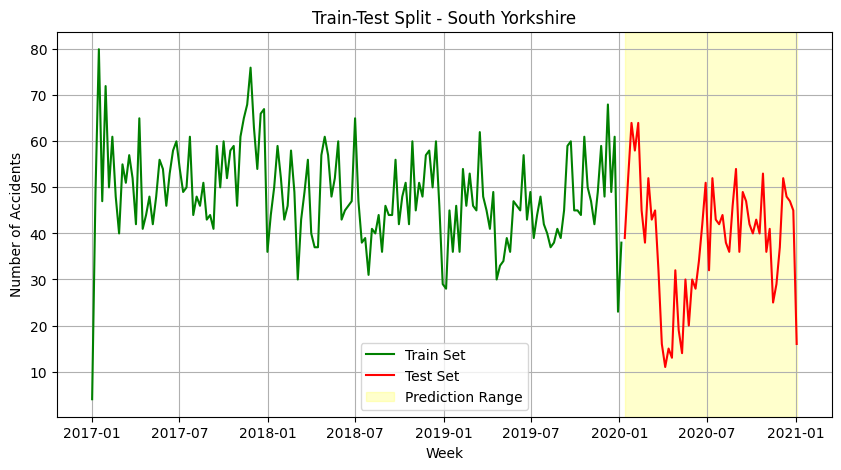

In [112]:
# Split train/test
train = weekly_accidents[:-52]
test = weekly_accidents[-52:]

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['accident_count'], 'g-', label='Train Set')
plt.plot(test.index, test['accident_count'], 'r-', label='Test Set')
plt.axvspan(test.index[0], test.index[-1], color='yellow', alpha=0.2, label='Prediction Range')
plt.title(f'Train-Test Split - South Yorkshire')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

### MODEL BUILDING AND EBVALUATION

## ARIMA

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         accident_count   No. Observations:                  158
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -591.580
Date:                Mon, 28 Apr 2025   AIC                           1189.160
Time:                        14:35:27   BIC                           1198.348
Sample:                    01-01-2017   HQIC                          1192.892
                         - 01-05-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.000   2568.115      0.000       0.999       1.001
ma.L1         -0.9079      0.035    -25.701      0.000      -0.977      -0.839
sigma2       101.4477      8.955     11.329      0.0

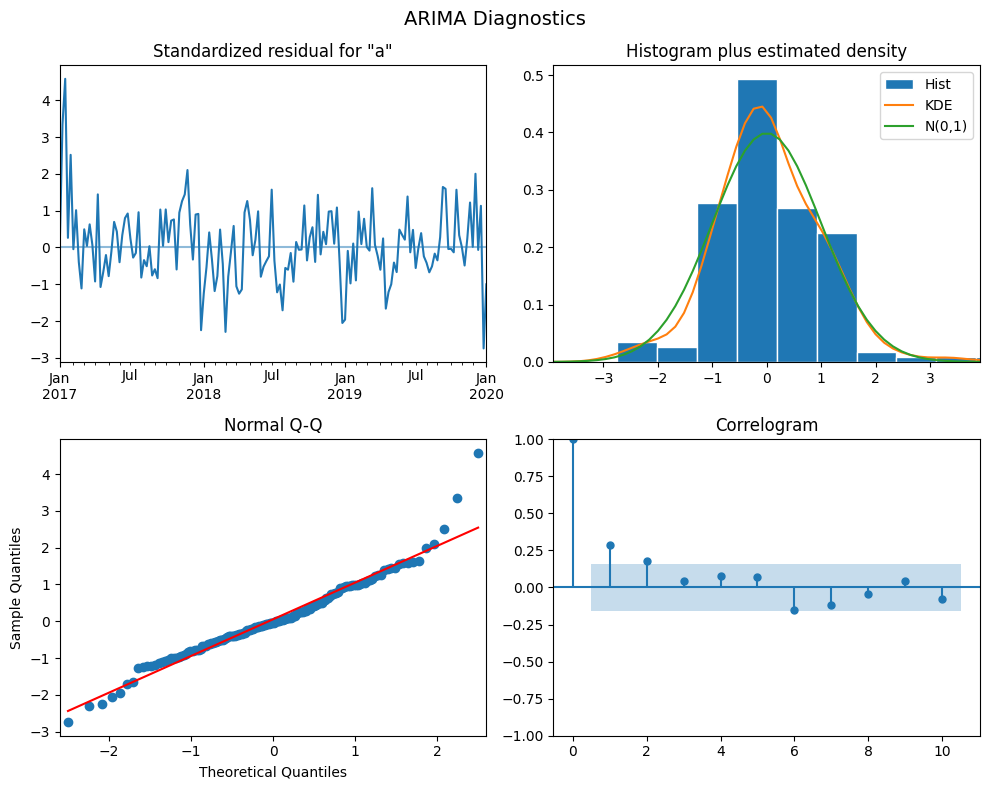

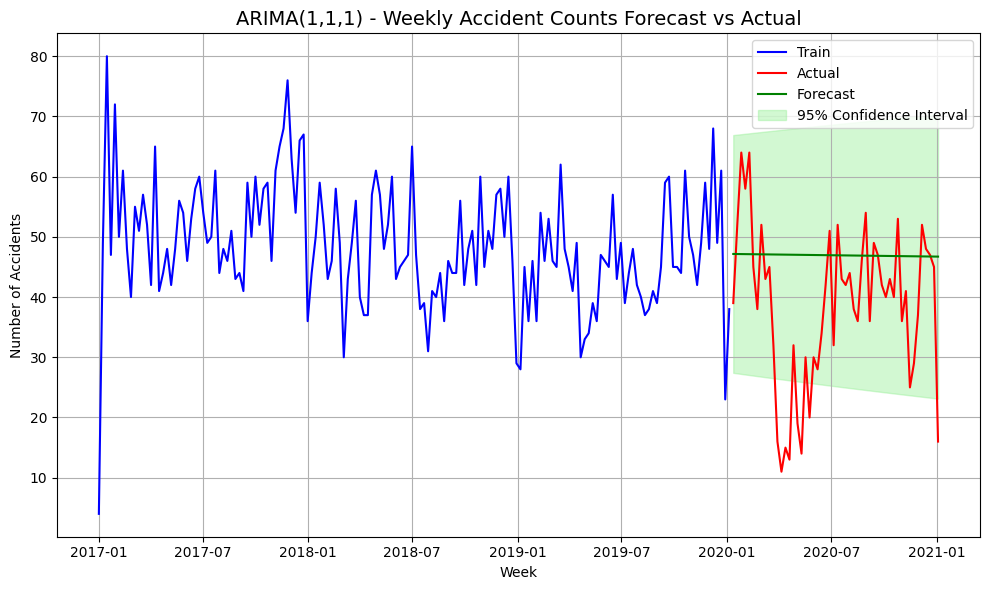

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\2061907070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arima_pred'] = arima_pred


In [113]:
# Fit ARIMA
forecast, mean, conf_int = fit_arima_model(train,test,(1,0,1))
arima_pred = mean.values
test['arima_pred'] = arima_pred

In [114]:
arima_pred

array([47.15844389, 47.14981925, 47.14119619, 47.1325747 , 47.12395479,
       47.11533646, 47.1067197 , 47.09810452, 47.08949092, 47.08087889,
       47.07226843, 47.06365955, 47.05505224, 47.04644651, 47.03784235,
       47.02923977, 47.02063876, 47.01203932, 47.00344146, 46.99484516,
       46.98625044, 46.97765729, 46.96906572, 46.96047571, 46.95188727,
       46.94330041, 46.93471512, 46.92613139, 46.91754924, 46.90896865,
       46.90038964, 46.89181219, 46.88323632, 46.87466201, 46.86608927,
       46.85751809, 46.84894849, 46.84038045, 46.83181398, 46.82324907,
       46.81468573, 46.80612396, 46.79756376, 46.78900512, 46.78044804,
       46.77189253, 46.76333858, 46.7547862 , 46.74623539, 46.73768613,
       46.72913844, 46.72059232])

## NAIVE MODEL

In [115]:
naive_pred = train['accident_count'][len(train)-52:len(train)].values

test['naive_pred'] = naive_pred

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\4141499593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_pred'] = naive_pred


In [116]:
naive_pred

array([45, 36, 46, 36, 54, 46, 53, 46, 45, 62, 48, 45, 41, 49, 30, 33, 34,
       39, 36, 47, 46, 45, 57, 43, 49, 39, 44, 48, 42, 40, 37, 38, 41, 39,
       45, 59, 60, 45, 45, 44, 61, 50, 47, 42, 49, 59, 48, 68, 49, 61, 23,
       38], dtype=int64)

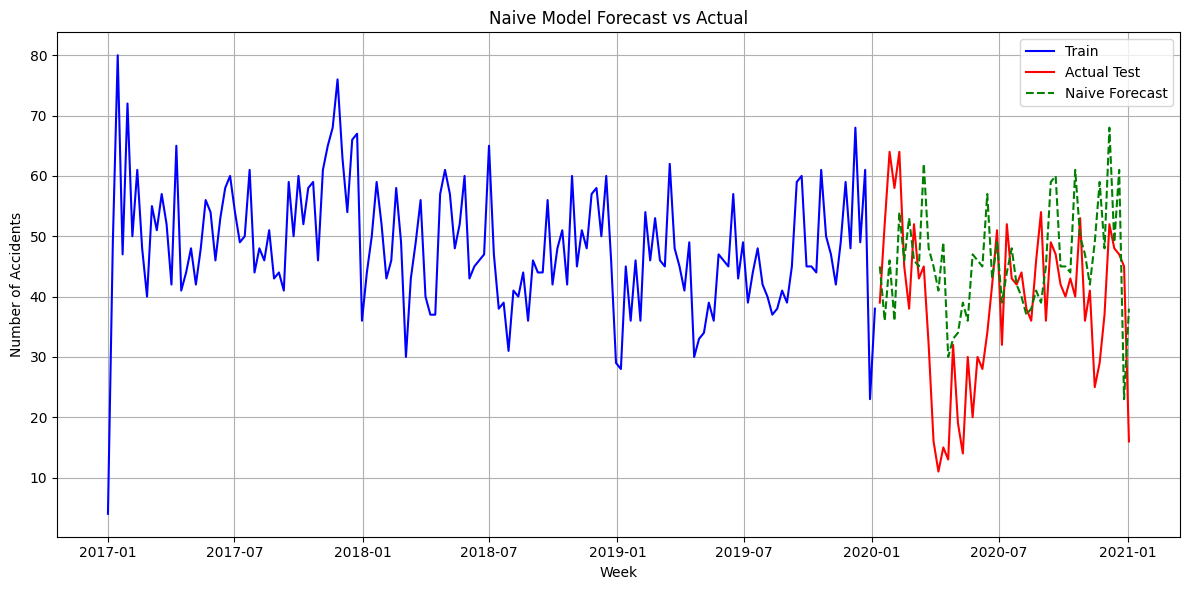

In [117]:
plt.figure(figsize=(12,6))

plt.plot(train.index, train['accident_count'], label='Train', color='blue')
plt.plot(test.index, test['accident_count'], label='Actual Test', color='red')
plt.plot(test.index, test['naive_pred'], label='Naive Forecast', color='green', linestyle='--')

plt.title('Naive Model Forecast vs Actual')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### SARIMA 

In [118]:
# find the best order p,q,d
best_order = find_best_order(train)

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequen

<Figure size 1000x600 with 0 Axes>

In [119]:
best_order

(2, 1, 3)

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                       accident_count   No. Observations:                  158
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 52)   Log Likelihood                -571.084
Date:                              Mon, 28 Apr 2025   AIC                           1158.168
Time:                                      14:35:34   BIC                           1182.618
Sample:                                  01-01-2017   HQIC                          1168.098
                                       - 01-05-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1461      0.054     -2.717      0.007      -0.251      -0.041
ar.L2         -0.83

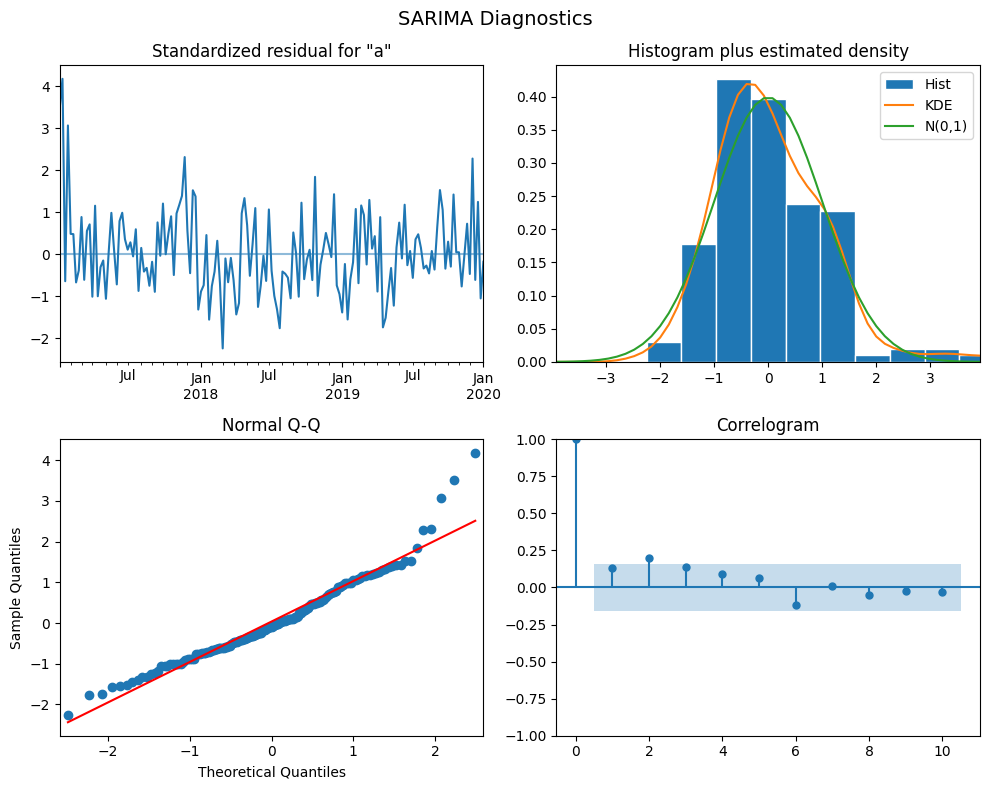

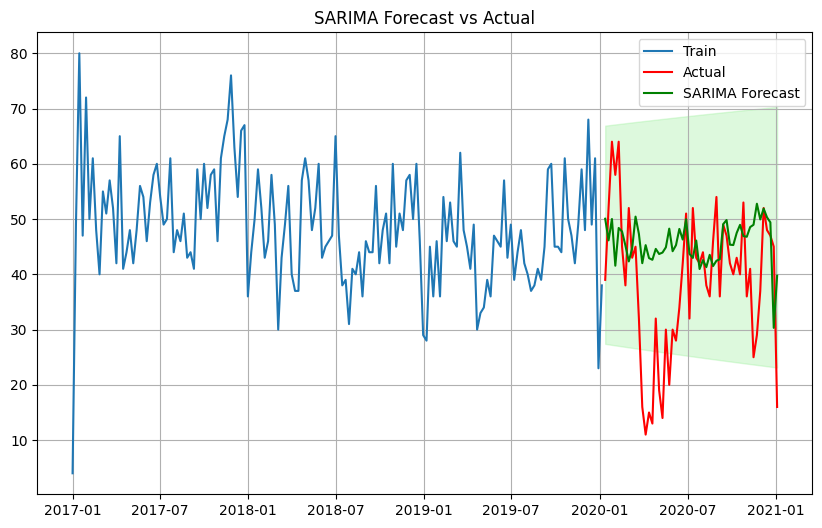

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\3720913403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sarima_pred'] = sarima_mean


In [120]:
sarima_forecast,sarima_mean,sarima_conf_int = fit_sarima_model(train,best_order,test)
test['sarima_pred'] = sarima_mean

In [121]:
sarima_mean

2020-01-12    50.057509
2020-01-19    46.151016
2020-01-26    50.010766
2020-02-02    41.560402
2020-02-09    48.390569
2020-02-16    47.745493
2020-02-23    45.199640
2020-03-01    42.337544
2020-03-08    44.699804
2020-03-15    50.441681
2020-03-22    47.304684
2020-03-29    42.019217
2020-04-05    45.284034
2020-04-12    42.934353
2020-04-19    42.630499
2020-04-26    44.603101
2020-05-03    43.677859
2020-05-10    43.939835
2020-05-17    44.886961
2020-05-24    48.262313
2020-05-31    44.181550
2020-06-07    45.275661
2020-06-14    48.214955
2020-06-21    46.296032
2020-06-28    49.966513
2020-07-05    43.709657
2020-07-12    42.968368
2020-07-19    46.112781
2020-07-26    40.962461
2020-08-02    42.571763
2020-08-09    41.300958
2020-08-16    43.529605
2020-08-23    41.492046
2020-08-30    42.458189
2020-09-06    42.724660
2020-09-13    49.073004
2020-09-20    49.828126
2020-09-27    45.362598
2020-10-04    45.300770
2020-10-11    47.480845
2020-10-18    48.951626
2020-10-25    46

In [122]:
def plot_forecast_comparison(train, test, arima_forecast, sarima_forecast, naive_forecast):
    plt.figure(figsize=(12, 6))
    
    # Plot training data
    plt.plot(train.index, train['accident_count'], label='Train', color='blue')
    
    # Plot actual test data
    plt.plot(test.index, test['accident_count'], label='Actual Test', color='black')
    
    # Plot ARIMA forecast
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
    
    # Plot SARIMA forecast
    plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
    
    # Plot Naive forecast
    plt.plot(test.index, naive_forecast, label='Naive Forecast', color='red', linestyle='--')
    
    plt.title('Forecast Comparison for southyorkshire: ARIMA vs SARIMA vs Naive', fontsize=14)
    plt.xlabel('Week')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


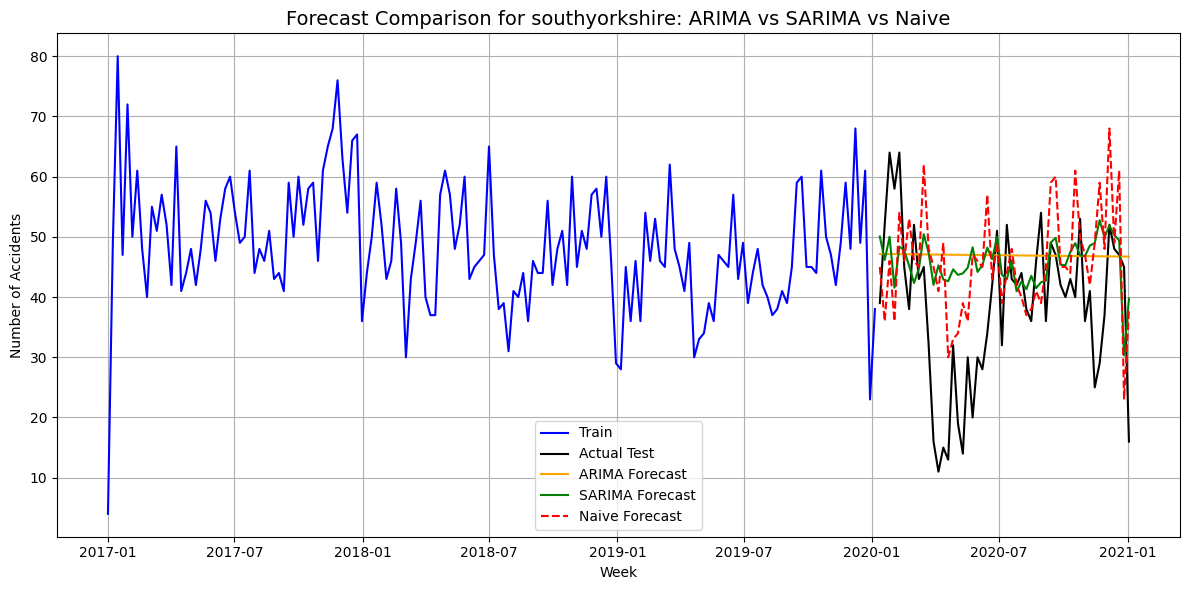

In [123]:
plot_forecast_comparison(
    train, 
    test, 
    test['arima_pred'], 
    sarima_mean, 
    test['naive_pred']
)



ARIMA Model:
RMSE : 15.45
MAE  : 11.78
MAPE : 51.62%
R²   : -0.43

SARIMA Model:
RMSE : 14.65
MAE  : 11.49
MAPE : 48.42%
R²   : -0.29

Naive Model:
RMSE : 15.36
MAE  : 12.23
MAPE : 47.26%
R²   : -0.42


C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

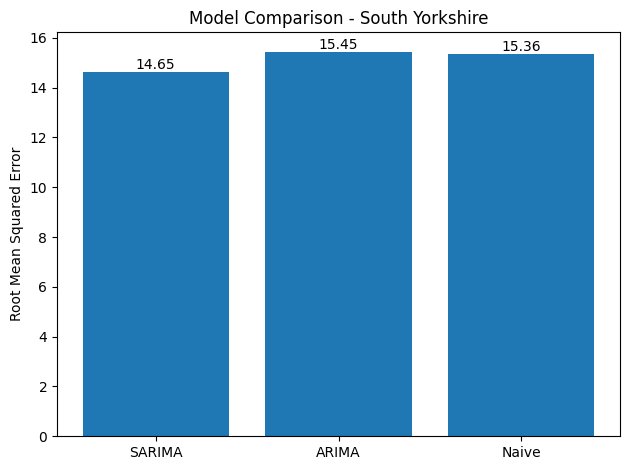

In [124]:

# Compare RMSE
sarima_mse = mean_squared_error(test['accident_count'], test['sarima_pred'], squared=False)
arima_mse = mean_squared_error(test['accident_count'], test['arima_pred'], squared=False)
naive_mse = mean_squared_error(test['accident_count'], test['naive_pred'], squared=False)

calculate_metrics_for_models(test)
# RMSE Plot
list_mse = [sarima_mse, arima_mse, naive_mse]
models = ['SARIMA', 'ARIMA', 'Naive']
plt.bar(models, list_mse)
plt.ylabel('Root Mean Squared Error')
plt.title(f'Model Comparison - South Yorkshire')
for i, val in enumerate(list_mse):
    plt.text(i, val, f"{val:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


### West Yorkshire Weekly Accident Time Series Forecast Modeling using Sarima, Arima and Naive (baseline model)

In [125]:
df_w_yorkshire = df[df['police_force']==13].copy()
df_w_yorkshire


police_force        date
0                13  19/05/2017
1                13  13/03/2017
2                13  17/03/2017
3                13  14/01/2017
4                13  01/01/2017
...             ...         ...
29465            13  31/12/2020
29466            13  31/12/2020
29467            13  31/12/2020
29468            13  31/12/2020
29469            13  31/12/2020

[14886 rows x 2 columns]

In [126]:
weekly_accidents=preprocess_data(df_w_yorkshire)
weekly_accidents


accident_count
date                      
2017-01-01               7
2017-01-08              69
2017-01-15              83
2017-01-22              91
2017-01-29              87
...                    ...
2020-12-06              61
2020-12-13              54
2020-12-20              67
2020-12-27              32
2021-01-03              17

[210 rows x 1 columns]

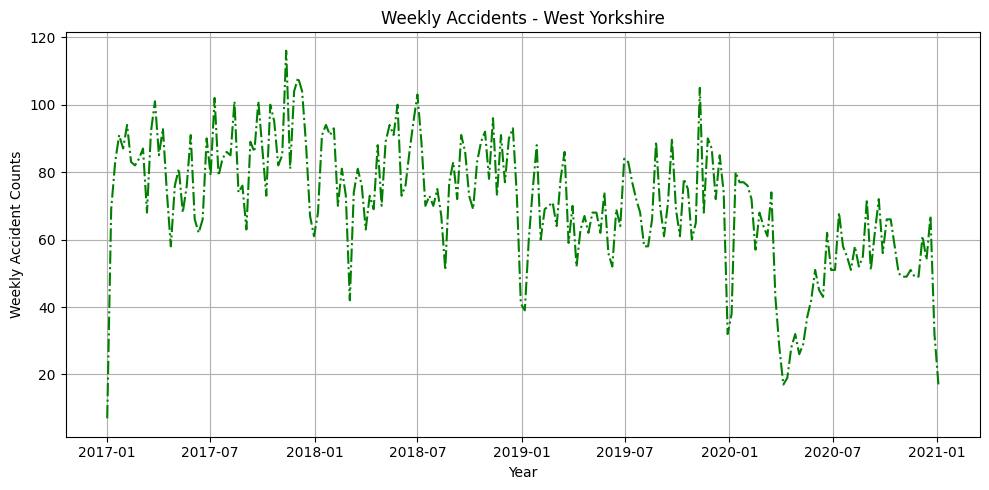

In [127]:
# plot the weekly accident counts 
plt.figure(figsize=(10, 5))
plt.plot(weekly_accidents, 'g-.')
plt.title(f"Weekly Accidents - West Yorkshire")
plt.xlabel("Year")
plt.ylabel(f"Weekly Accident Counts")
plt.grid(True)
plt.tight_layout()
plt.show()

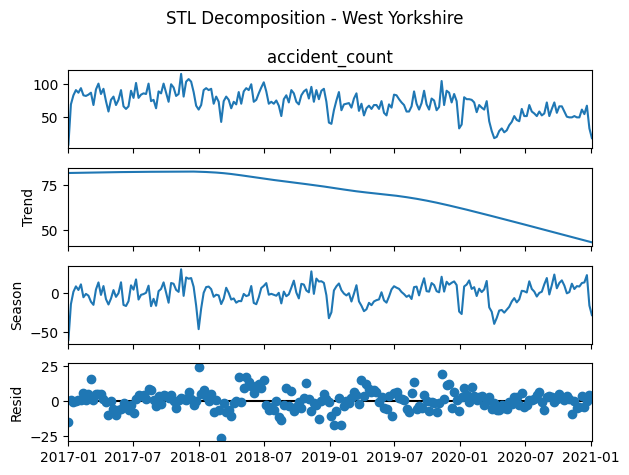

In [128]:
# STL decomposition
plot_stl_decomposition(weekly_accidents,'West Yorkshire')

In [129]:
# ADF Test
conduct_adf_test(weekly_accidents)

ADF Statistic: -2.159; p-value: 0.222


In [130]:
# Applying differencing to for stationarity
diff_1 = weekly_accidents[['accident_count']].diff(1).dropna()
diff_1 

accident_count
date                      
2017-01-08            62.0
2017-01-15            14.0
2017-01-22             8.0
2017-01-29            -4.0
2017-02-05             7.0
...                    ...
2020-12-06            12.0
2020-12-13            -7.0
2020-12-20            13.0
2020-12-27           -35.0
2021-01-03           -15.0

[209 rows x 1 columns]

In [131]:
# ADF Test
conduct_adf_test(diff_1)

ADF Statistic: -5.022; p-value: 0.000


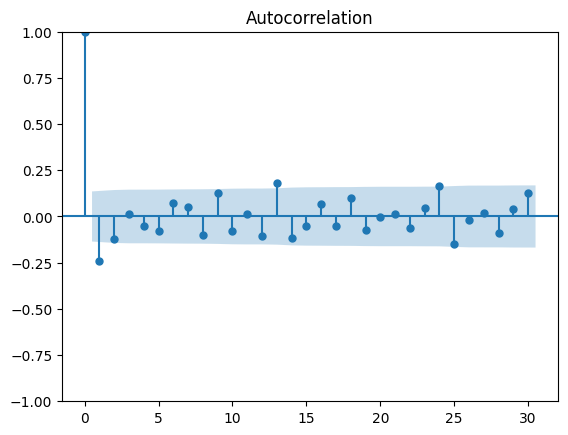

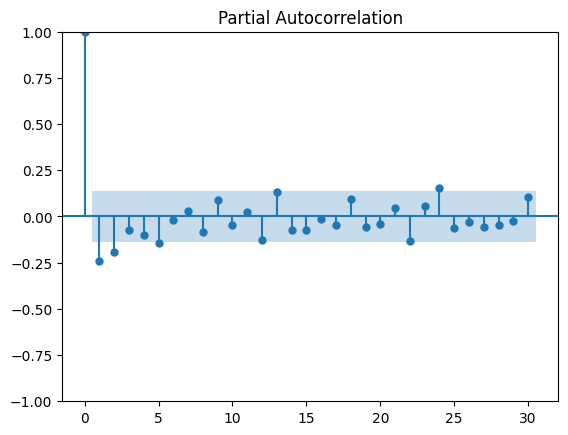

In [132]:
# ACF/PACF
plot_acf(diff_1['accident_count'], lags=30)
plt.show()
plot_pacf(diff_1['accident_count'], lags=30)
plt.show()
# Show the plot
plt.show()

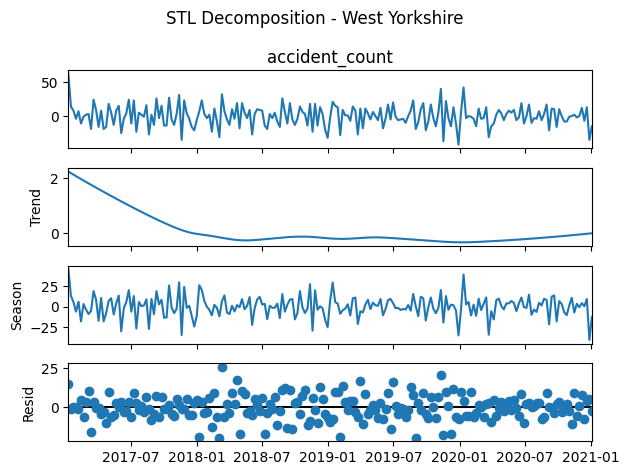

In [133]:
# Decomposition of the differenced series
plot_stl_decomposition(diff_1,'West Yorkshire')

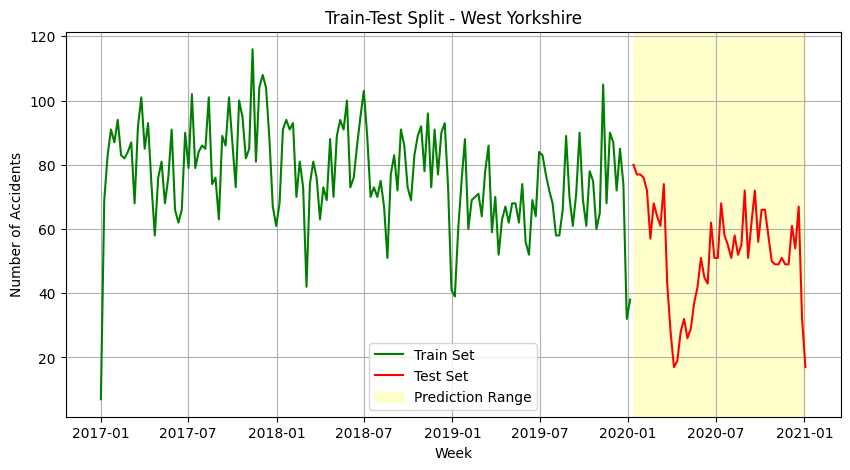

In [134]:
# Split train/test
train = weekly_accidents[:-52]
test = weekly_accidents[-52:]

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['accident_count'], 'g-', label='Train Set')
plt.plot(test.index, test['accident_count'], 'r-', label='Test Set')
plt.axvspan(test.index[0], test.index[-1], color='yellow', alpha=0.2, label='Prediction Range')
plt.title(f'Train-Test Split - West Yorkshire')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

## ARIMA

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         accident_count   No. Observations:                  158
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -639.885
Date:                Mon, 28 Apr 2025   AIC                           1285.771
Time:                        14:35:36   BIC                           1294.939
Sample:                    01-01-2017   HQIC                          1289.494
                         - 01-05-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3931      0.082      4.792      0.000       0.232       0.554
ma.L1         -0.9581      0.036    -26.867      0.000      -1.028      -0.888
sigma2       200.8465     19.211     10.455      0.0

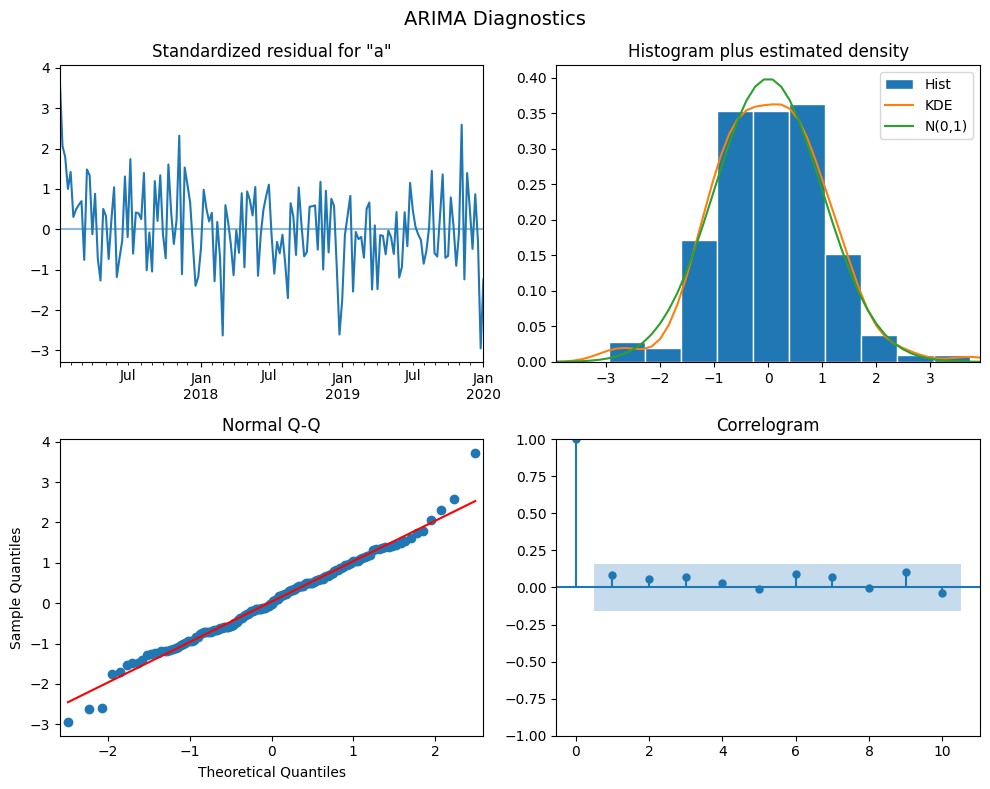

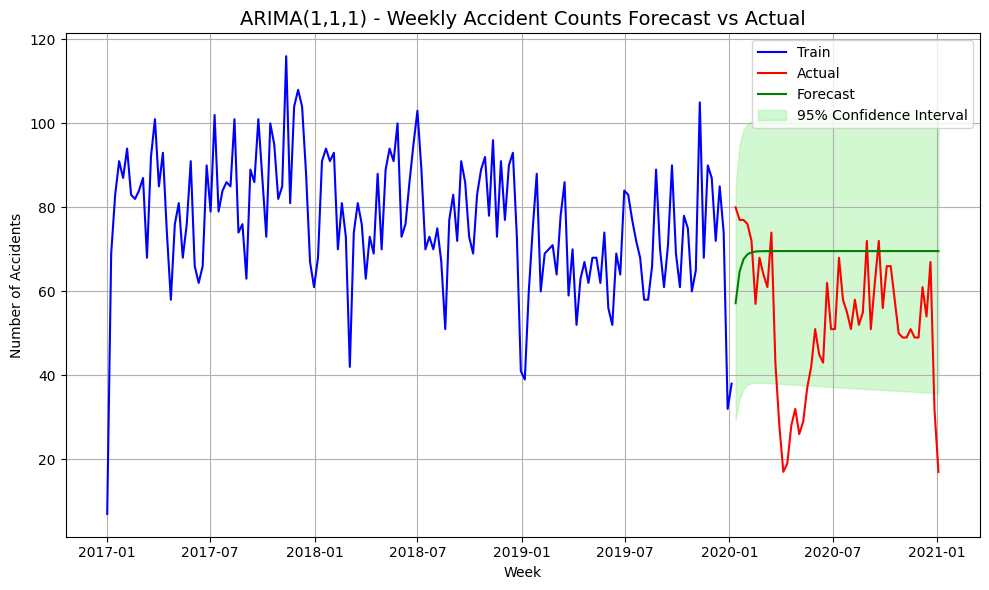

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\51974397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arima_pred'] = arima_pred


In [135]:

# Fit ARIMA
forecast, mean, conf_int = fit_arima_model(train,test,order=(1,1,1))
arima_pred = mean.values
test['arima_pred'] = arima_pred

In [136]:
arima_pred

array([57.17092341, 64.70631863, 67.6682094 , 68.83242132, 69.29003083,
       69.46990054, 69.54060081, 69.56839052, 69.57931365, 69.58360714,
       69.58529475, 69.58595809, 69.58621883, 69.58632131, 69.58636159,
       69.58637743, 69.58638365, 69.5863861 , 69.58638706, 69.58638744,
       69.58638759, 69.58638764, 69.58638767, 69.58638768, 69.58638768,
       69.58638768, 69.58638768, 69.58638768, 69.58638768, 69.58638768,
       69.58638768, 69.58638768, 69.58638768, 69.58638768, 69.58638768,
       69.58638768, 69.58638768, 69.58638768, 69.58638768, 69.58638768,
       69.58638768, 69.58638768, 69.58638768, 69.58638768, 69.58638768,
       69.58638768, 69.58638768, 69.58638768, 69.58638768, 69.58638768,
       69.58638768, 69.58638768])

## NAIVE MODEL

In [137]:
naive_pred = train['accident_count'][len(train)-52:len(train)].values

test['naive_pred'] = naive_pred

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\4141499593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_pred'] = naive_pred


In [138]:
naive_pred

array([ 60,  75,  88,  60,  69,  70,  71,  64,  78,  86,  59,  70,  52,
        63,  67,  62,  68,  68,  62,  74,  56,  52,  69,  64,  84,  83,
        77,  72,  68,  58,  58,  66,  89,  70,  61,  71,  90,  69,  61,
        78,  75,  60,  65, 105,  68,  90,  87,  72,  85,  74,  32,  38],
      dtype=int64)

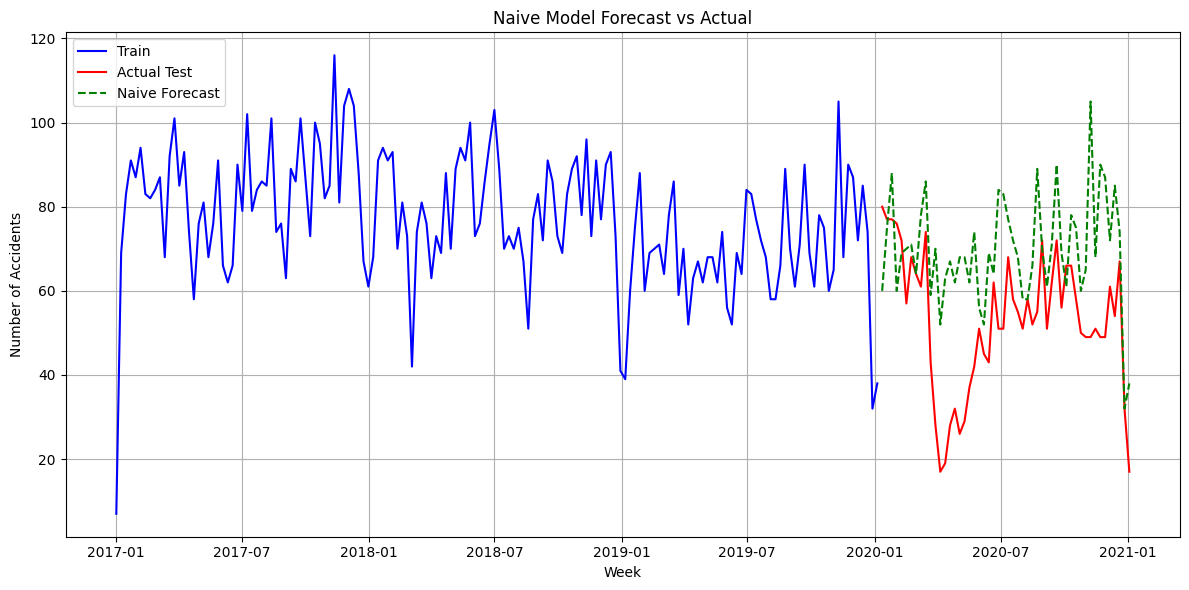

In [139]:
plt.figure(figsize=(12,6))

plt.plot(train.index, train['accident_count'], label='Train', color='blue')
plt.plot(test.index, test['accident_count'], label='Actual Test', color='red')
plt.plot(test.index, test['naive_pred'], label='Naive Forecast', color='green', linestyle='--')

plt.title('Naive Model Forecast vs Actual')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## SARIMA

In [140]:
# find the best order p,q,d
best_order = find_best_order(train)

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequen

<Figure size 1000x600 with 0 Axes>

C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                     accident_count   No. Observations:                  158
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 52)   Log Likelihood                -626.182
Date:                            Mon, 28 Apr 2025   AIC                           1262.363
Time:                                    14:35:42   BIC                           1277.645
Sample:                                01-01-2017   HQIC                          1268.570
                                     - 01-05-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2973      0.084      3.528      0.000       0.132       0.462
ma.L1         -0.9522      0.032   

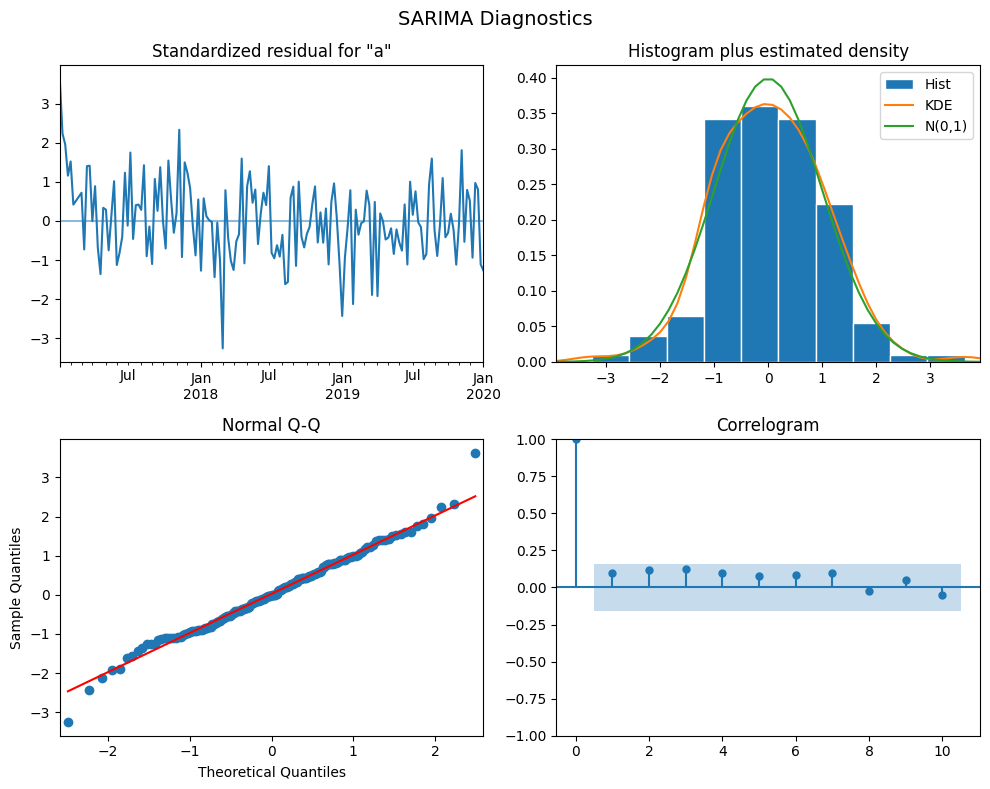

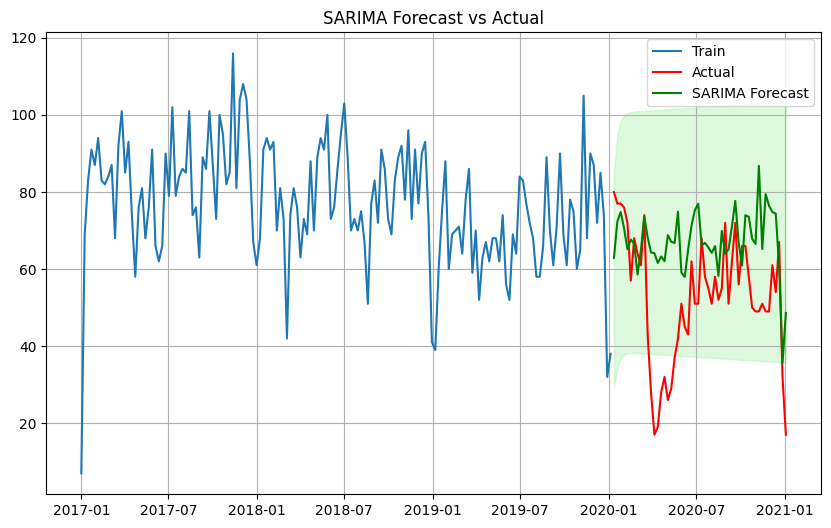

In [141]:
sarima_forecast,sarima_mean,sarima_conf_int = fit_sarima_model(train,best_order,test)

In [142]:
test['sarima_pred'] = sarima_mean

C:\Users\882834\AppData\Local\Temp\ipykernel_18336\971491906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sarima_pred'] = sarima_mean


In [143]:
sarima_mean

2020-01-12    62.890396
2020-01-19    72.314361
2020-01-26    74.817810
2020-02-02    70.596051
2020-02-09    65.159429
2020-02-16    67.682378
2020-02-23    66.559666
2020-03-01    58.593577
2020-03-08    64.881528
2020-03-15    73.636914
2020-03-22    68.202775
2020-03-29    64.293097
2020-04-05    64.123390
2020-04-12    61.582262
2020-04-19    63.265843
2020-04-26    62.017295
2020-05-03    68.812683
2020-05-10    67.065941
2020-05-17    66.759095
2020-05-24    74.907726
2020-05-31    59.083452
2020-06-07    57.943253
2020-06-14    65.050308
2020-06-21    71.225626
2020-06-28    75.262484
2020-07-05    76.955947
2020-07-12    66.178762
2020-07-19    66.796272
2020-07-26    65.628538
2020-08-02    64.204438
2020-08-09    65.937413
2020-08-16    58.217429
2020-08-23    69.893996
2020-08-30    63.942464
2020-09-06    65.111448
2020-09-13    71.069905
2020-09-20    77.689658
2020-09-27    66.760336
2020-10-04    60.894669
2020-10-11    73.992765
2020-10-18    73.541907
2020-10-25    67

In [144]:
def plot_forecast_comparison(train, test, arima_forecast, sarima_forecast, naive_forecast):
    plt.figure(figsize=(12, 6))
    
    # Plot training data
    plt.plot(train.index, train['accident_count'], label='Train', color='blue')
    
    # Plot actual test data
    plt.plot(test.index, test['accident_count'], label='Actual Test', color='black')
    
    # Plot ARIMA forecast
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
    
    # Plot SARIMA forecast
    plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
    
    # Plot Naive forecast
    plt.plot(test.index, naive_forecast, label='Naive Forecast', color='red', linestyle='--')
    
    plt.title('Forecast Comparison for westyorkshire: ARIMA vs SARIMA vs Naive', fontsize=14)
    plt.xlabel('Week')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


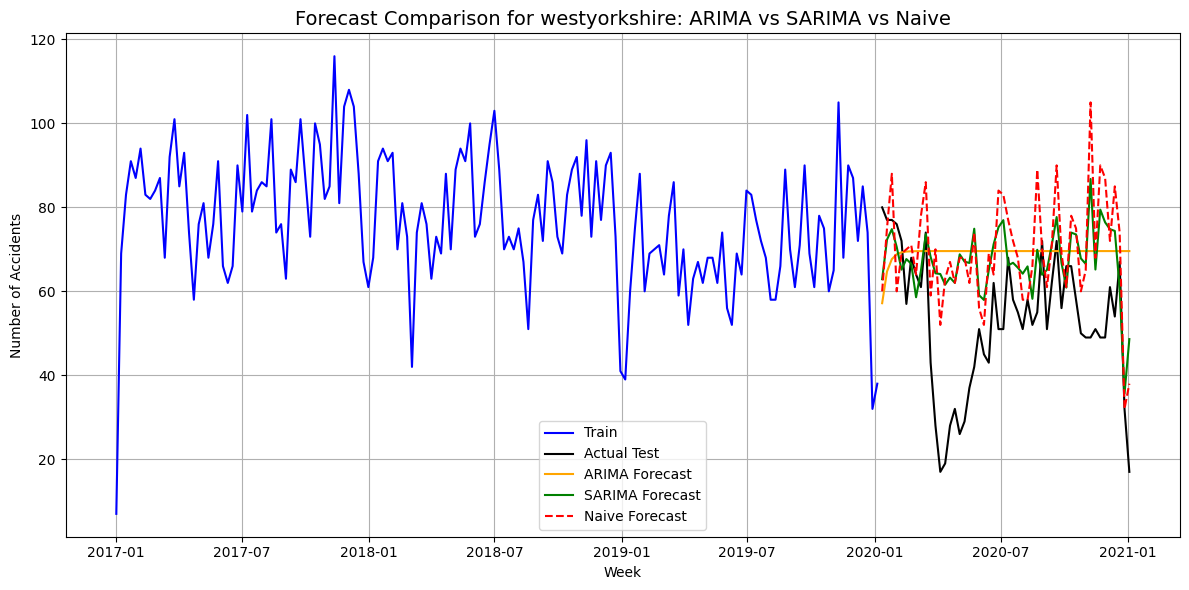

In [145]:
plot_forecast_comparison(
    train, 
    test, 
    test['arima_pred'], 
    sarima_mean, 
    test['naive_pred']
)



ARIMA Model:
RMSE : 23.54
MAE  : 18.98
MAPE : 55.14%
R²   : -1.16

SARIMA Model:
RMSE : 21.08
MAE  : 16.95
MAPE : 47.33%
R²   : -0.73

Naive Model:
RMSE : 23.31
MAE  : 18.67
MAPE : 48.60%
R²   : -1.12


C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

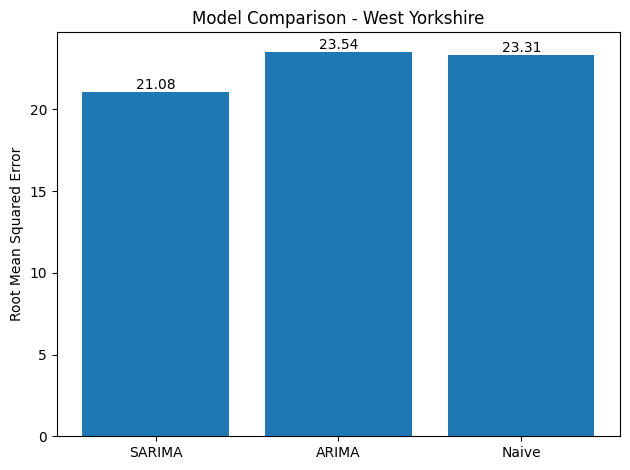

In [146]:

# Compare RMSE
sarima_mse = mean_squared_error(test['accident_count'], test['sarima_pred'], squared=False)
arima_mse = mean_squared_error(test['accident_count'], test['arima_pred'], squared=False)
naive_mse = mean_squared_error(test['accident_count'], test['naive_pred'], squared=False)

calculate_metrics_for_models(test)
# RMSE Plot
list_mse = [sarima_mse, arima_mse, naive_mse]
models = ['SARIMA', 'ARIMA', 'Naive']
plt.bar(models, list_mse)
plt.ylabel('Root Mean Squared Error')
plt.title(f'Model Comparison - West Yorkshire')
for i, val in enumerate(list_mse):
    plt.text(i, val, f"{val:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


### Question 7: Identify the three Local Super Output Areas (LSOAs) of Hull city that recorded the highest number of road accidents in the first three months of 2020, then employ a time series model to forecast daily accident occurrences for the upcoming month (e.g., July), leveraging data from the preceding six months (e.g., January to June) for these high-incident areas.

#### 1. Identify Top 3 LSOAs with Highest Accidents in Q1 2020

In [147]:
# Execute corrected SQL query
query = '''
SELECT accident.lsoa_of_accident_location, COUNT(*) AS accident_count
FROM accident
JOIN lsoa 
    ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE lsoa.lsoa01nm LIKE '%Kingston Upon Hull%'
  AND strftime('%Y-%m-%d', SUBSTR(date, 7, 4) || '-' || SUBSTR(date, 4, 2) || '-' || SUBSTR(date, 1, 2))
      BETWEEN '2020-01-01' AND '2020-03-31'
GROUP BY accident.lsoa_of_accident_location
ORDER BY accident_count DESC
LIMIT 3;
'''

# Run the query
results = cursor.execute(query).fetchall()

# Convert to DataFrame
lsoa_top_df = pd.DataFrame(results, columns=['LSOA', 'accident_count'])

# Display result
display(lsoa_top_df)


LSOA  accident_count
0  E01012817              10
1  E01012889               7
2  E01012848               7

### Step 1: Filter Accident Records: Extract accident data from January 1 to June 30, 2020 for each of the top 3 LSOAs.

In [148]:
# Prepare LSOA codes for filtering
top_lsoas = tuple(lsoa_top_df['LSOA'])

# Query daily accident counts for Jan–Jun 2020 for those LSOAs
query_timeseries = f'''
SELECT 
    accident.lsoa_of_accident_location AS LSOA,
    strftime('%Y-%m-%d', SUBSTR(date, 7, 4) || '-' || SUBSTR(date, 4, 2) || '-' || SUBSTR(date, 1, 2)) AS accident_date,
    COUNT(*) AS daily_accidents
FROM accident
WHERE lsoa_of_accident_location IN {top_lsoas}
  AND strftime('%Y-%m-%d', SUBSTR(date, 7, 4) || '-' || SUBSTR(date, 4, 2) || '-' || SUBSTR(date, 1, 2))
      BETWEEN '2020-01-01' AND '2020-06-30'
GROUP BY LSOA, accident_date
ORDER BY LSOA, accident_date;
'''

# Run query
timeseries_df = pd.read_sql_query(query_timeseries, conn)

# Convert to datetime
timeseries_df['accident_date'] = pd.to_datetime(timeseries_df['accident_date'])

# Display preview
timeseries_df.head()


LSOA accident_date  daily_accidents
0  E01012817    2020-01-02                2
1  E01012817    2020-01-03                1
2  E01012817    2020-01-13                1
3  E01012817    2020-01-17                1
4  E01012817    2020-01-22                1

In [149]:
def naive_forecast(series, steps=31):
    last_value = series.iloc[-1]
    return [last_value] * steps


In [150]:
from pmdarima import auto_arima

def fit_arima(train):
    model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
    return model.predict(n_periods=31)

def fit_sarima(train):
    model = auto_arima(train, seasonal=True, m=7, stepwise=True, suppress_warnings=True)  # Weekly seasonality
    return model.predict(n_periods=31)


In [151]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

def create_lag_features(df, lags=7):
    for lag in range(1, lags+1):
        df[f'lag_{lag}'] = df['daily_accidents'].shift(lag)
    return df.dropna()

def fit_xgboost(train_series):
    df = pd.DataFrame({'daily_accidents': train_series})
    df = create_lag_features(df)
    
    X = df.drop(columns='daily_accidents')
    y = df['daily_accidents']
    
    model = XGBRegressor(n_estimators=100)
    model.fit(X, y)
    
    # Rolling prediction
    last_row = df.iloc[-1][1:].values.tolist()
    preds = []
    for _ in range(31):
        x_input = np.array(last_row[-7:]).reshape(1, -1)
        pred = model.predict(x_input)[0]
        preds.append(pred)
        last_row.append(pred)
    return preds


In [152]:
forecast_results = {}  # Initialize the dictionary

for lsoa in top_lsoas:
    ts = timeseries_df[timeseries_df['LSOA'] == lsoa].set_index('accident_date').asfreq('D').fillna(0)['daily_accidents']
    
    naive_pred = naive_forecast(ts)
    arima_pred = fit_arima(ts)
    sarima_pred = fit_sarima(ts)
    xgb_pred = fit_xgboost(ts)
    
    forecast_results[lsoa] = {
        'naive': naive_pred,
        'arima': arima_pred,
        'sarima': sarima_pred,
        'xgboost': xgb_pred
    }

In [170]:
for lsoa, models in forecast_results.items():
    print(f"\nPredictions for LSOA {lsoa}:")
    for model_name, prediction in models.items():
        print(f"\n{model_name.upper()} forecast:")
        print(prediction)



Predictions for LSOA E01012817:

NAIVE forecast:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

ARIMA forecast:
2020-06-14    0.293246
2020-06-15    0.111278
2020-06-16    0.111278
2020-06-17    0.111278
2020-06-18    0.111278
2020-06-19    0.111278
2020-06-20    0.111278
2020-06-21    0.111278
2020-06-22    0.111278
2020-06-23    0.111278
2020-06-24    0.111278
2020-06-25    0.111278
2020-06-26    0.111278
2020-06-27    0.111278
2020-06-28    0.111278
2020-06-29    0.111278
2020-06-30    0.111278
2020-07-01    0.111278
2020-07-02    0.111278
2020-07-03    0.111278
2020-07-04    0.111278
2020-07-05    0.111278
2020-07-06    0.111278
2020-07-07    0.111278
2020-07-08    0.111278
2020-07-09    0.111278
2020-07-10    0.111278
2020-07-11    0.111278
2020-07-12    0.111278
2020-07-13    0.111278
2020-07-14    0.111278
Freq: D, dtype: float64

SARIMA forecast:
2020-06-14    0.294001

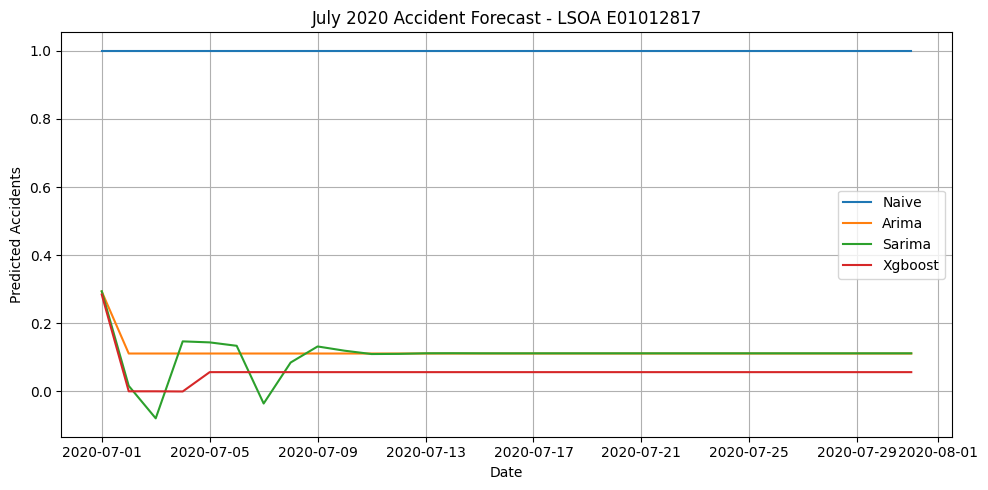

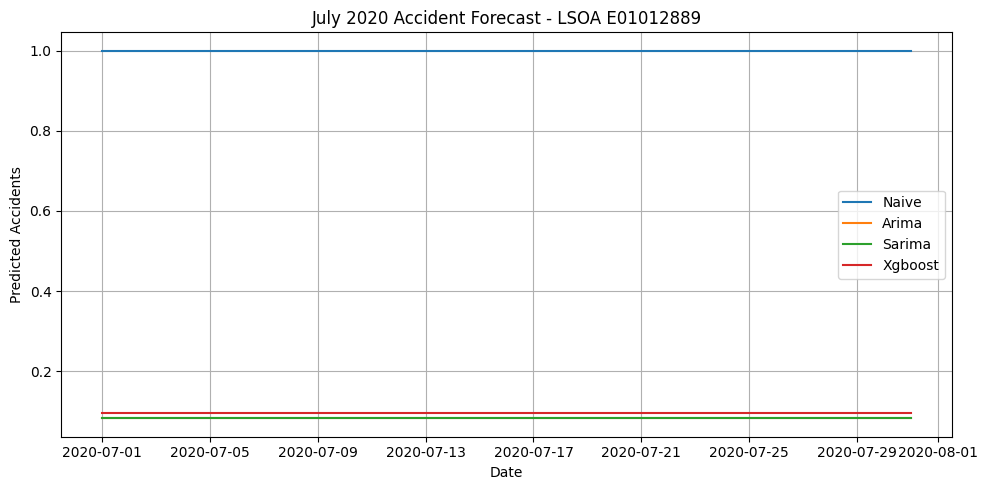

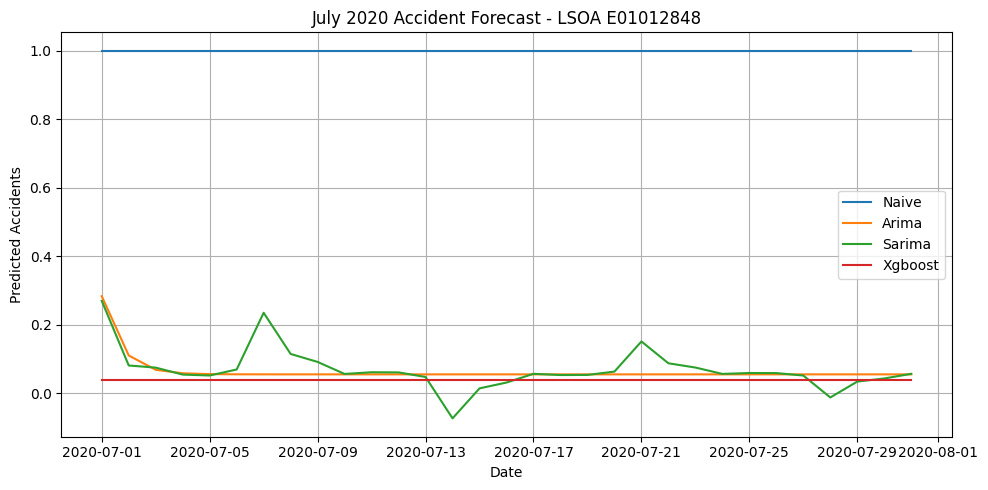

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

dates = pd.date_range(start='2020-07-01', periods=31)

for lsoa, forecasts in forecast_results.items():
    plt.figure(figsize=(10, 5))
    for model_name, pred in forecasts.items():
        plt.plot(dates, pred, label=model_name.capitalize())
    plt.title(f"July 2020 Accident Forecast - LSOA {lsoa}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Accidents")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_forecast(actual, forecast):
    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(actual, forecast)
    
    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    
    # MAPE (Mean Absolute Percentage Error) with thresholding
    threshold = 0.01  # Minimum threshold to avoid division by zero
    actual_adjusted = np.maximum(actual, threshold)  # Adjust values to avoid zero
    mape = np.mean(np.abs((actual - forecast) / actual_adjusted)) * 100
    
    return mae, rmse, mape


In [155]:
# Initialize a dictionary to store the evaluation metrics
evaluation_results = {}

# Iterate over each of the top 3 LSOAs
for lsoa in top_lsoas:
    # Get the actual values for the LSOA (last 31 days of data)
    actual_values = timeseries_df[timeseries_df['LSOA'] == lsoa].set_index('accident_date').asfreq('D').fillna(0)['daily_accidents'][-31:]
    
    # Initialize a dictionary for the evaluation results for this LSOA
    evaluation_results[lsoa] = {}

    # Iterate over each model and calculate metrics
    for model_name, forecast in forecast_results[lsoa].items():
        mae, rmse, mape = evaluate_forecast(actual_values, forecast)
        evaluation_results[lsoa][model_name] = {
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape
        }

# Display the evaluation results for all LSOAs and models
evaluation_results


{'E01012817': {'naive': {'MAE': 0.9354838709677419,
   'RMSE': 0.9672041516493516,
   'MAPE': 9354.838709677419},
  'arima': {'MAE': 0.16730548063946798,
   'RMSE': 0.2547841923562054,
   'MAPE': nan},
  'sarima': {'MAE': 0.1640083972541284,
   'RMSE': 0.25450355888294934,
   'MAPE': nan},
  'xgboost': {'MAE': 0.11574266726787638,
   'RMSE': 0.25021926120932486,
   'MAPE': 554.895438143285}},
 'E01012889': {'naive': {'MAE': 0.9032258064516129,
   'RMSE': 0.9503819266229829,
   'MAPE': 9032.258064516129},
  'arima': {'MAE': 0.16328566667058467,
   'RMSE': 0.29599567237398205,
   'MAPE': nan},
  'sarima': {'MAE': 0.16328566667058467,
   'RMSE': 0.29599567237398205,
   'MAPE': nan},
  'xgboost': {'MAE': 0.17424187568887586,
   'RMSE': 0.2956509076424176,
   'MAPE': 876.3858471426271}},
 'E01012848': {'naive': {'MAE': 0.967741935483871,
   'RMSE': 0.9837387536759294,
   'MAPE': 9677.41935483871},
  'arima': {'MAE': 0.09386911217689853,
   'RMSE': 0.18605232950204678,
   'MAPE': nan},
  'sa

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Create a directory to store the plots
output_dir = "forecast_plots"
os.makedirs(output_dir, exist_ok=True)

# Create date range for July 2020
dates = pd.date_range(start='2020-07-01', periods=31)

# Loop through LSOAs and save plots
for lsoa, forecasts in forecast_results.items():
    plt.figure(figsize=(10, 5))
    
    for model_name, pred in forecasts.items():
        plt.plot(dates, pred, label=model_name.capitalize())
    
    plt.title(f"July 2020 Accident Forecast - LSOA {lsoa}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Accidents")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    
    # Save plot as PNG
    filename = os.path.join(output_dir, f"forecast_{lsoa}.png")
    plt.savefig(filename)
    plt.close()  # Close the figure to avoid displaying it


### Question 8: Construct a social network using the provided data and visualise the network, then provide the basic network characteristics, including numbers of nodes and edges, network density, average degree.

In [157]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the .txt edge list
G = nx.read_edgelist(
    "C:/users/882834/OneDrive - hull.ac.uk/Desktop/road accident/facebook_combined.txt",
    create_using=nx.Graph(),  # Undirected graph
    nodetype=int
)


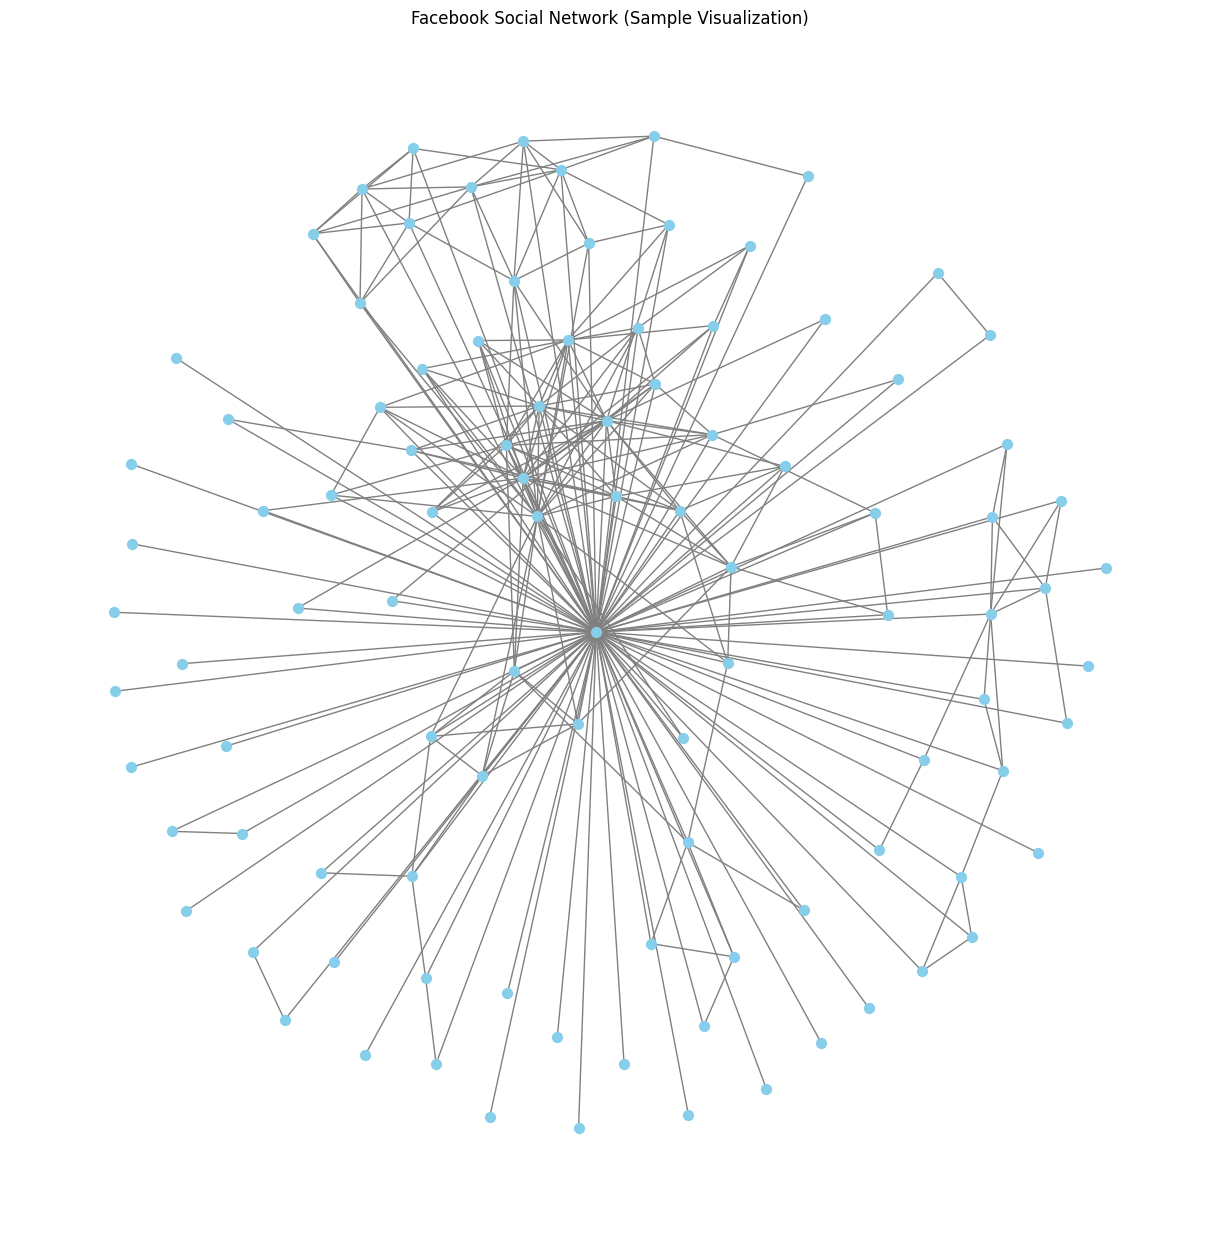

In [158]:

# Sample subgraph with first 100 nodes for visualization
plt.figure(figsize=(12, 12))
subgraph = G.subgraph(list(G.nodes)[:100])
nx.draw(subgraph, node_size=50, node_color="skyblue", edge_color="gray")
plt.title("Facebook Social Network (Sample Visualization)")
plt.show()


In [159]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Network density
density = nx.density(G)

# Average degree
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / num_nodes


In [160]:
print("📌 Basic Network Statistics:")
print(f"🧑 Number of Nodes: {num_nodes}")
print(f"🔗 Number of Edges: {num_edges}")
print(f"📏 Network Density: {density:.6f}")
print(f"📈 Average Degree: {avg_degree:.2f}")


📌 Basic Network Statistics:
🧑 Number of Nodes: 4039
🔗 Number of Edges: 88234
📏 Network Density: 0.010820
📈 Average Degree: 43.69


### Question 9: Calculate the edge centrality of this network and plot the distribution of the edge centrality values.

#### Step 1: Calculate Edge Betweenness Centrality

In [161]:
import networkx as nx

# Compute edge betweenness centrality (returns a dictionary with edge tuples as keys)
edge_centrality = nx.edge_betweenness_centrality(G)


#### Step 2: Plot the Distribution of Centrality Values

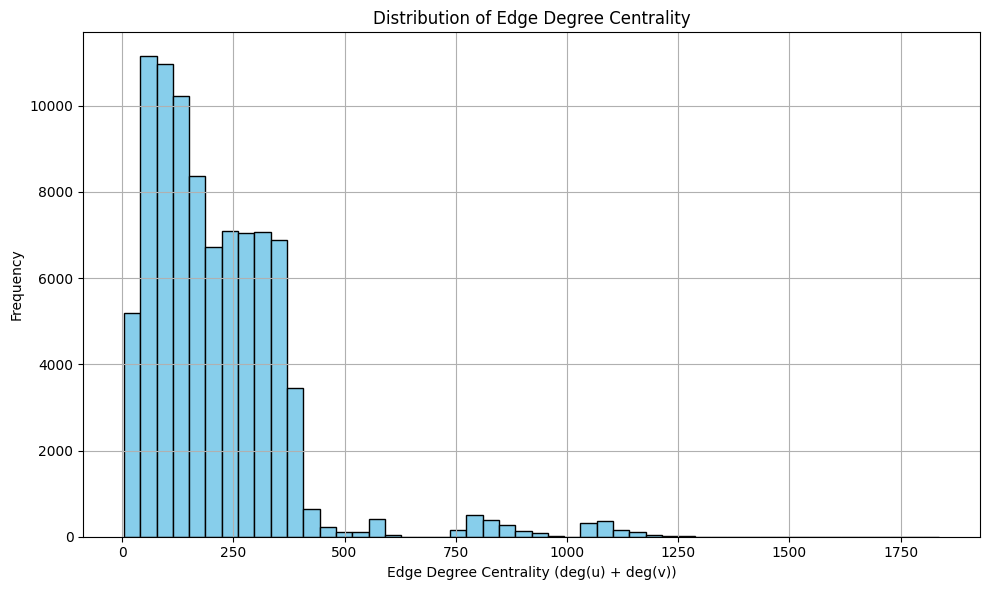

In [162]:
# Edge Degree Centrality: sum of degrees of both endpoints
edge_degree_centrality = {
    edge: G.degree(edge[0]) + G.degree(edge[1])
    for edge in G.edges()
}

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(list(edge_degree_centrality.values()), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Edge Degree Centrality')
plt.xlabel('Edge Degree Centrality (deg(u) + deg(v))')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


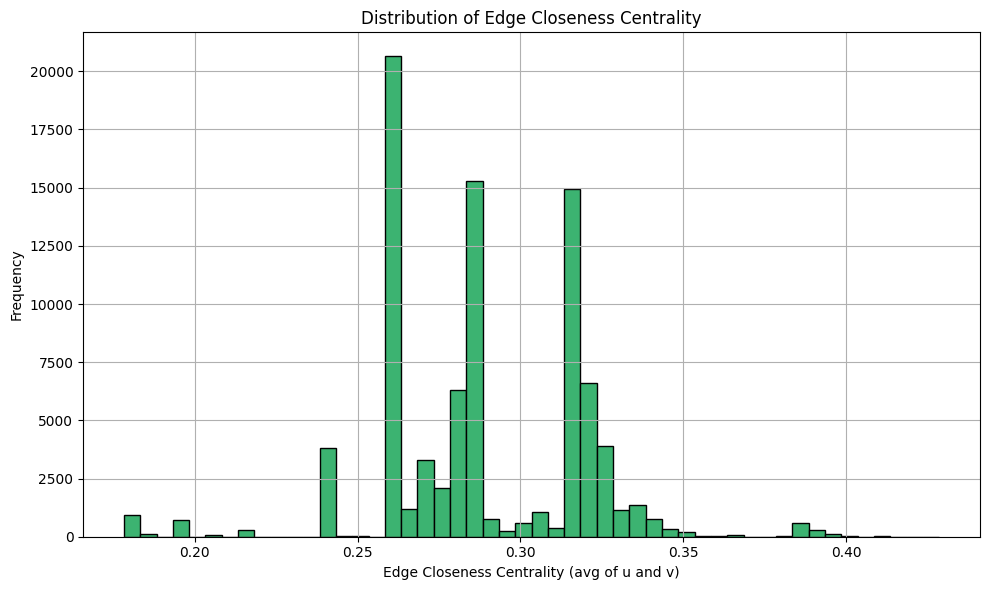

In [163]:
# Compute node closeness centrality first
node_closeness = nx.closeness_centrality(G)

# Edge closeness centrality: average of closeness of the two nodes
edge_closeness_centrality = {
    edge: (node_closeness[edge[0]] + node_closeness[edge[1]]) / 2
    for edge in G.edges()
}

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(list(edge_closeness_centrality.values()), bins=50, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Edge Closeness Centrality')
plt.xlabel('Edge Closeness Centrality (avg of u and v)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


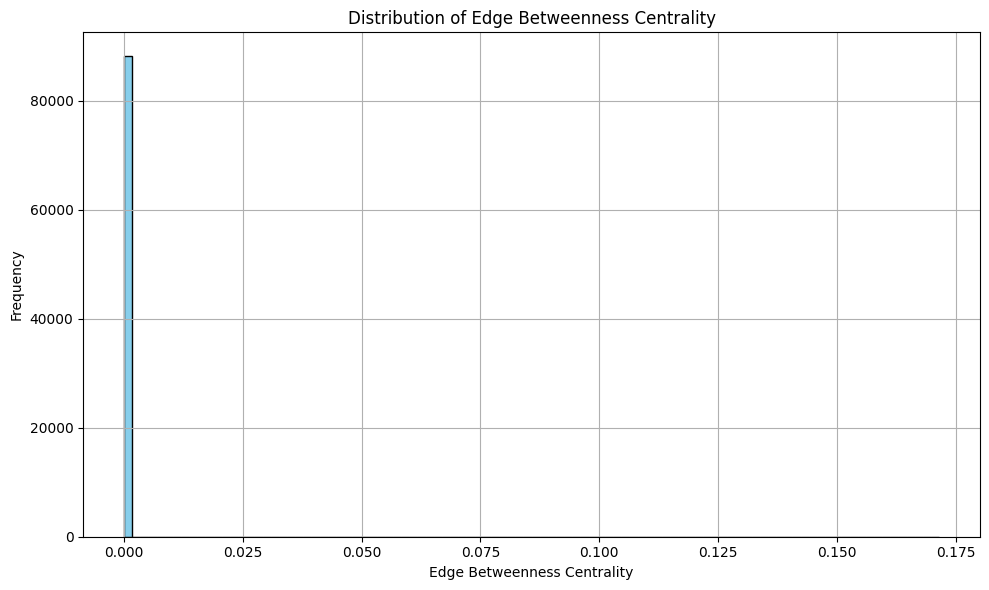

In [164]:
import matplotlib.pyplot as plt

# Extract centrality values
centrality_values = list(edge_centrality.values())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(centrality_values, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Edge Betweenness Centrality")
plt.xlabel("Edge Betweenness Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


#### QUESTION 10: Use two community detection algorithms to detect the clusters/community within this social network, then compare the difference of results (the number of clusters and numbers of nodes in each cluster).

In [165]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities, asyn_lpa_communities

# Load the graph
G = nx.read_edgelist("facebook_combined.txt", nodetype=int, create_using=nx.Graph())


In [166]:
greedy_communities = list(greedy_modularity_communities(G))
print(f"Greedy Modularity: {len(greedy_communities)} communities detected.")

# Size of each community
greedy_sizes = [len(c) for c in greedy_communities]
print("Sizes of each community (Greedy Modularity):")
print(greedy_sizes)


Greedy Modularity: 13 communities detected.
Sizes of each community (Greedy Modularity):
[983, 815, 548, 543, 372, 219, 208, 206, 59, 37, 25, 18, 6]


In [167]:
lpa_communities = list(asyn_lpa_communities(G))
print(f"\nLabel Propagation: {len(lpa_communities)} communities detected.")

# Size of each community
lpa_sizes = [len(c) for c in lpa_communities]
print("Sizes of each community (Label Propagation):")
print(lpa_sizes)



Label Propagation: 73 communities detected.
Sizes of each community (Label Propagation):
[221, 36, 10, 7, 8, 21, 2, 241, 16, 13, 3, 7, 3, 458, 290, 10, 508, 142, 127, 49, 95, 72, 44, 38, 2, 9, 5, 10, 6, 155, 73, 237, 9, 25, 2, 52, 8, 161, 15, 10, 3, 9, 8, 26, 226, 19, 4, 3, 8, 6, 6, 2, 100, 19, 10, 6, 14, 3, 12, 29, 54, 19, 66, 106, 20, 19, 14, 4, 6, 8, 2, 6, 2]


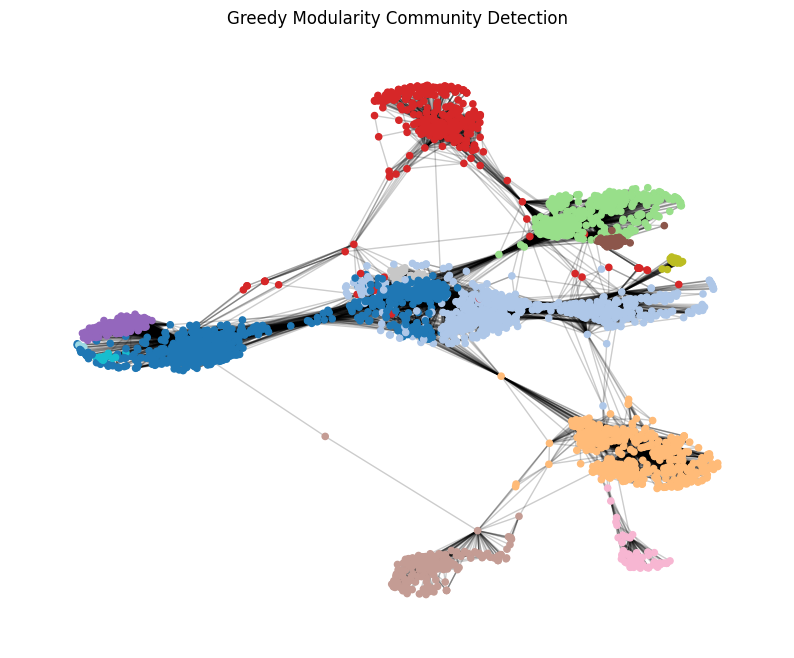

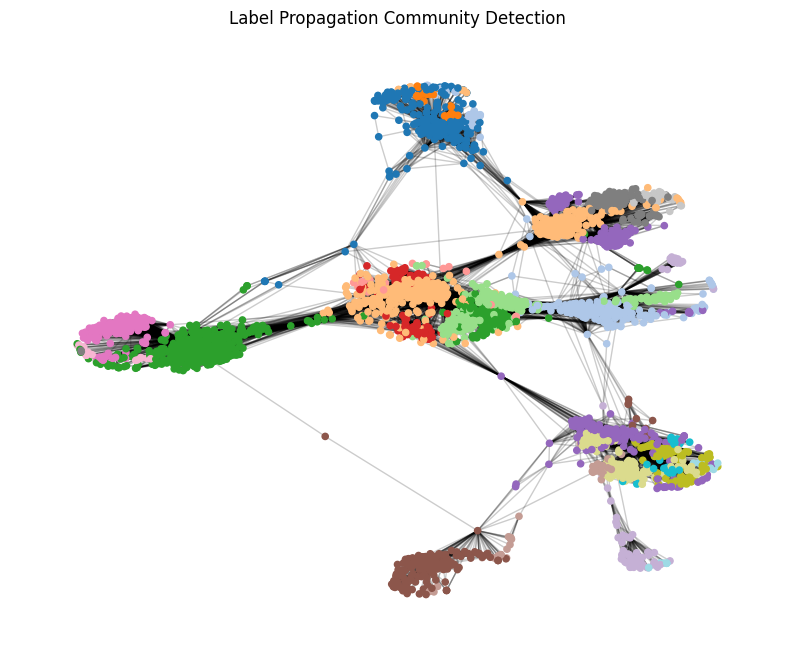

In [168]:
import matplotlib.pyplot as plt
import random

# Function to assign a color to each community
def draw_communities(G, communities, title):
    # Create a color map
    color_map = {}
    for i, community in enumerate(communities):
        for node in community:
            color_map[node] = i  # Assign each node to its community index

    # Generate colors
    colors = [color_map[node] for node in G.nodes()]

    # Use spring layout for visualization
    pos = nx.spring_layout(G, seed=42)  # For consistent layout

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color=colors, cmap=plt.cm.tab20)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Visualize communities
draw_communities(G, greedy_communities, "Greedy Modularity Community Detection")
draw_communities(G, lpa_communities, "Label Propagation Community Detection")
